<a href="https://colab.research.google.com/github/StevenMena/07MIAR_RedesNeu_DeepLearning/blob/main/Copy_of_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<center><b>07MIAR29 - Redes Neuronales y Deep Learning</b></center>

<center>Proyecto de programación "Deep Vision in classification tasks"</center>

<center>Integrantes:<center>

 - Anthony Playmith Sanchez
 - Steven Mena Chavez
 - David Pozo Spin

 <center>

# <b>Estrategia 1:</b> Entrenar desde cero o <i>from scratch</i>
##1.   Cargar del dataset



In [ ]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77733 sha256=b68b54dcac114a84ce3fea2514bec0a3ed90b7f264bdddd53eae7ff8f0dec2da
  Stored in directory: /root/.cache/pip/wheels/f3/16/ff/34e7d368370d4fd68bb749a59f1d2639ed66f3c14358e340a1
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json) from google.colab import files
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"davidfpozoe","key":"9db3a5b140690ec43f98638a4c820488"}'}

In [ ]:
!cp kaggle.json /content/gdrive/MyDrive/descargas_kaggle/

In [ ]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/gdrive/MyDrive/descargas_kaggle"

In [ ]:
# procedimiento 
# https://www.youtube.com/watch?v=-VlW7cWJ-58
import os
os.environ['KAGGLE_CONFIG_DIR']=BASE_FOLDER

In [ ]:
%cd /content/gdrive/MyDrive/descargas_kaggle

/content/gdrive/MyDrive/descargas_kaggle


In [ ]:
!ls

 100-bird-species.zip  'EfficientNetB0-525-(224 X 224)- 98.97.h5'   test
 birds.csv	        kaggle.json				    train


In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species 

100% 1.95G/1.96G [01:29<00:00, 25.3MB/s]
100% 1.96G/1.96G [01:30<00:00, 23.3MB/s]


In [ ]:
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train

##2.   Inspección del conjunto de datos


Found 84791 images belonging to 525 classes.
Exiten: 525 clases
Exiten: 84791 elementos de entrenamiento


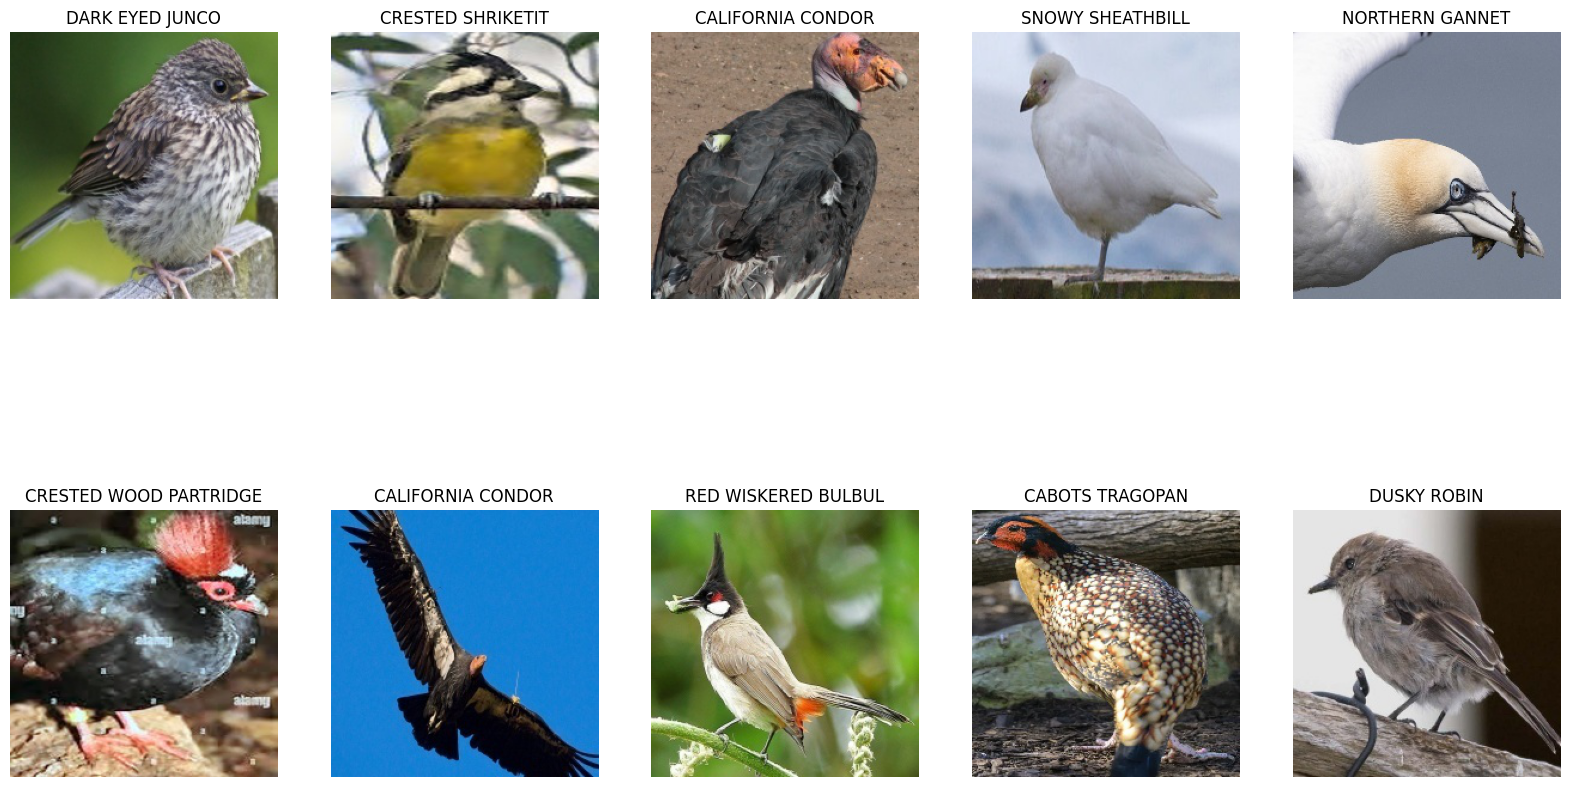

In [ ]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#se usará el imageData generator para posteriormente poder acceder a las imagenes de manera sencilla mediante directorios "flow_from_directory"
#debido a que es solo para inspección y no para hacer data augmentation, no se modifica ningún parámetro
#se leen los archivos de imagen desde la carpeta train que nos ha facilitado la base de datos descargada y se obtienen las rutas y los labels (0-524) de las imágenes
data_generator = ImageDataGenerator( )  
train_images = data_generator.flow_from_directory(BASE_FOLDER+'/train') 
train_files = train_images.filepaths
train_labels = train_images.classes

class_name = list(train_images.class_indices.keys()) # se obtiene los nombres de cada una de las clases
print("Exiten: {0} clases".format(len(class_name)))  # corroboramos la cantidad de clases 525 

length_images = len(train_labels)
print("Exiten: {0} elementos de entrenamiento".format(length_images))  # corroboramos la cantidad de fotos de entrenamiento
sample_size = min(length_images, 10) #se escoge mostrar un número menor o igual a 10 imágenes
sample_images = random.sample(range(length_images), sample_size)

for i in range(sample_size):
    plt.rcParams['figure.figsize'] = (20, 30)
    img = plt.imread(train_files[sample_images[i]])
    plt.subplot(5, 5, i+1)
    plt.title(class_name[train_labels[sample_images[i]]]) # se obtiene el nombre de la clase asociada a cada label aleatorio escogido
    plt.imshow(img)
    plt.axis('off')
plt.show()

##3.   Acondicionamiento del conjunto de datos

- Realizaremos un escalamiento  de las imágenes (0-1) 
- Se realiza un redimensionamiento de las imágenes a 150x150x3
- Debido a que le dataset ya nos entrega agrupemientos de datos de train, test y valid no es necesario realizar un proceso de HoldOut (partición interna de entrenamiento y validación)
- Se utilizarán lotes de 1024 imágenes para el poder realizar el entrenamiento de la red neuronal. 
- Se utilizarán lotes de 64 imágenes para validación
- Los lotes se escogieron debido a la cantidad de datos correspondiente
- Para todo esto usaremos un Generator de Imágenes 
- En primera instancia no usaemos (Data Augmentation) para ver como se comporta la red que entrenaremos, en caso de existir overfitting se realizar'a una nueva prueba con data augmentation.

In [ ]:
IMG_WIDTH = 150 # 720 original
IMG_HEIGHT = 150 # 1280 original
BATCH_SIZE_TRAIN = 1024 
BATCH_SIZE_VALID=64
DIRECTORY_TRAIN = BASE_FOLDER+'/train/'
DIRECTORY_VALID = BASE_FOLDER+'/valid/'
DIRECTORY_TEST = BASE_FOLDER+'/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(directory=DIRECTORY_TRAIN,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE_TRAIN,
                                                    class_mode='categorical')
                                                    #subset='training')
validation_generator = datagen.flow_from_directory(directory=DIRECTORY_VALID,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE_VALID,
                                                    class_mode='categorical')
                                                    #subset='validation')
test_generator = datagen.flow_from_directory(directory=DIRECTORY_TEST,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=1,
                                                    class_mode='categorical')


Found 84791 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [ ]:
# se revisa que contiene cada batch del train generator, en este caso el último batch generado
for data_batch, labels_batch in train_generator:
  print('data batch shape:',data_batch.shape)
  print('labels batch shape:',labels_batch.shape)
  break

KeyboardInterrupt: ignored

## 4. Desarrollo de la arquitectura de red neuronal y entrenamiento de la red

Se ha utilizado una herramienta que permite ver de manera gráfica la arquitectura propuesta: 
https://alexlenail.me/NN-SVG/LeNet.html?fbclid=IwAR3N2UExDPu9GKYsCv_t-oYAP0NFxXz3Cwxi0e6__UtBuWPbS27Ebypg4sM

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32960,activation='relu'))
model.add(layers.Dense(525,activation='softmax'))

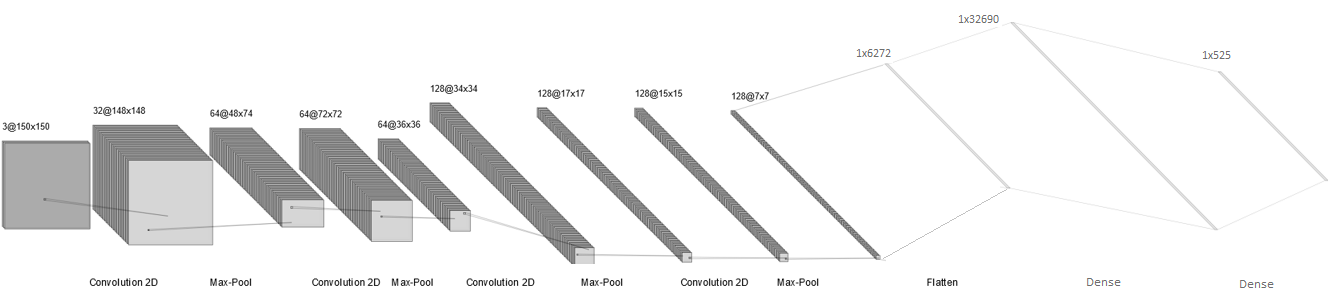

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
# https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_directory/
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size, 
    epochs = 40,
    validation_data = validation_generator, 
    validation_steps = validation_generator.n//validation_generator.batch_size
)

Epoch 1/40
 1/82 [..............................] - ETA: 8:10:35 - loss: 6.2653 - acc: 0.0049

In [ ]:
model.save(BASE_FOLDER +'/Birds_Monitoring_1.h5')

##5.   Monitorización del proceso de entrenamiento para la toma de decisiones

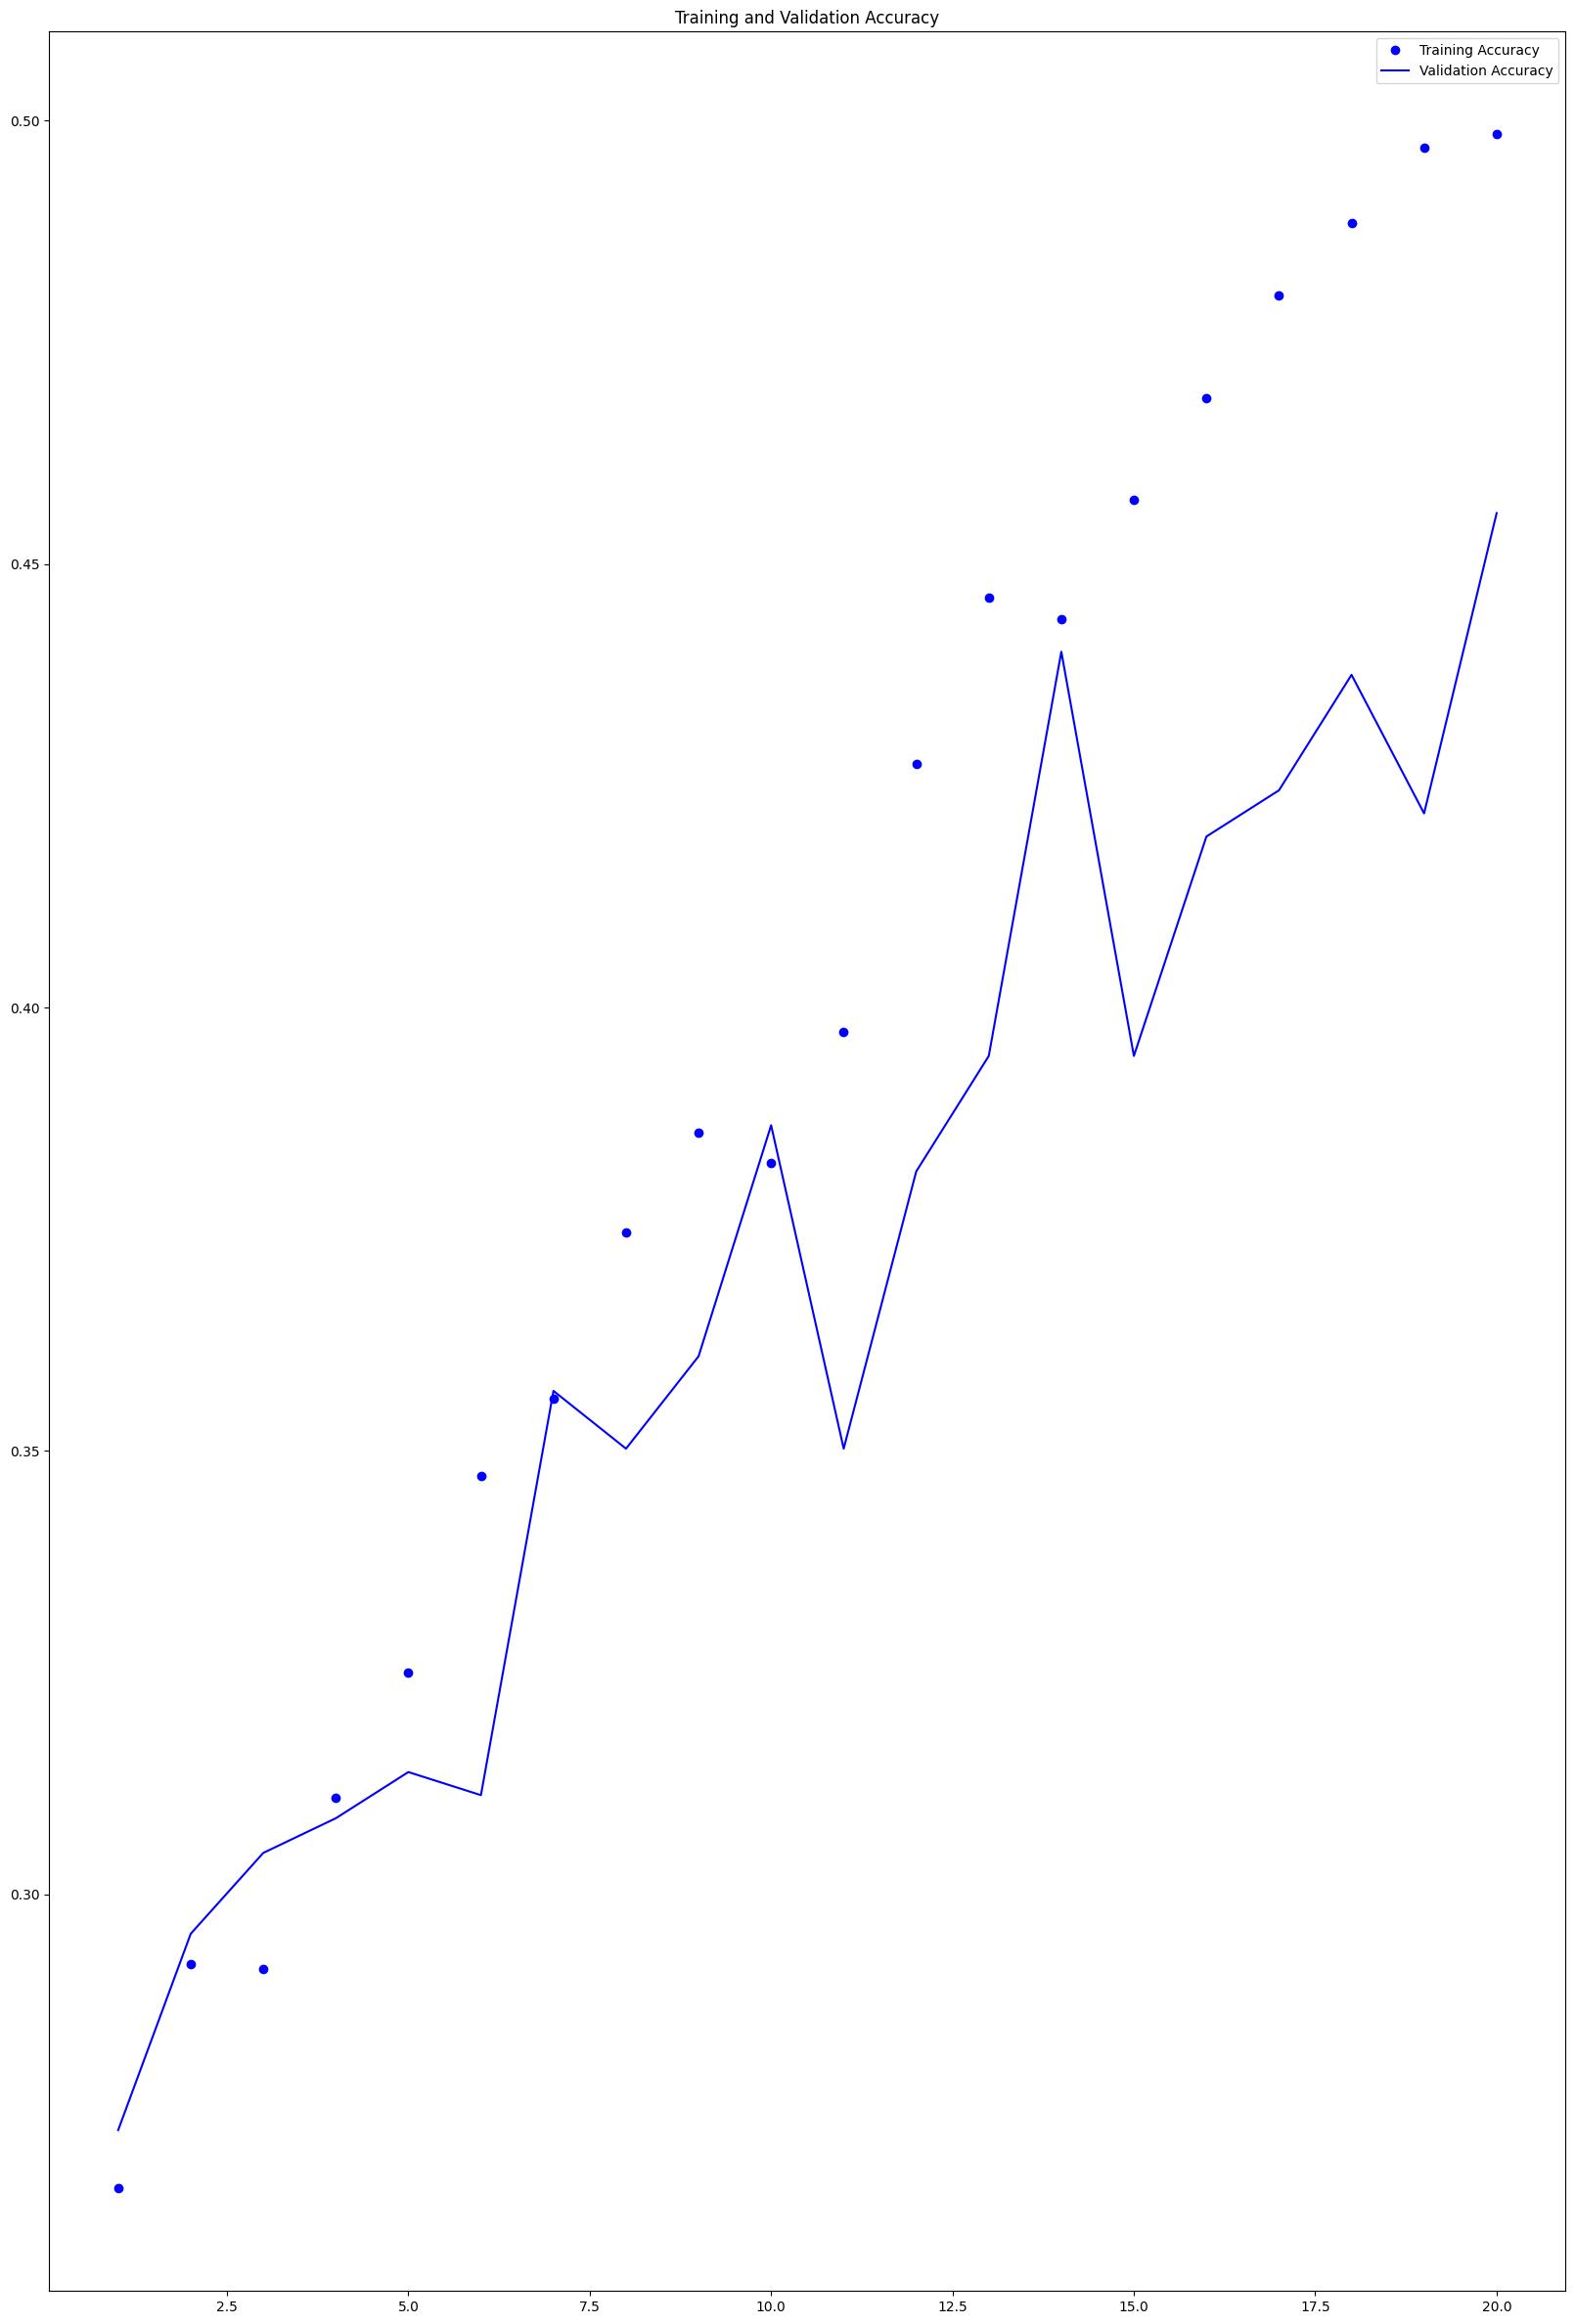

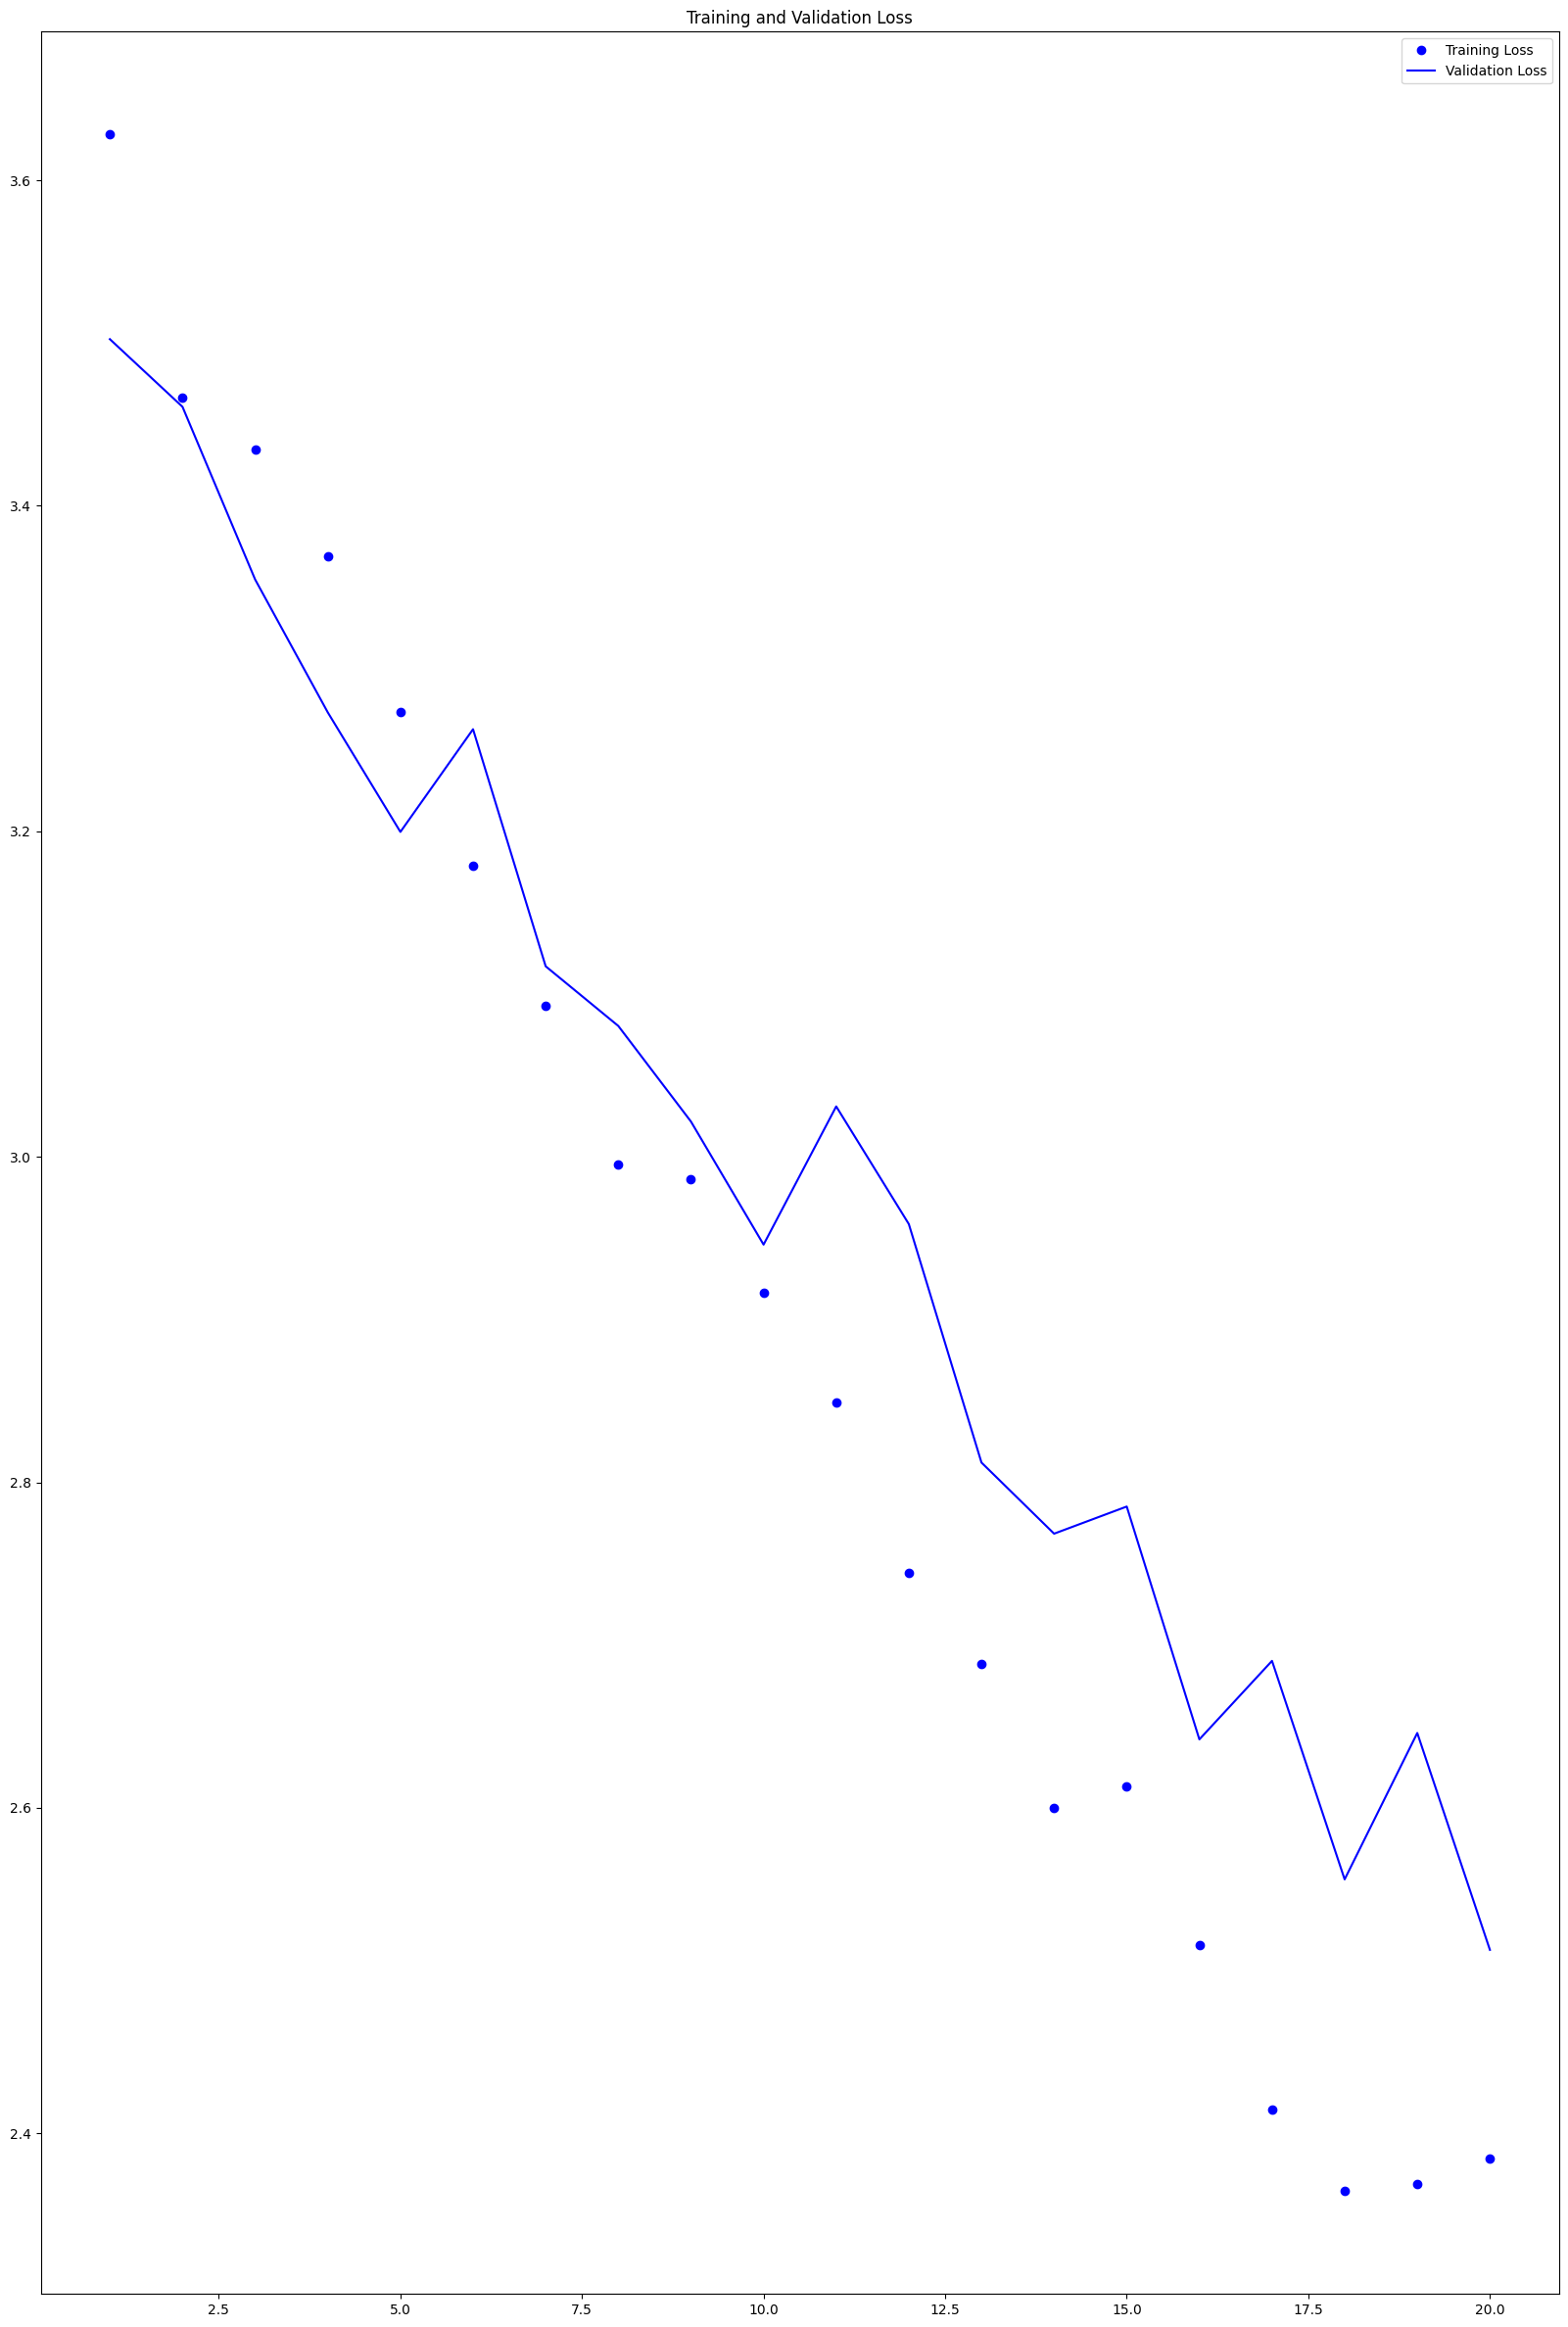

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

##6.   Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental

Como se puede ver en los graficos, el modelo esta un poco sobreajustado.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import os


['ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'ASIAN GREEN BEE EATER',
 'ASIAN OPENBILL STORK',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE BREASTED PITTA',
 'A

In [ ]:
score=model.evaluate(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 8s 339ms/step - loss: 2.5674 - acc: 0.4472
Test loss: 2.5674374103546143
Test accuracy: 0.44723808765411377


In [ ]:
pred = model.predict_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
print(np.argmax(pred, axis=1))
print(test_labels)
print(dir(test_generator))
print(test_generator.classes)
print(classification_report(test_labels, pred.argmax(axis=1),target_names=class_name))

<ipython-input-55-0015d71285ea>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)


21/21 [==============================] - 6s 262ms/step
[295 321 419 ... 178 267 432]
[  0   0   0 ... 524 524 524]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_filepaths', '_flow_index', '_get_batches_of_transformed_samples', '_keras_api_names', '_keras_api_names_v1', '_set_index_array', 'allowed_class_modes', 'batch_index', 'batch_size', 'class_indices', 'class_mode', 'classes', 'color_mode', 'data_format', 'directory', 'dtype', 'filenames', 'filepaths', 'image_data_generator', 'image_shape', 'index_array', 'index_generator', 'interpolation', 'keep_aspect_ratio', 'labels', 'lock', 'n', 'next', 'num_classes', 'on_epoch_end', 'reset', 'sampl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 113ms/step


<ipython-input-38-f3b19a5be39f>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(k)


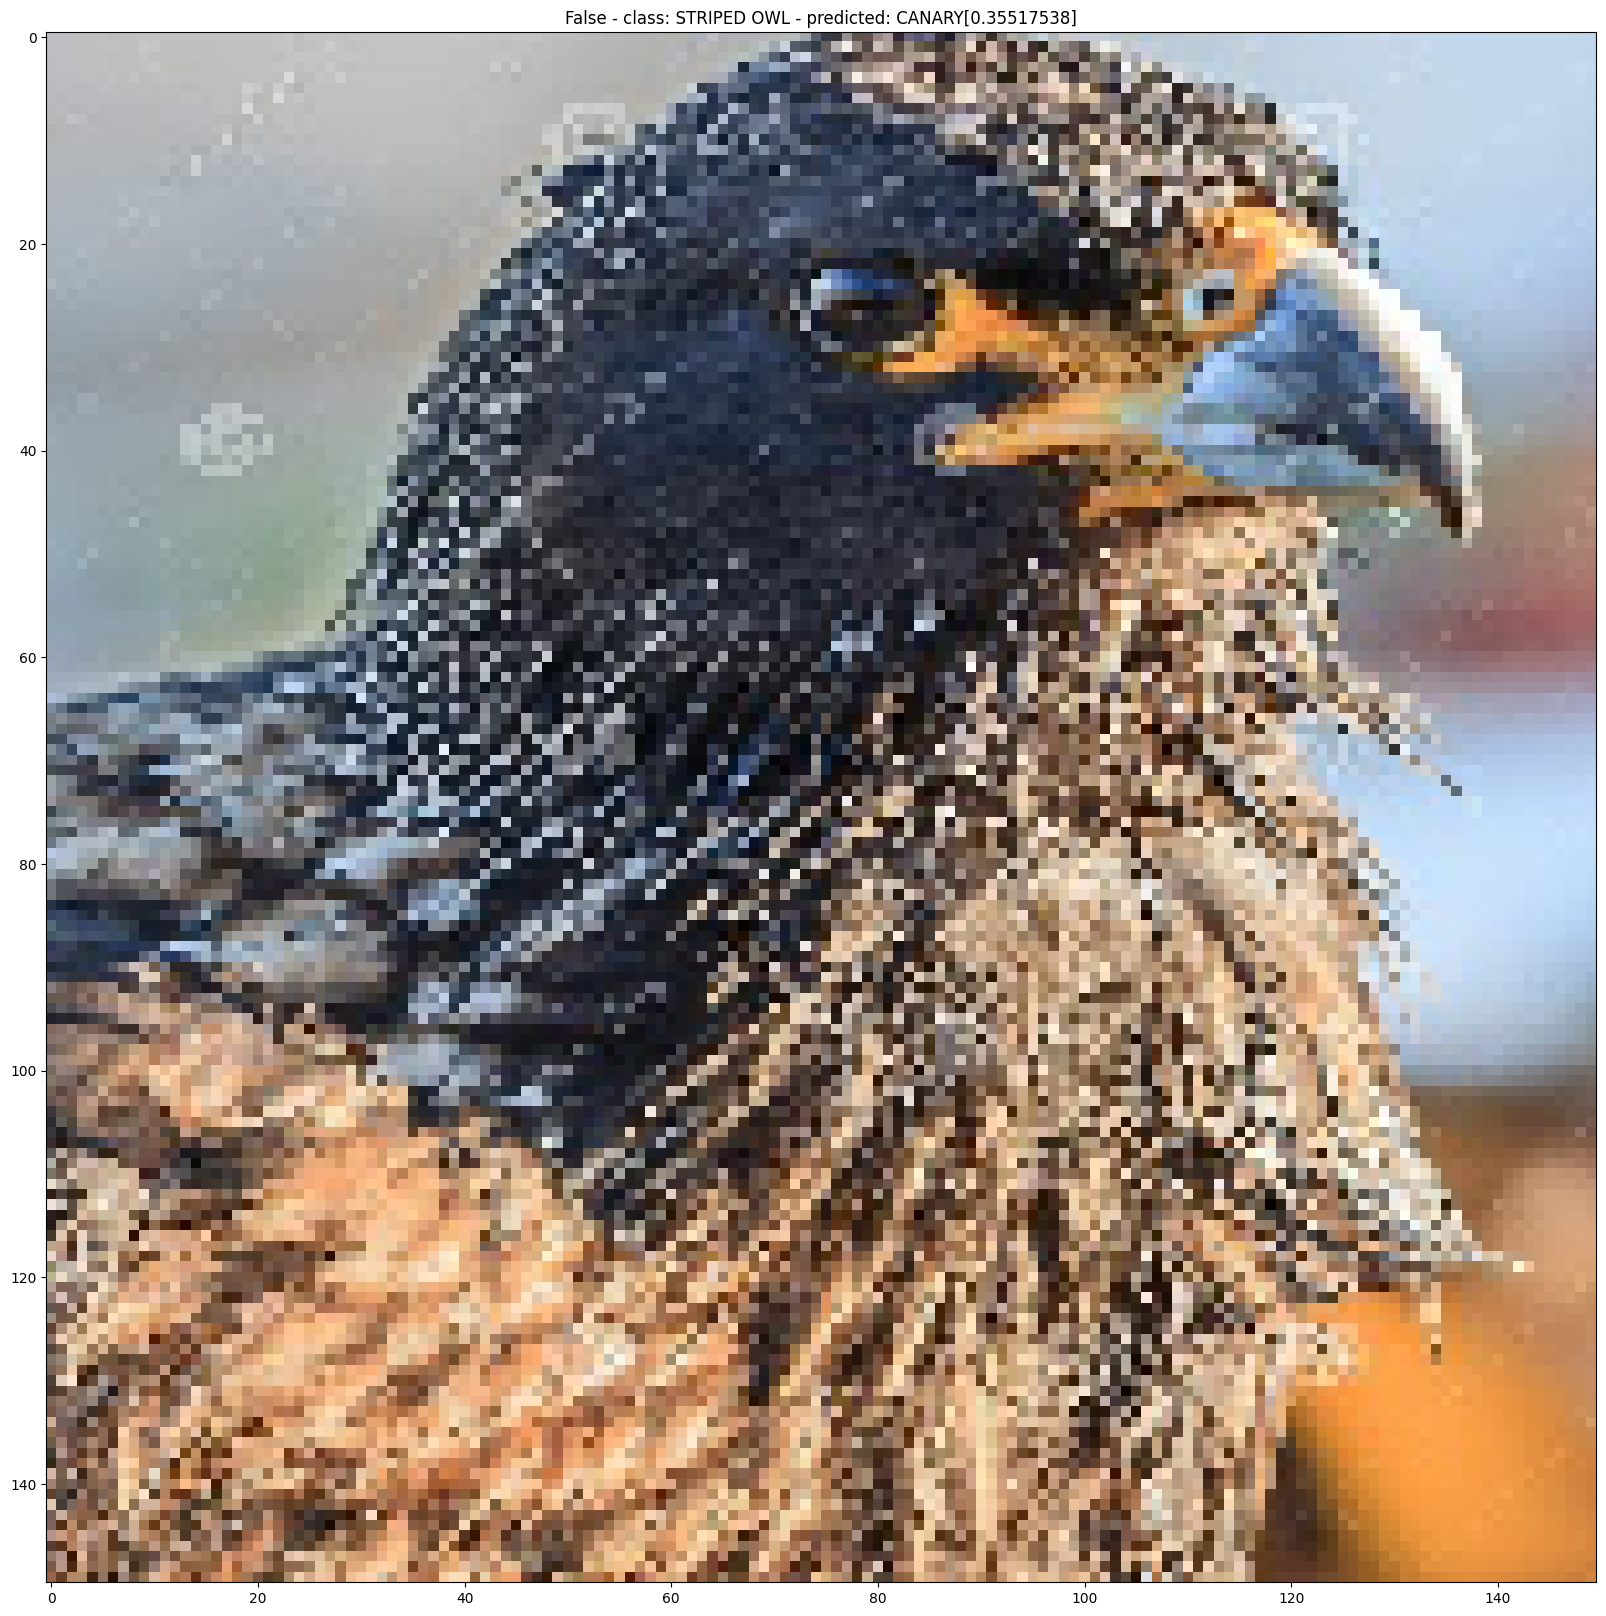

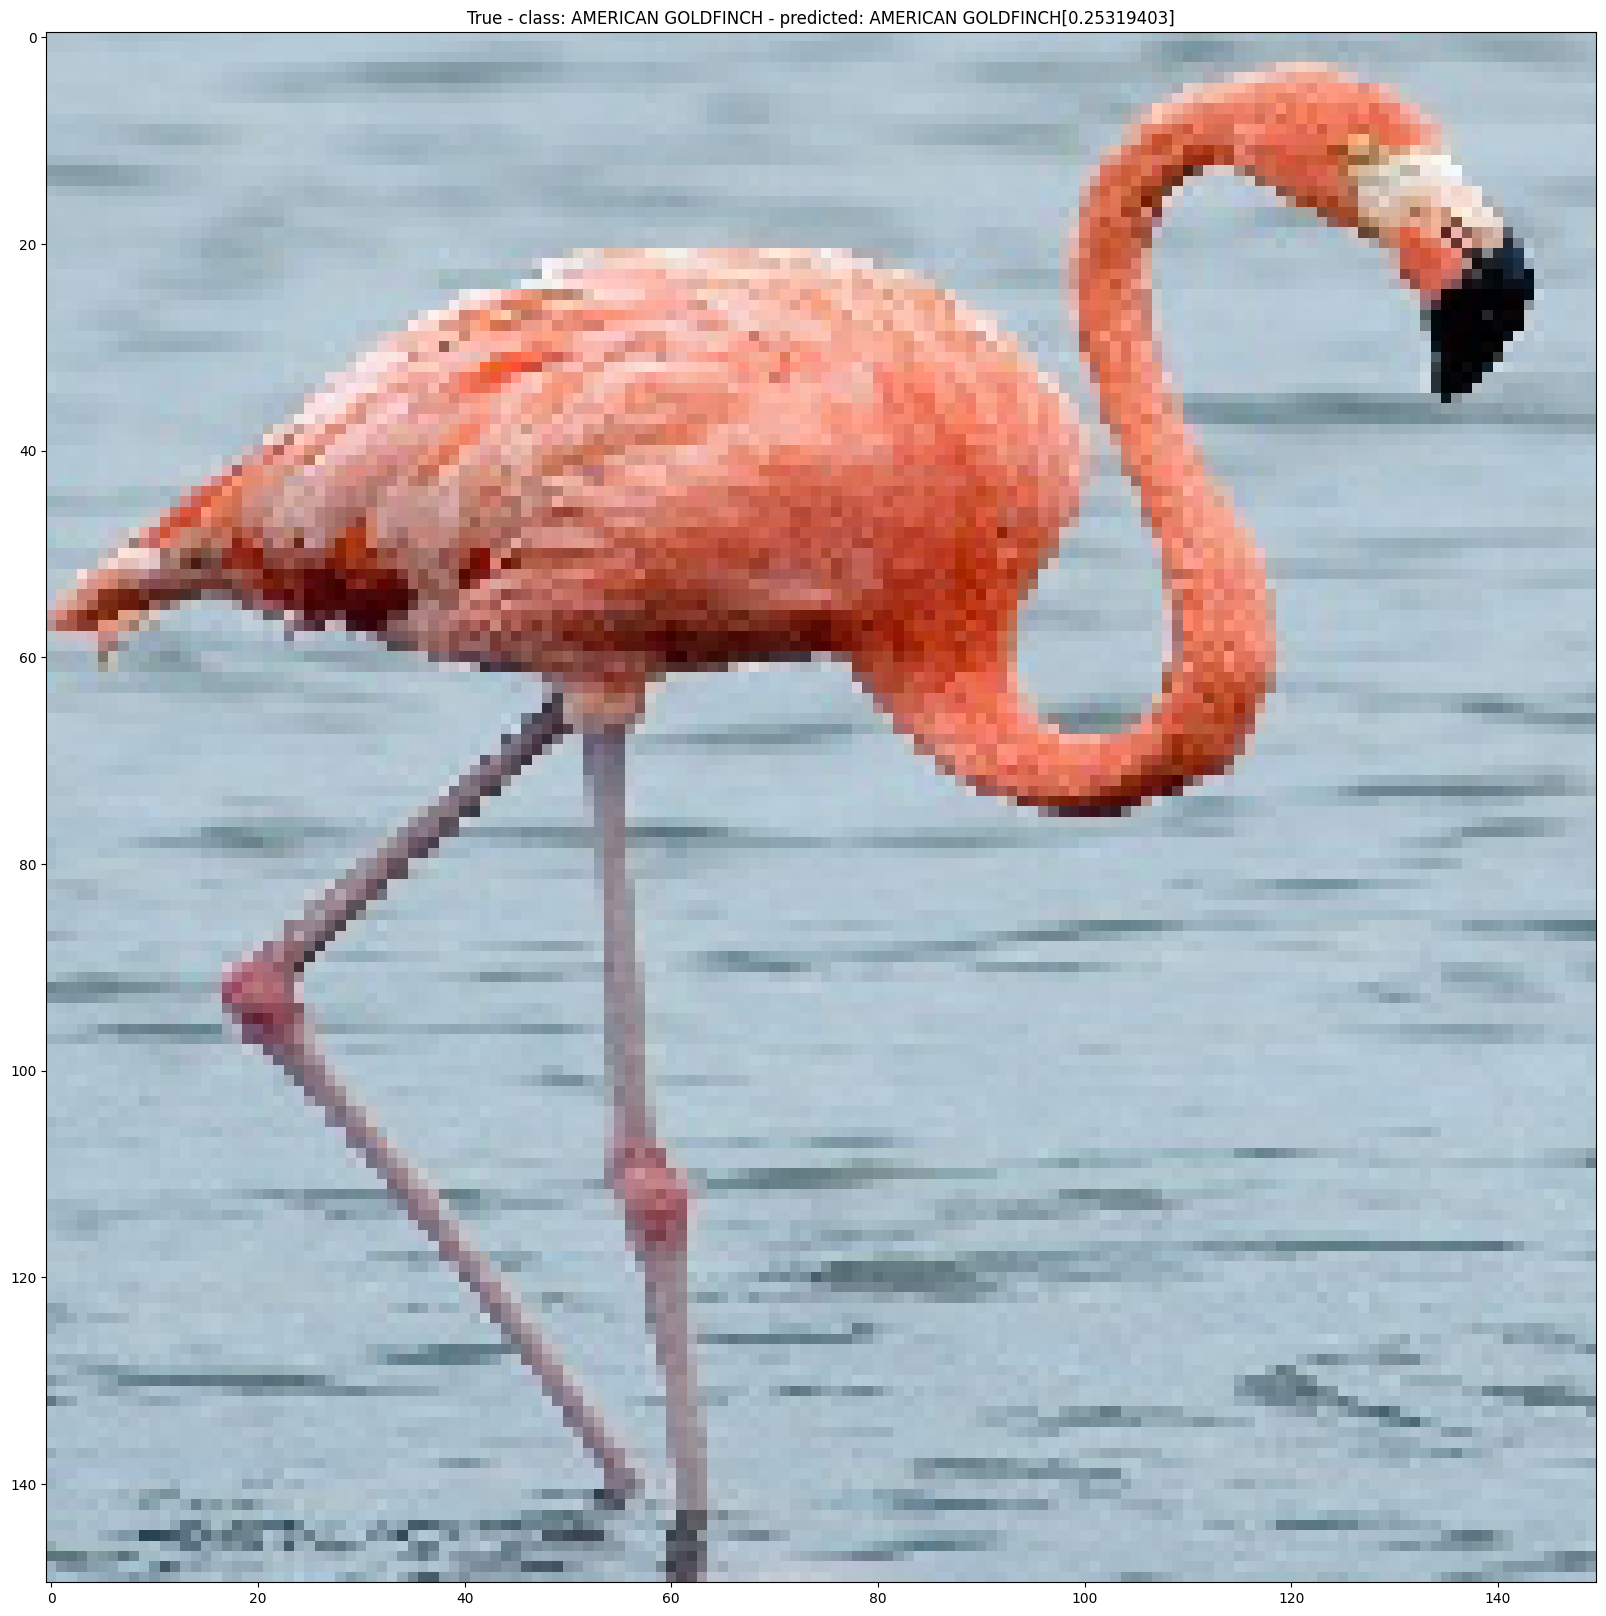

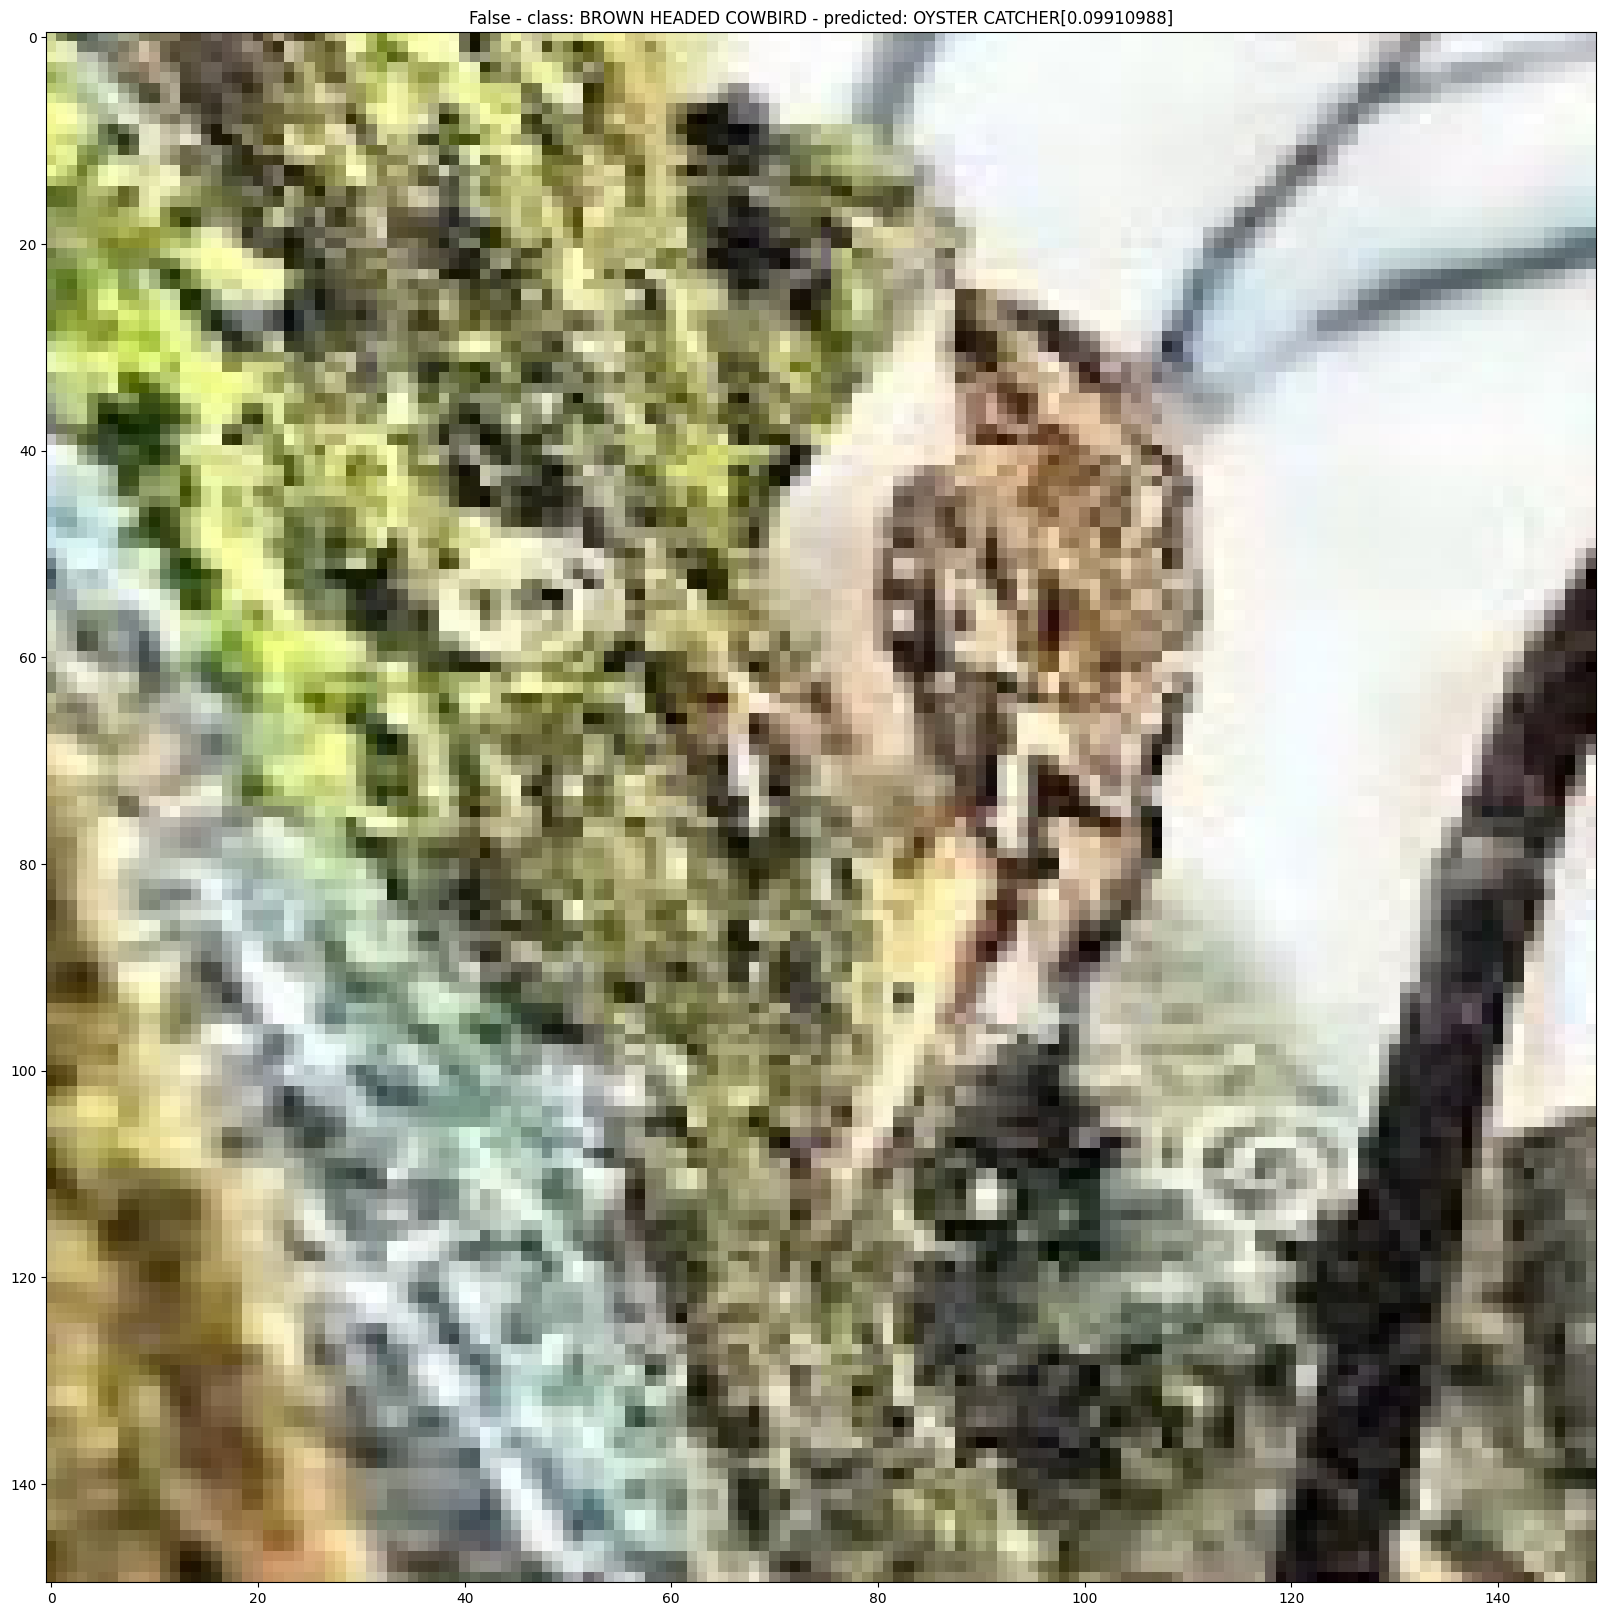

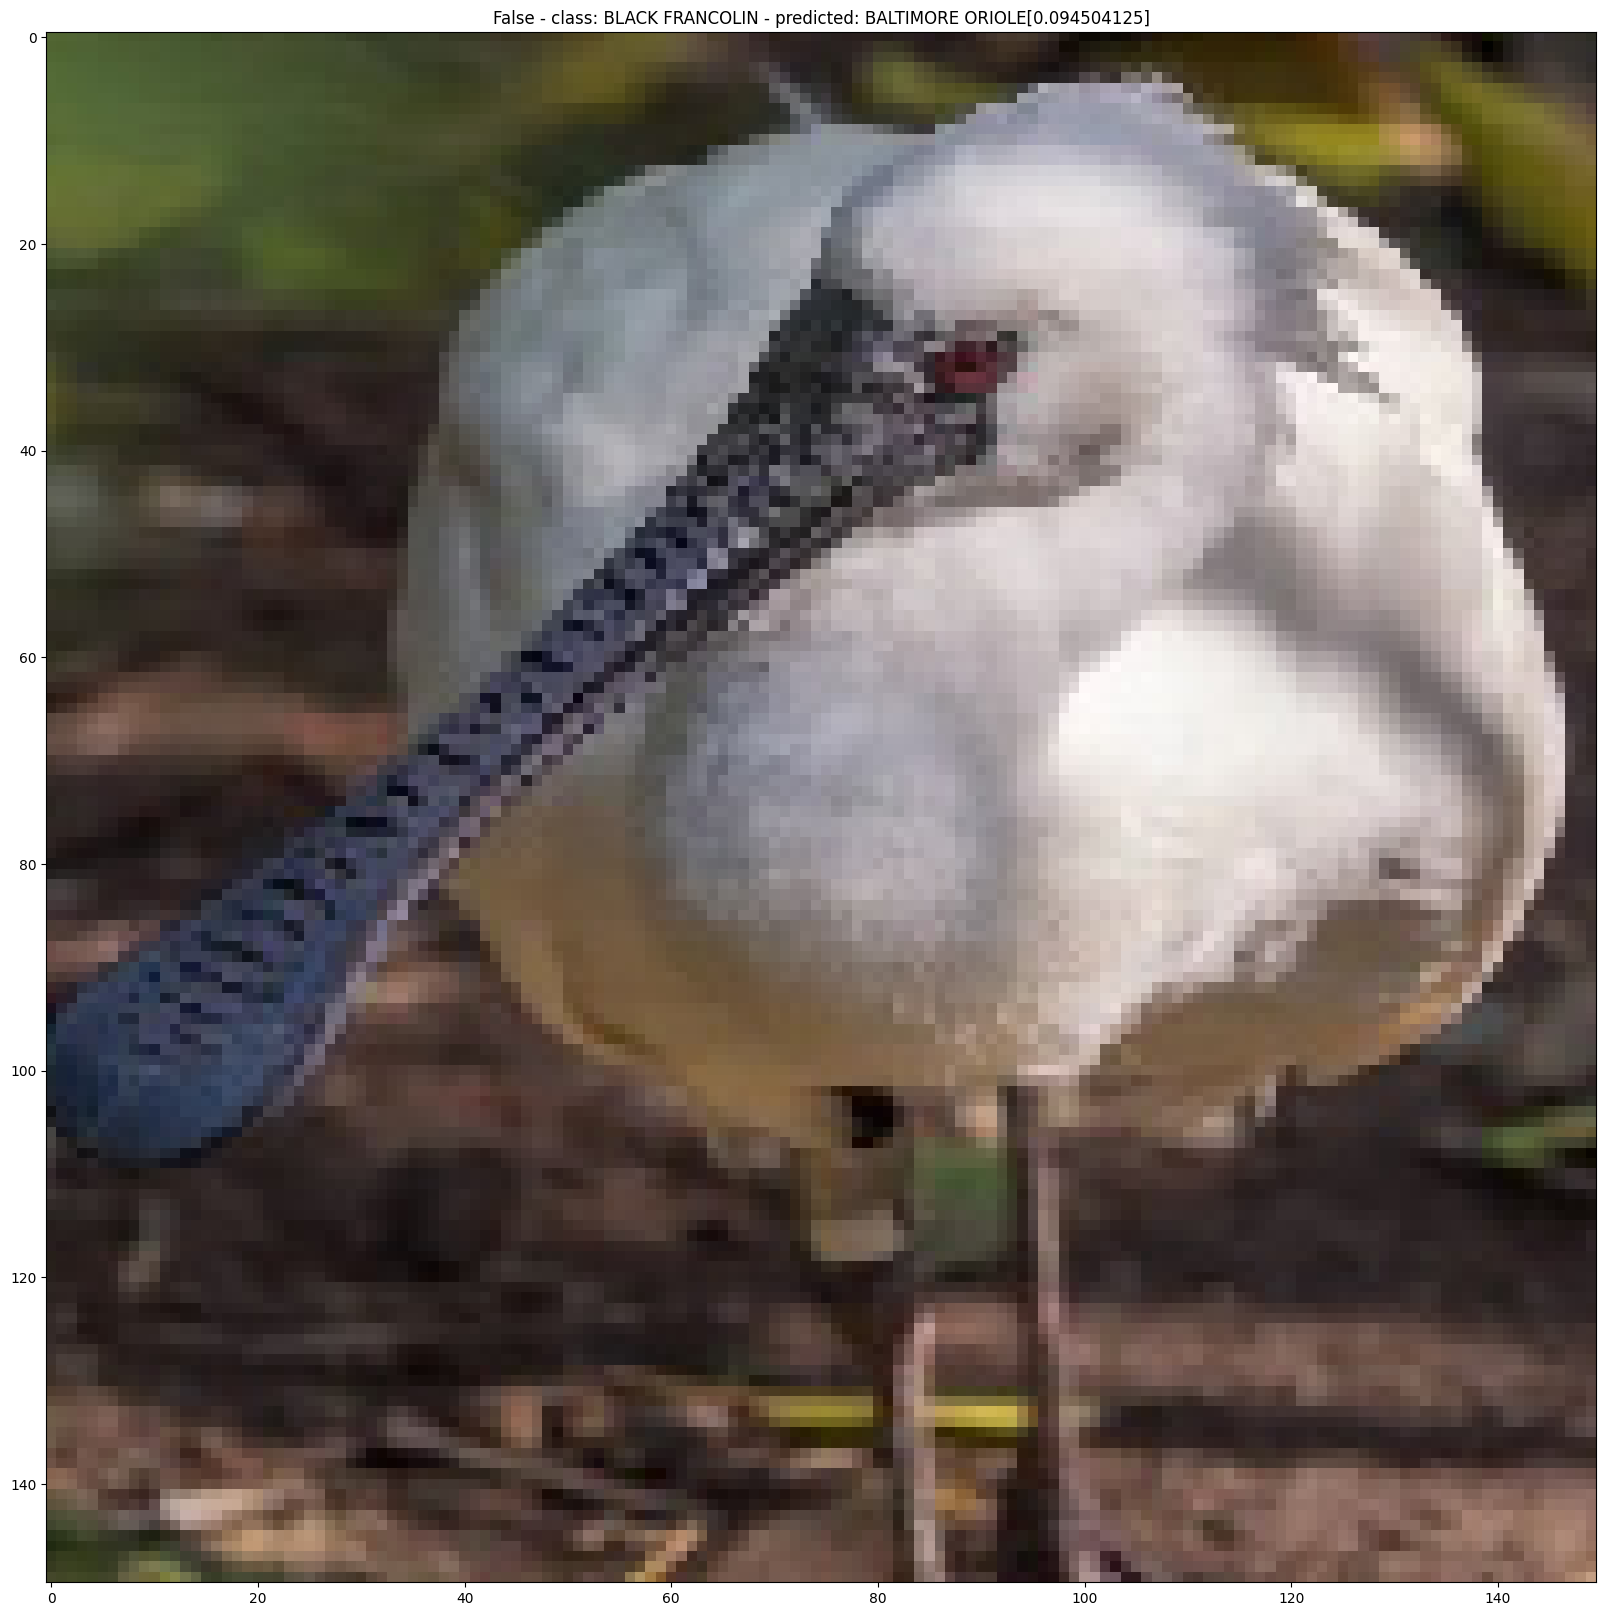

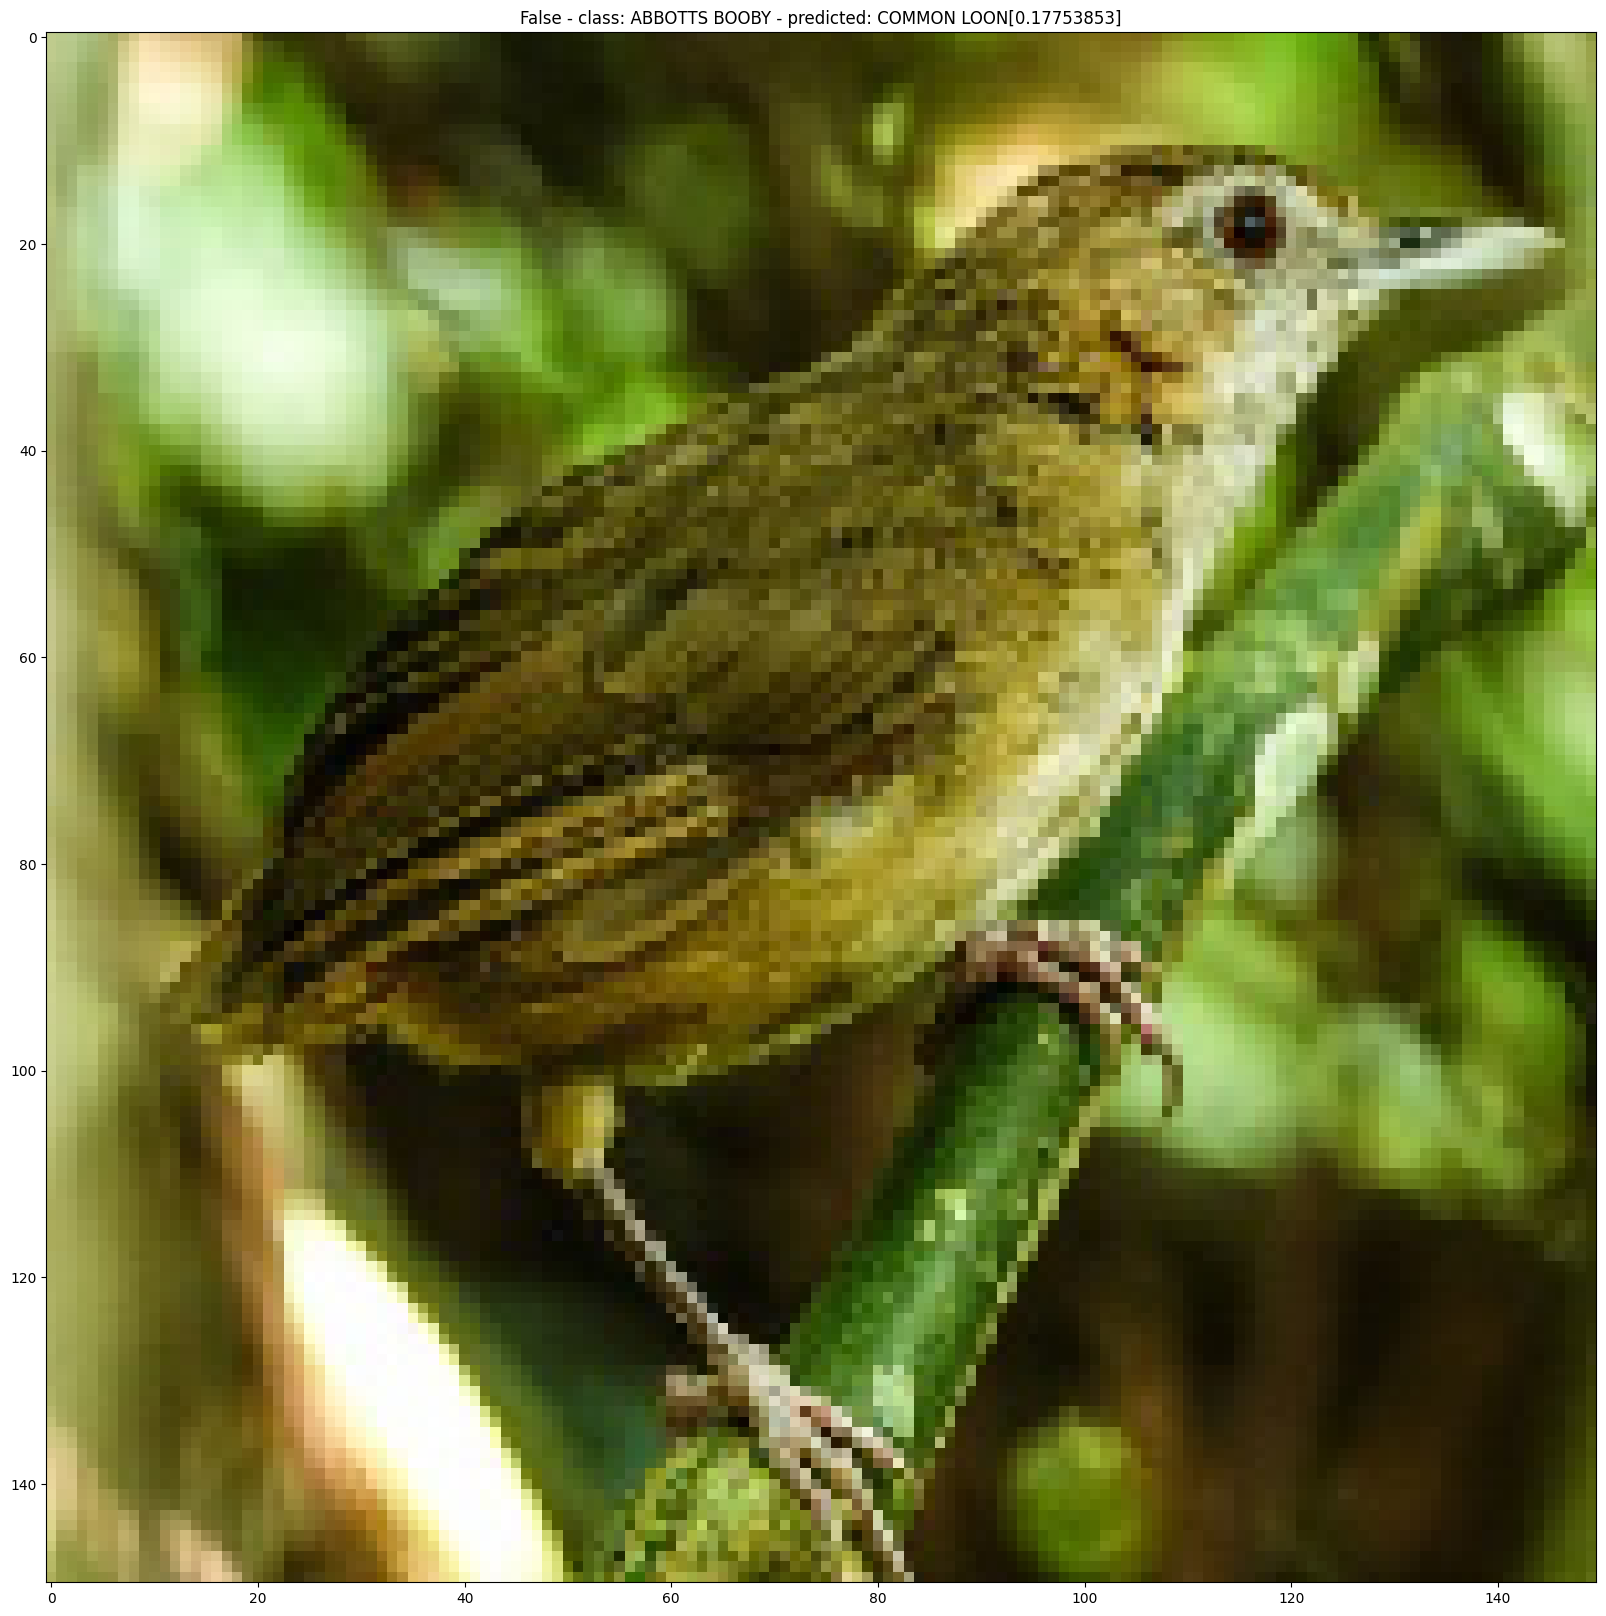

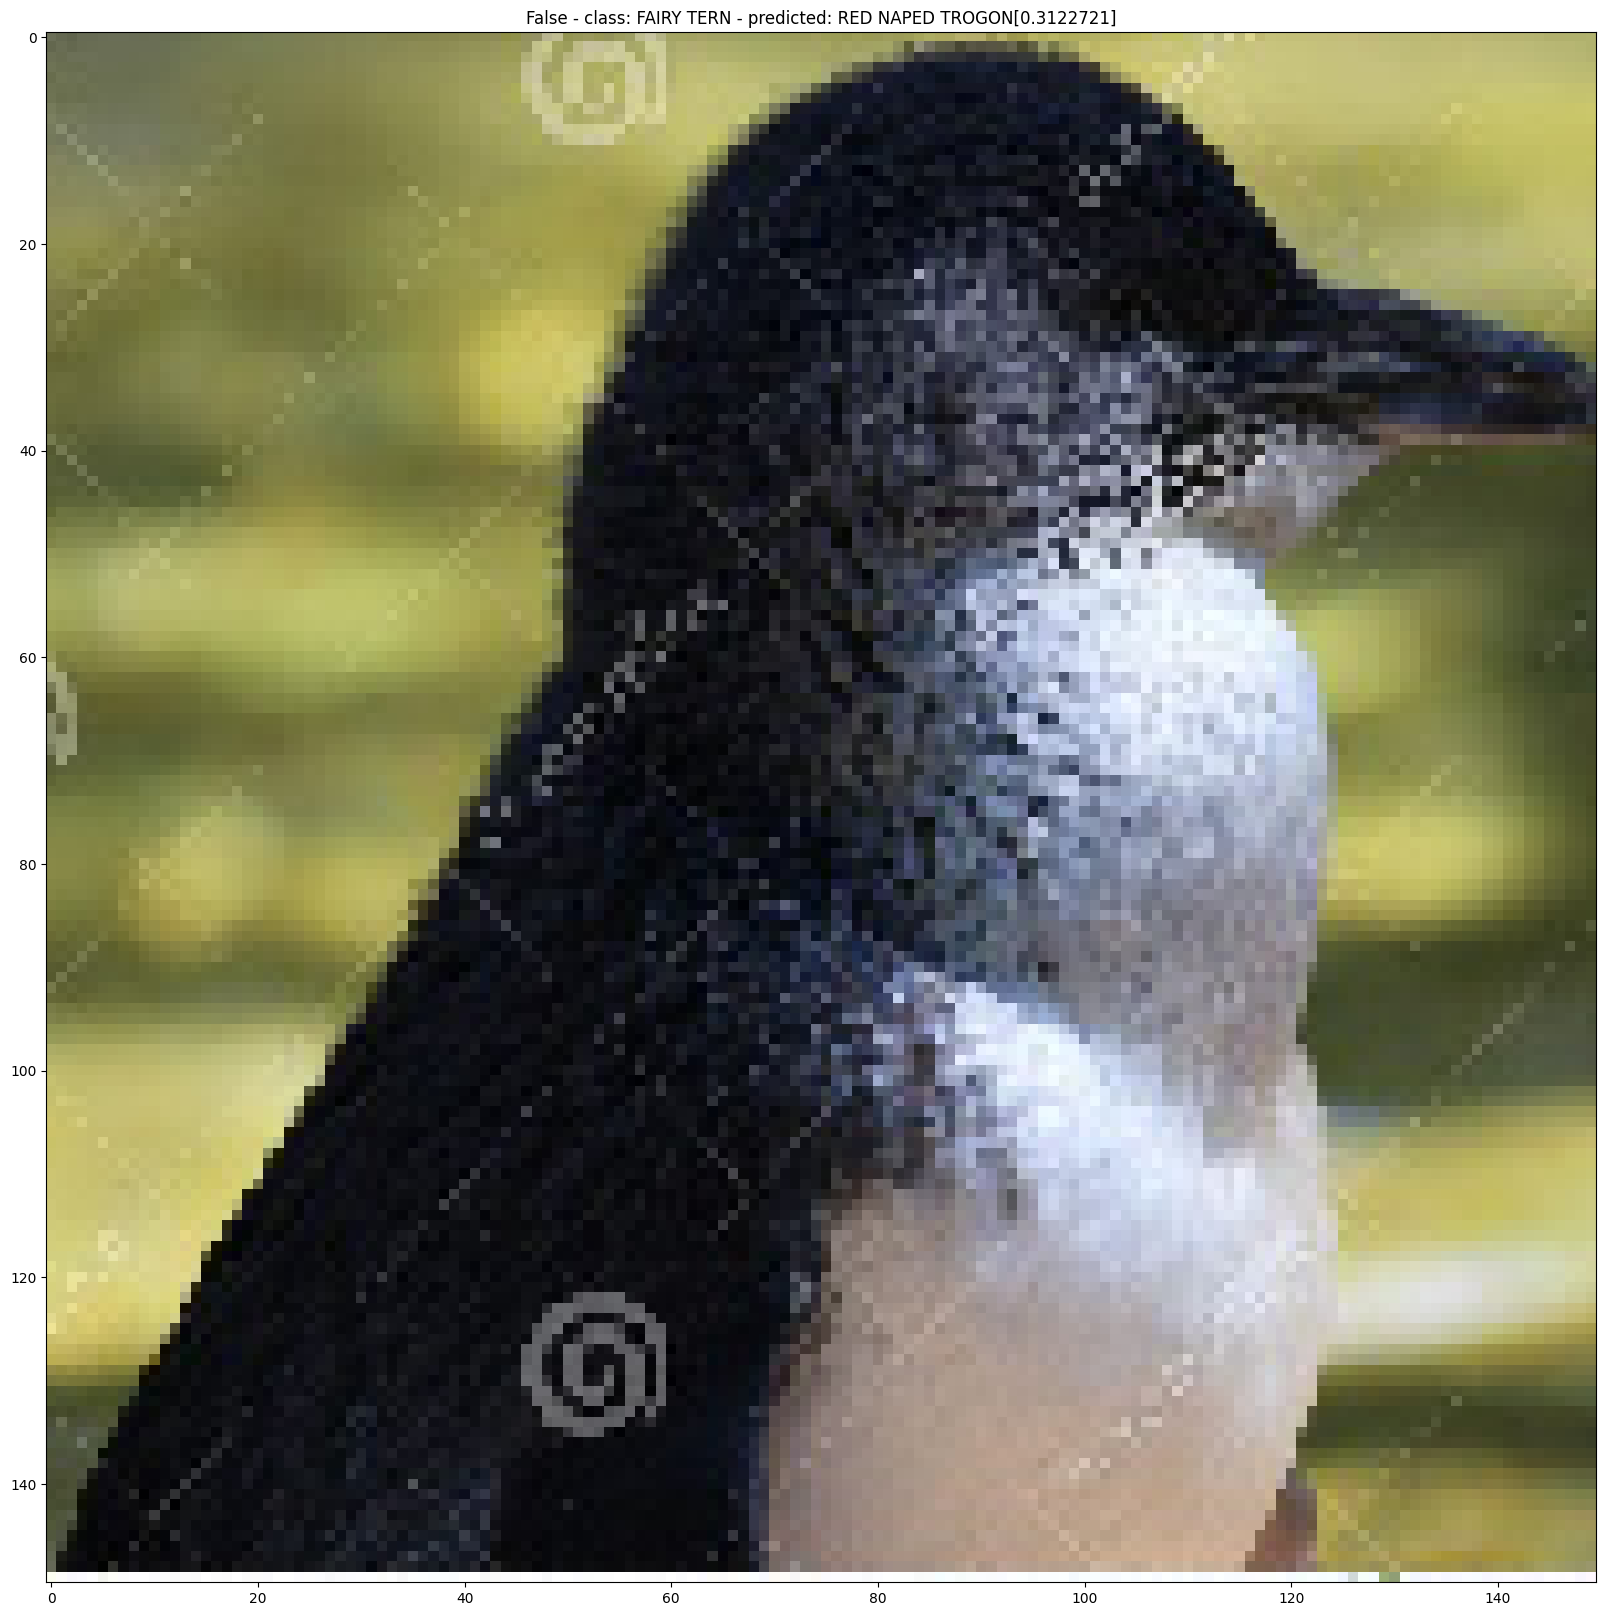

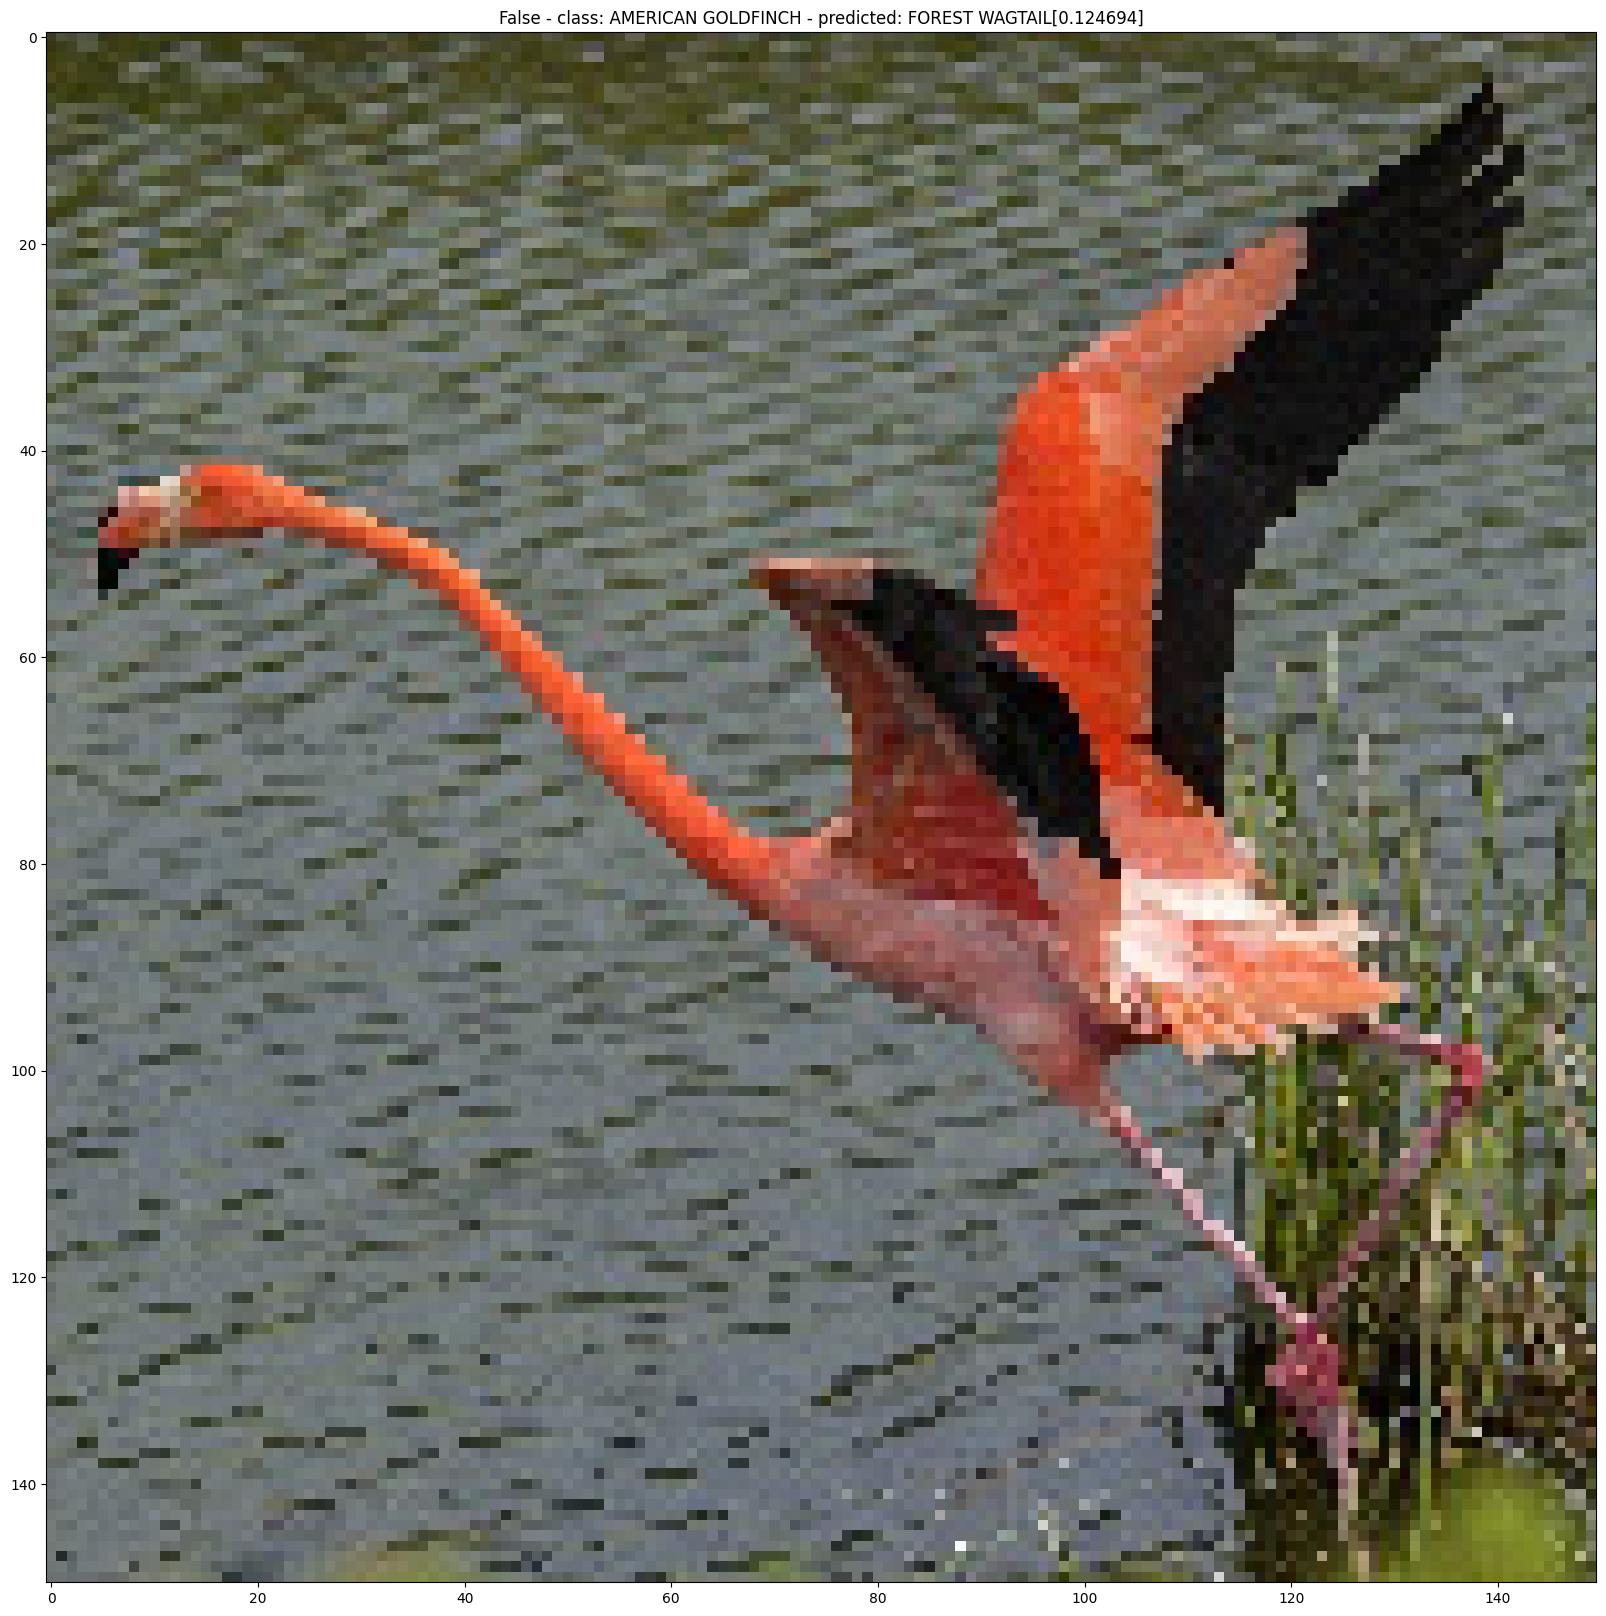

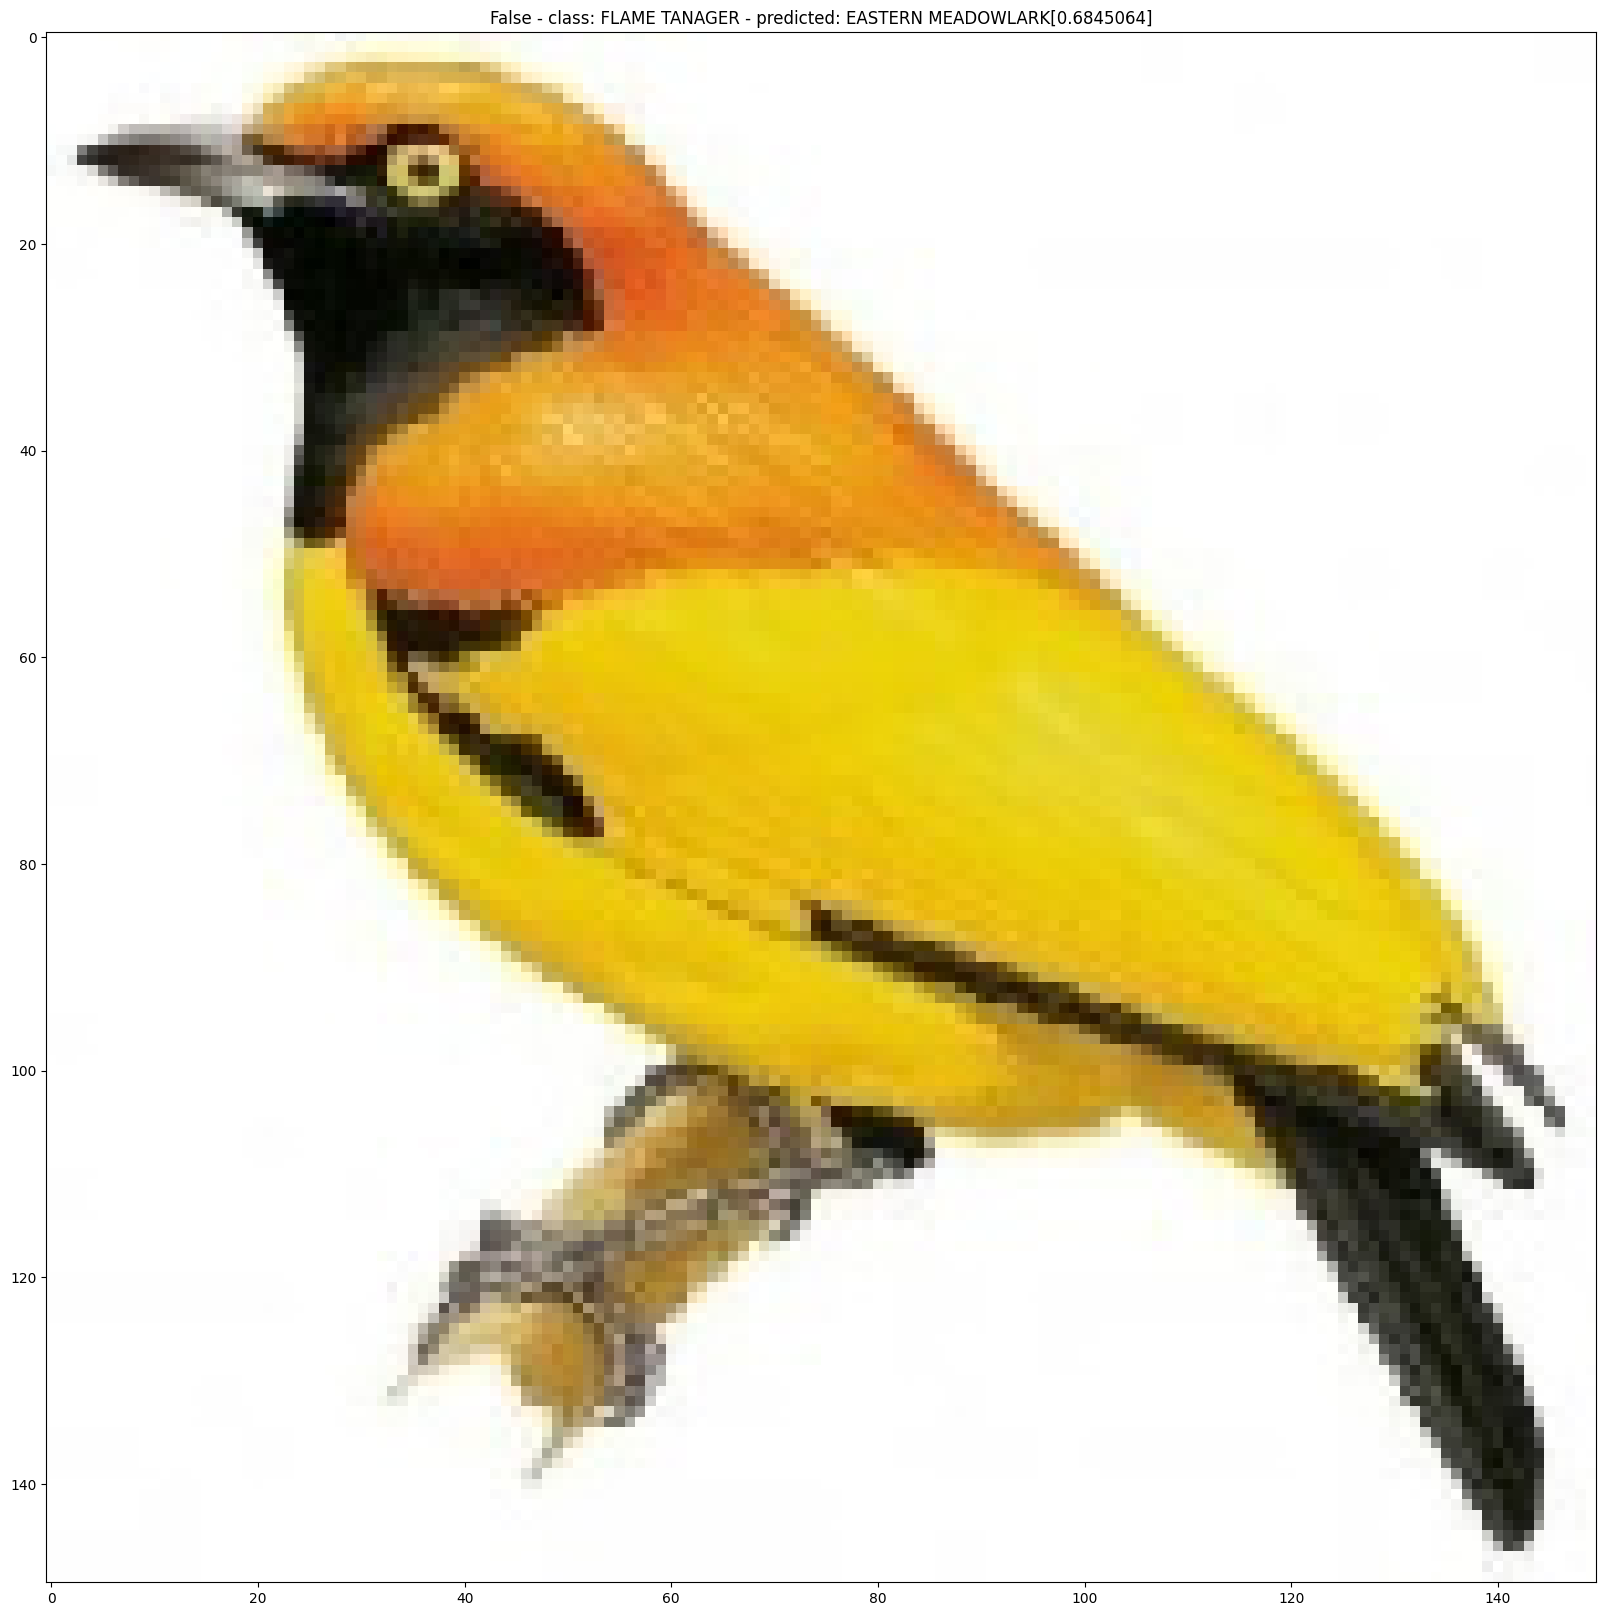

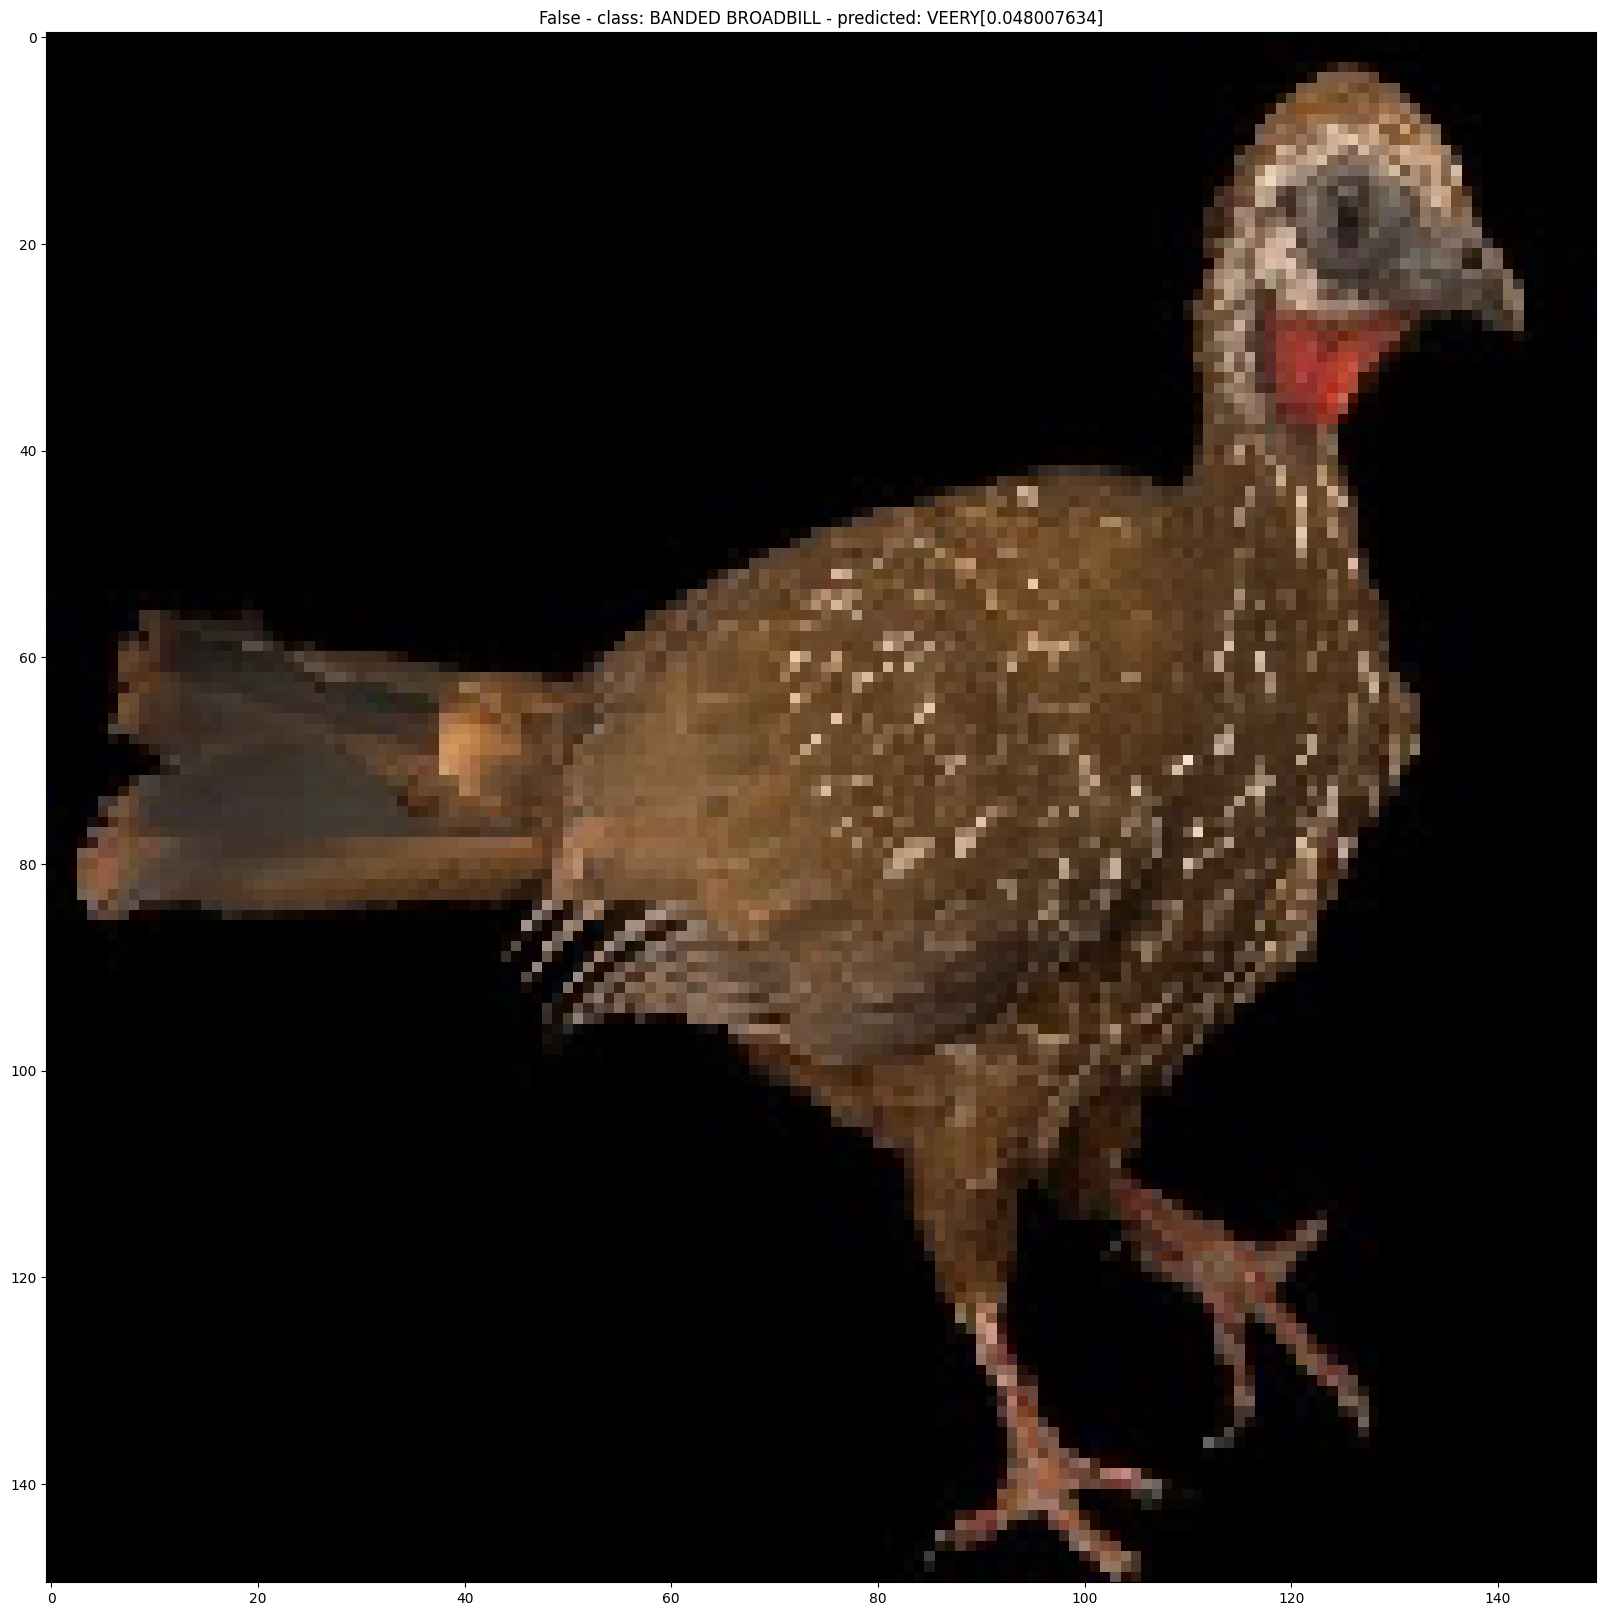

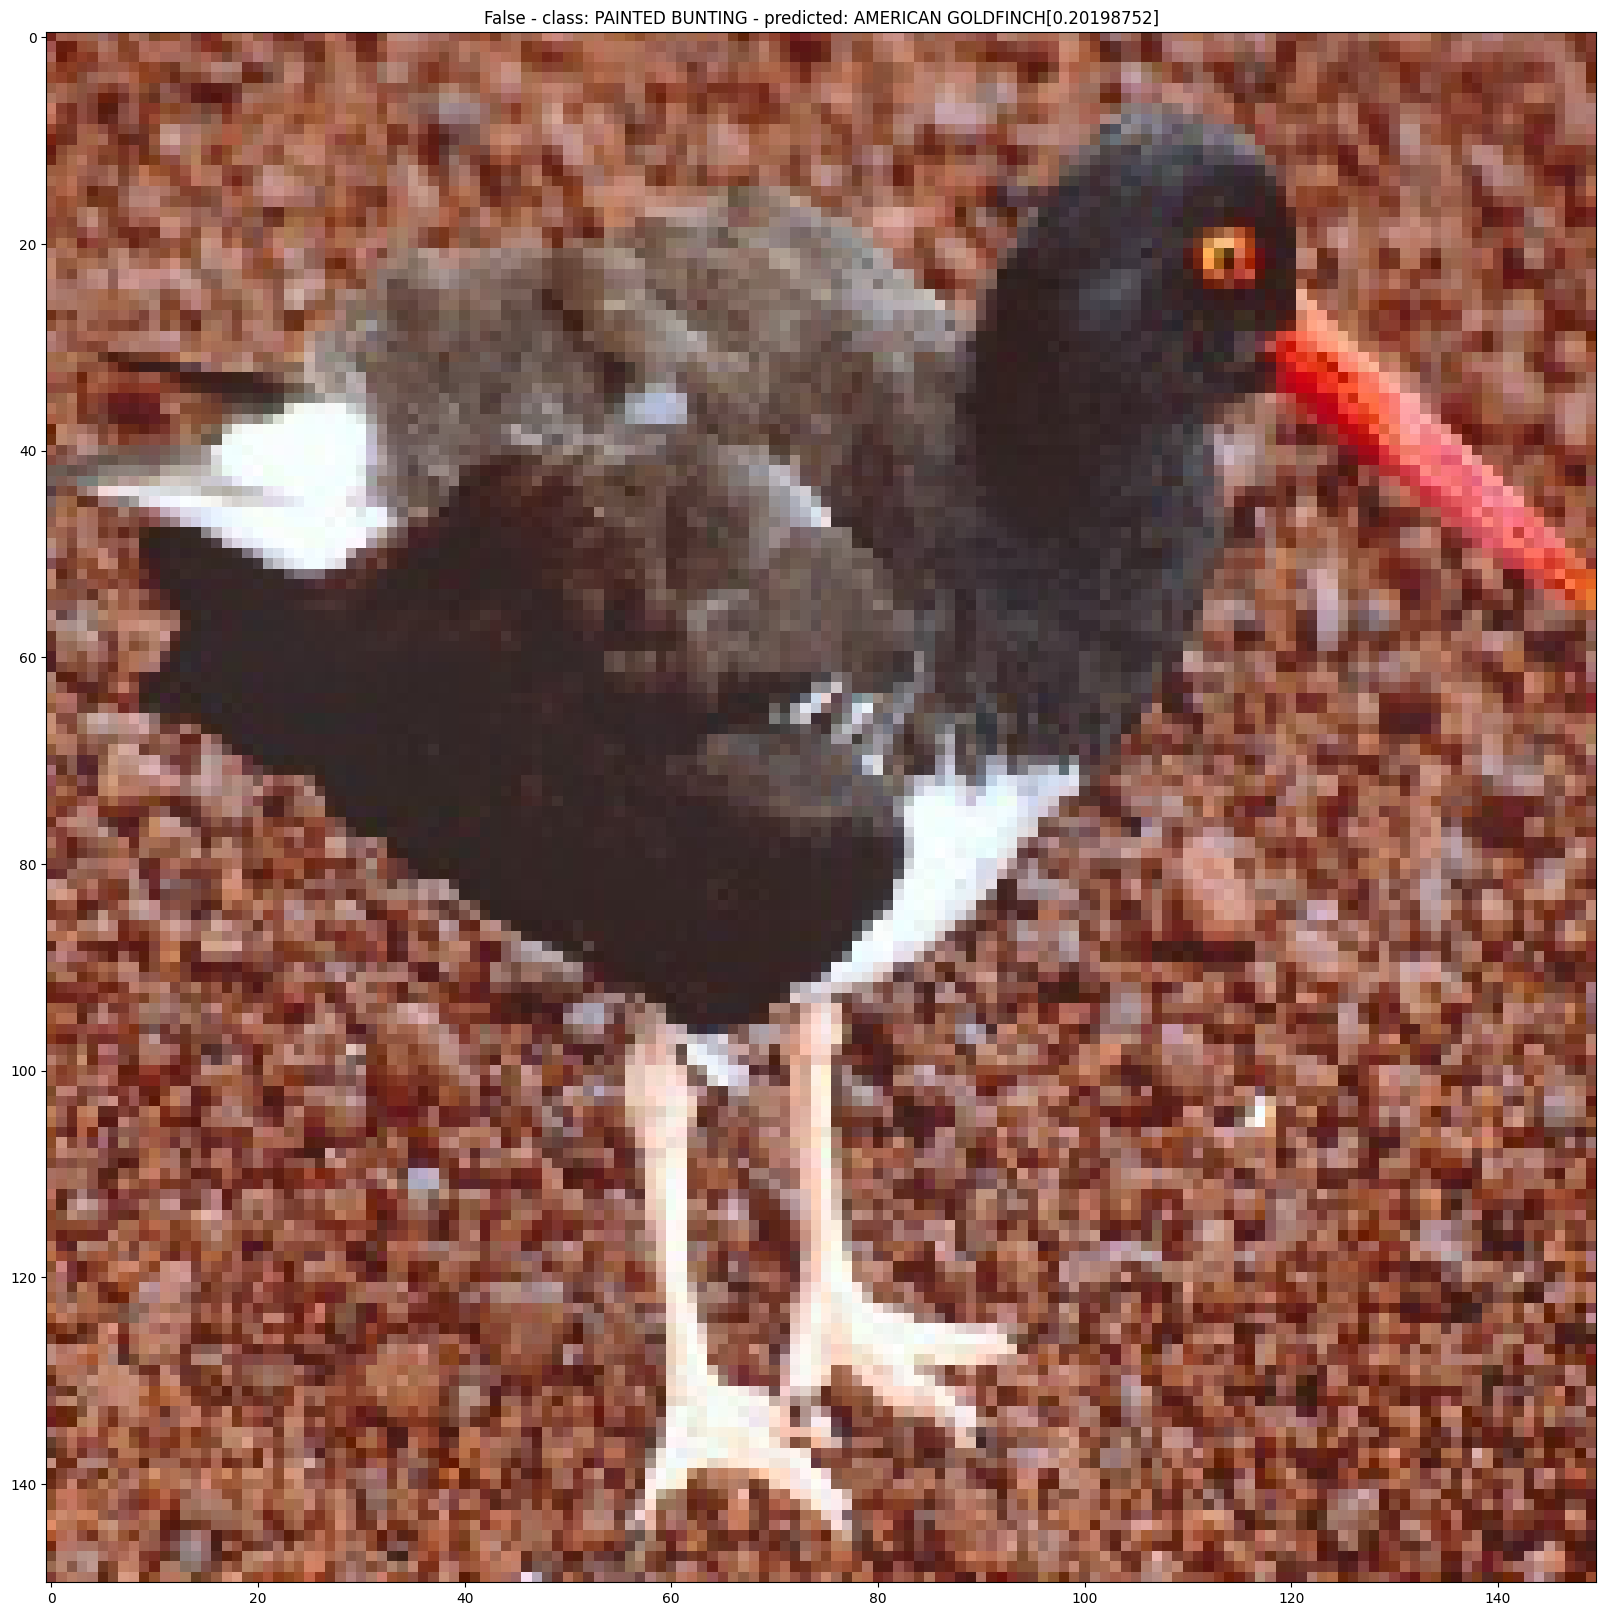

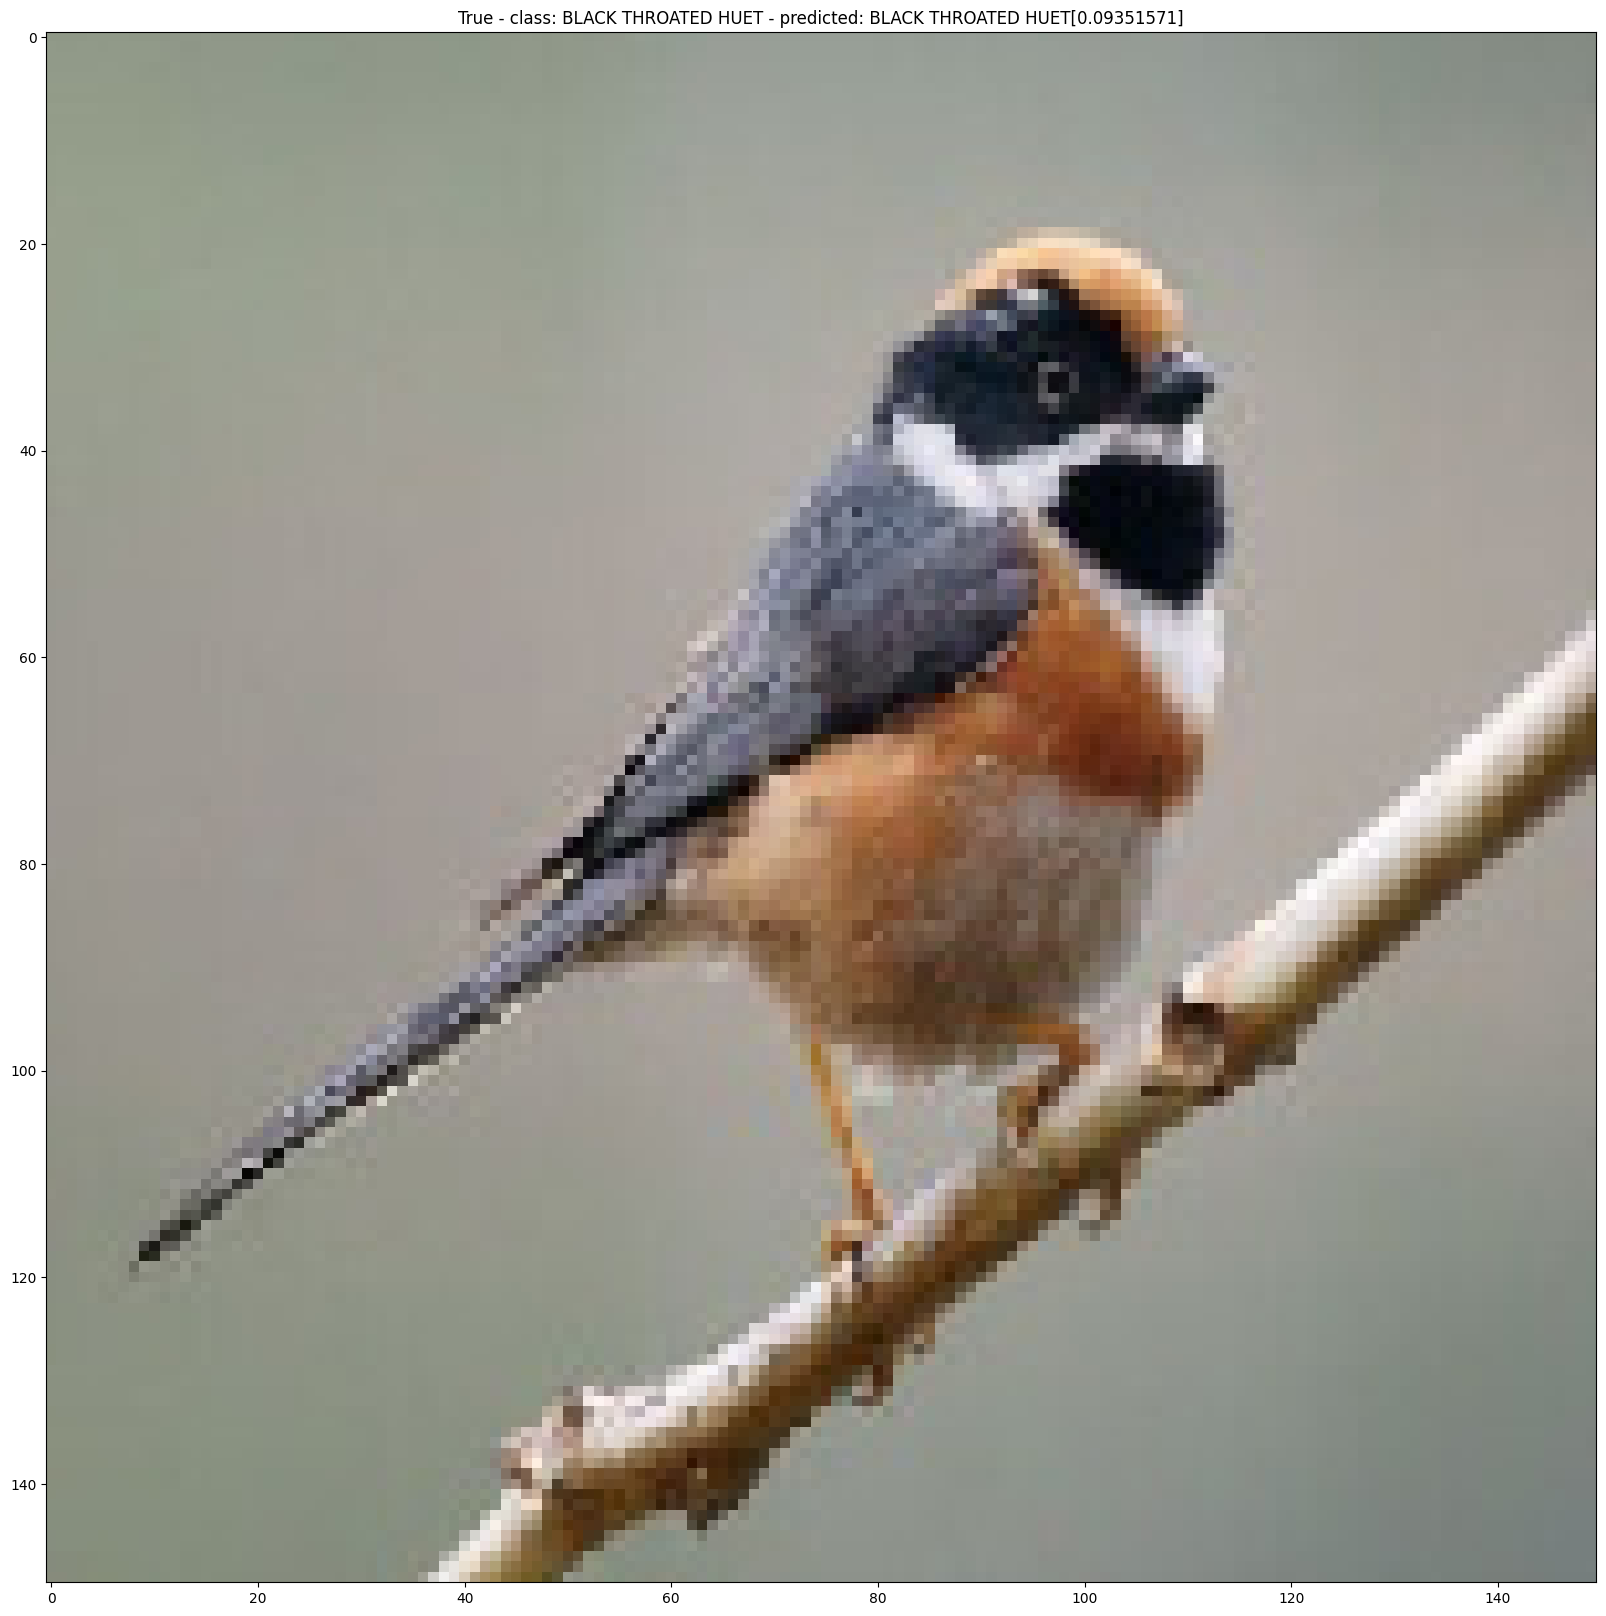

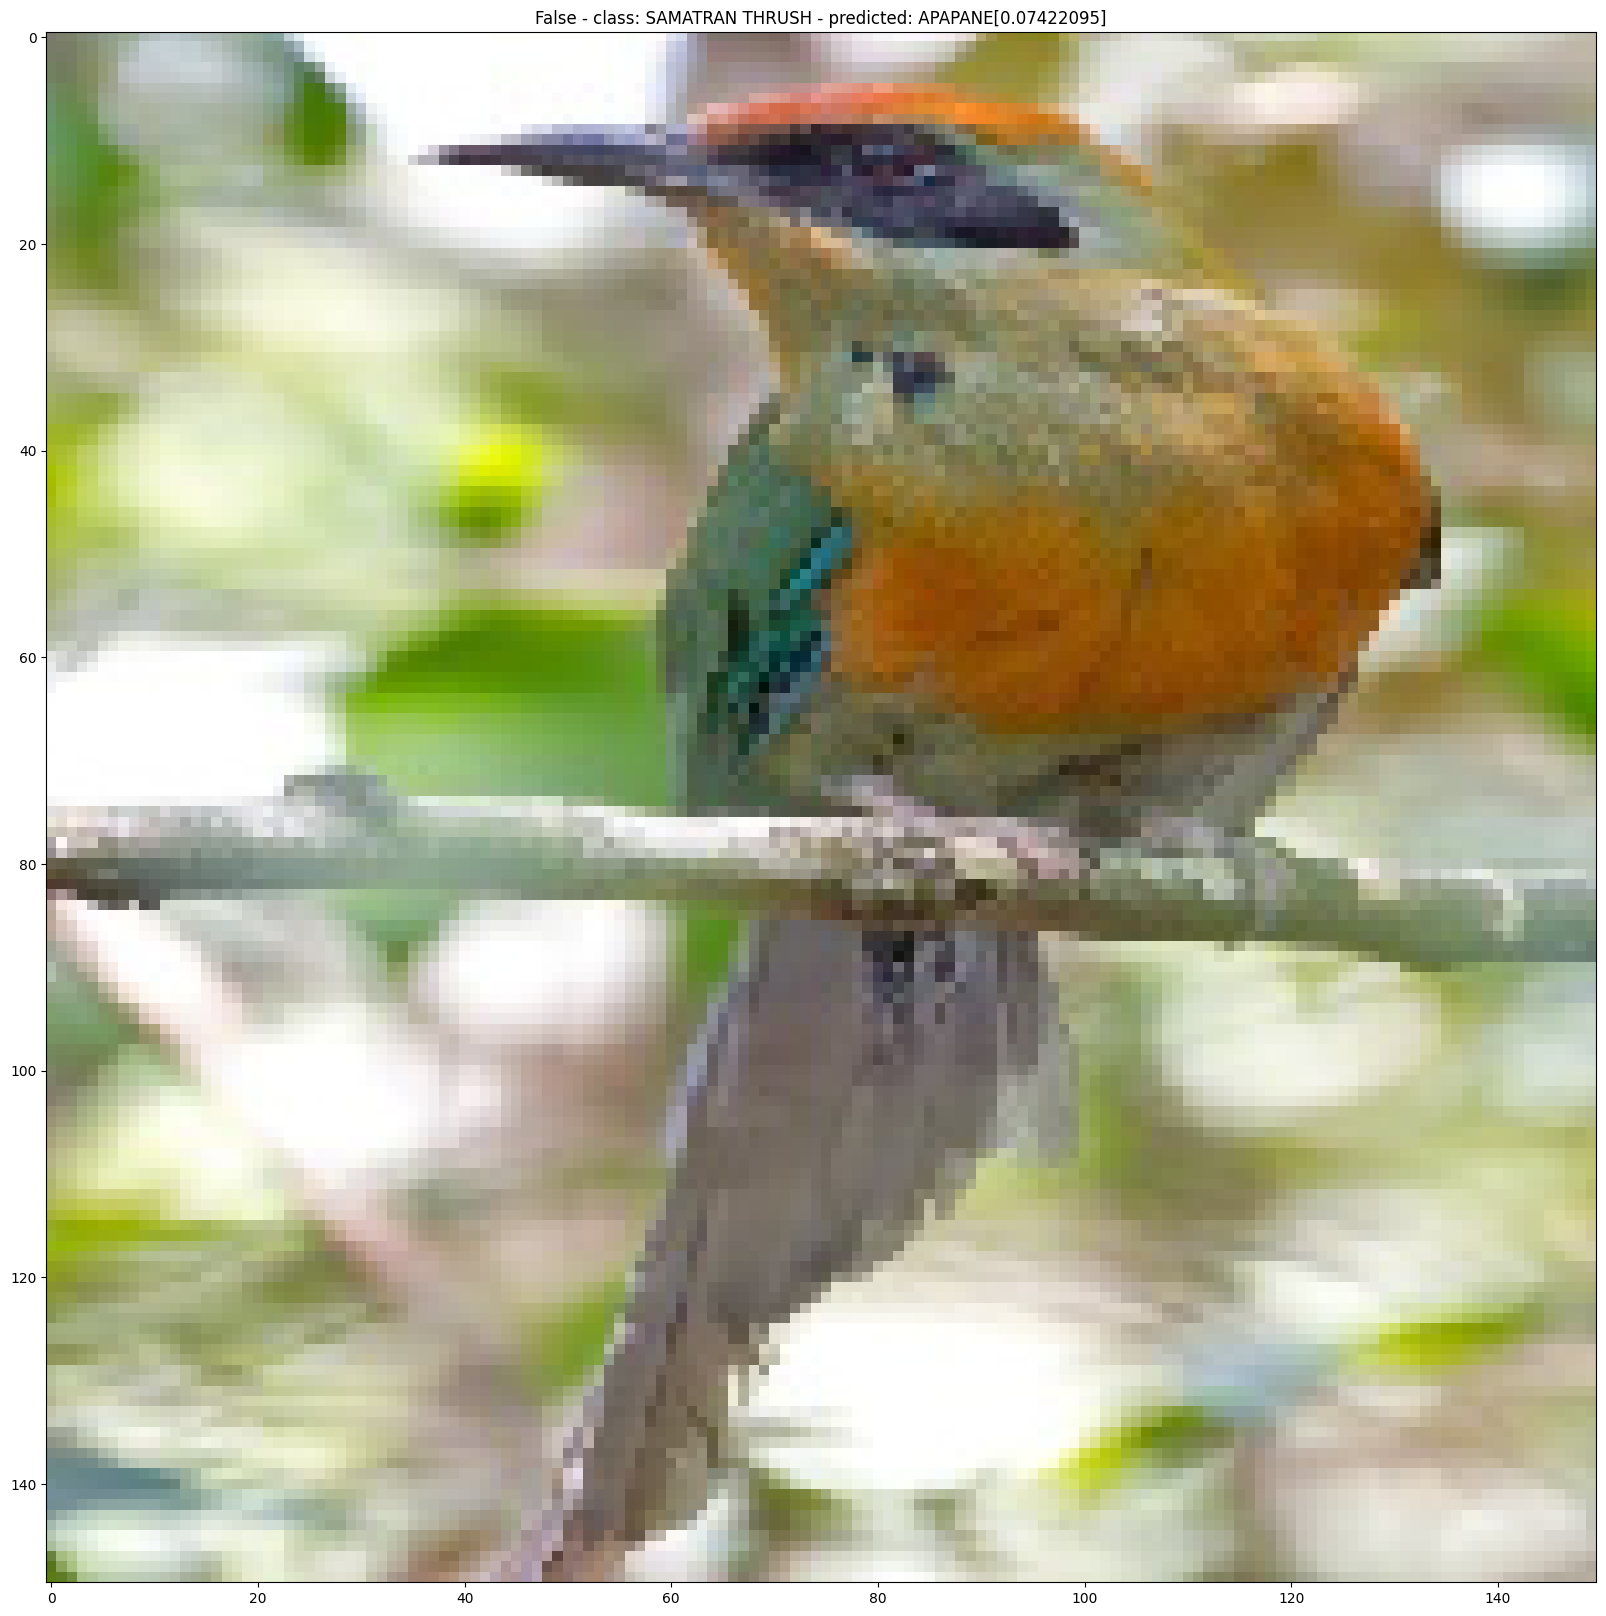

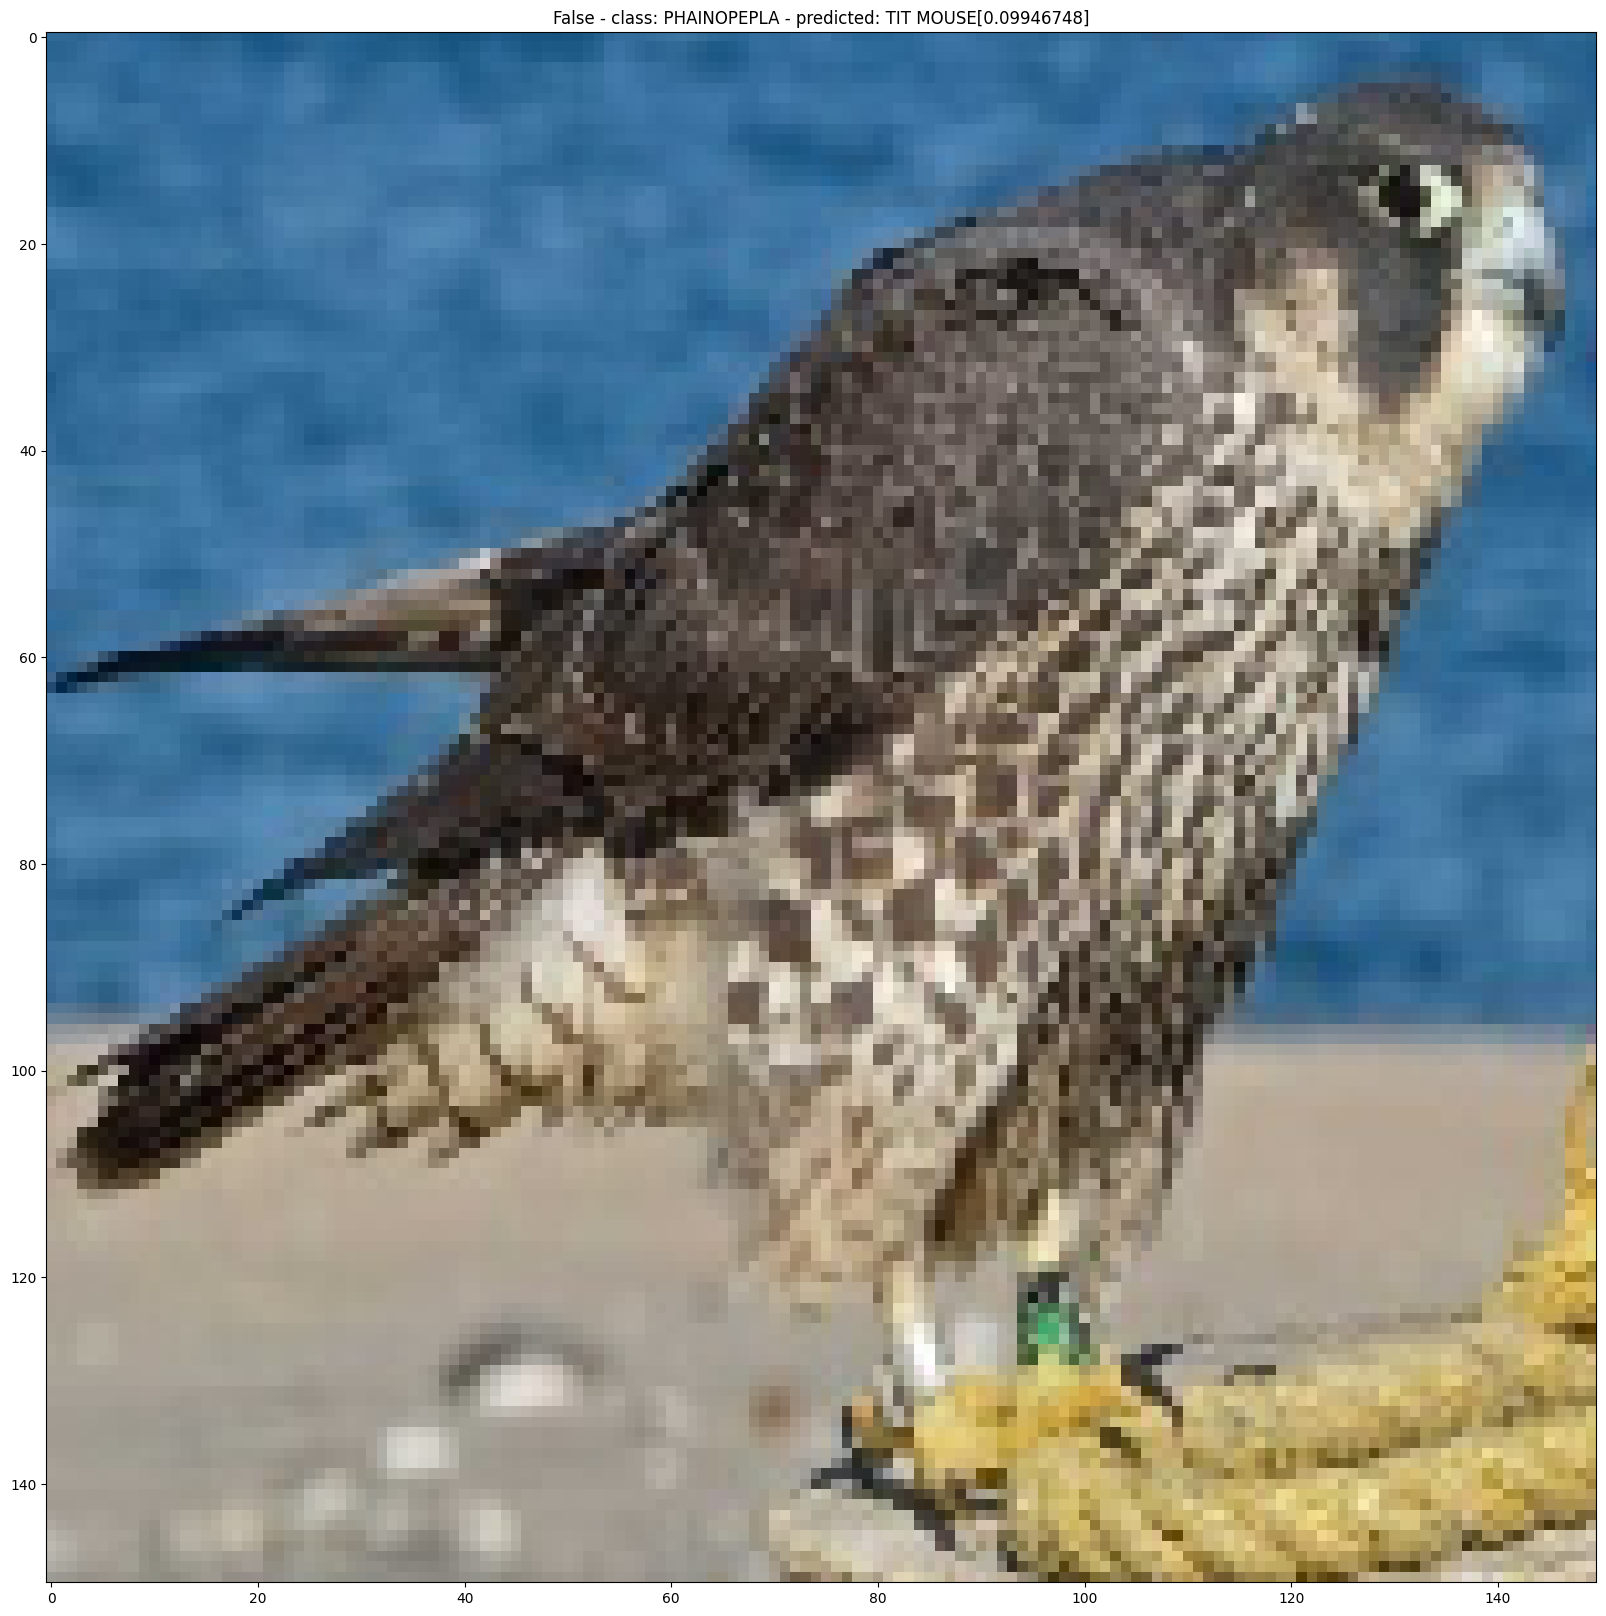

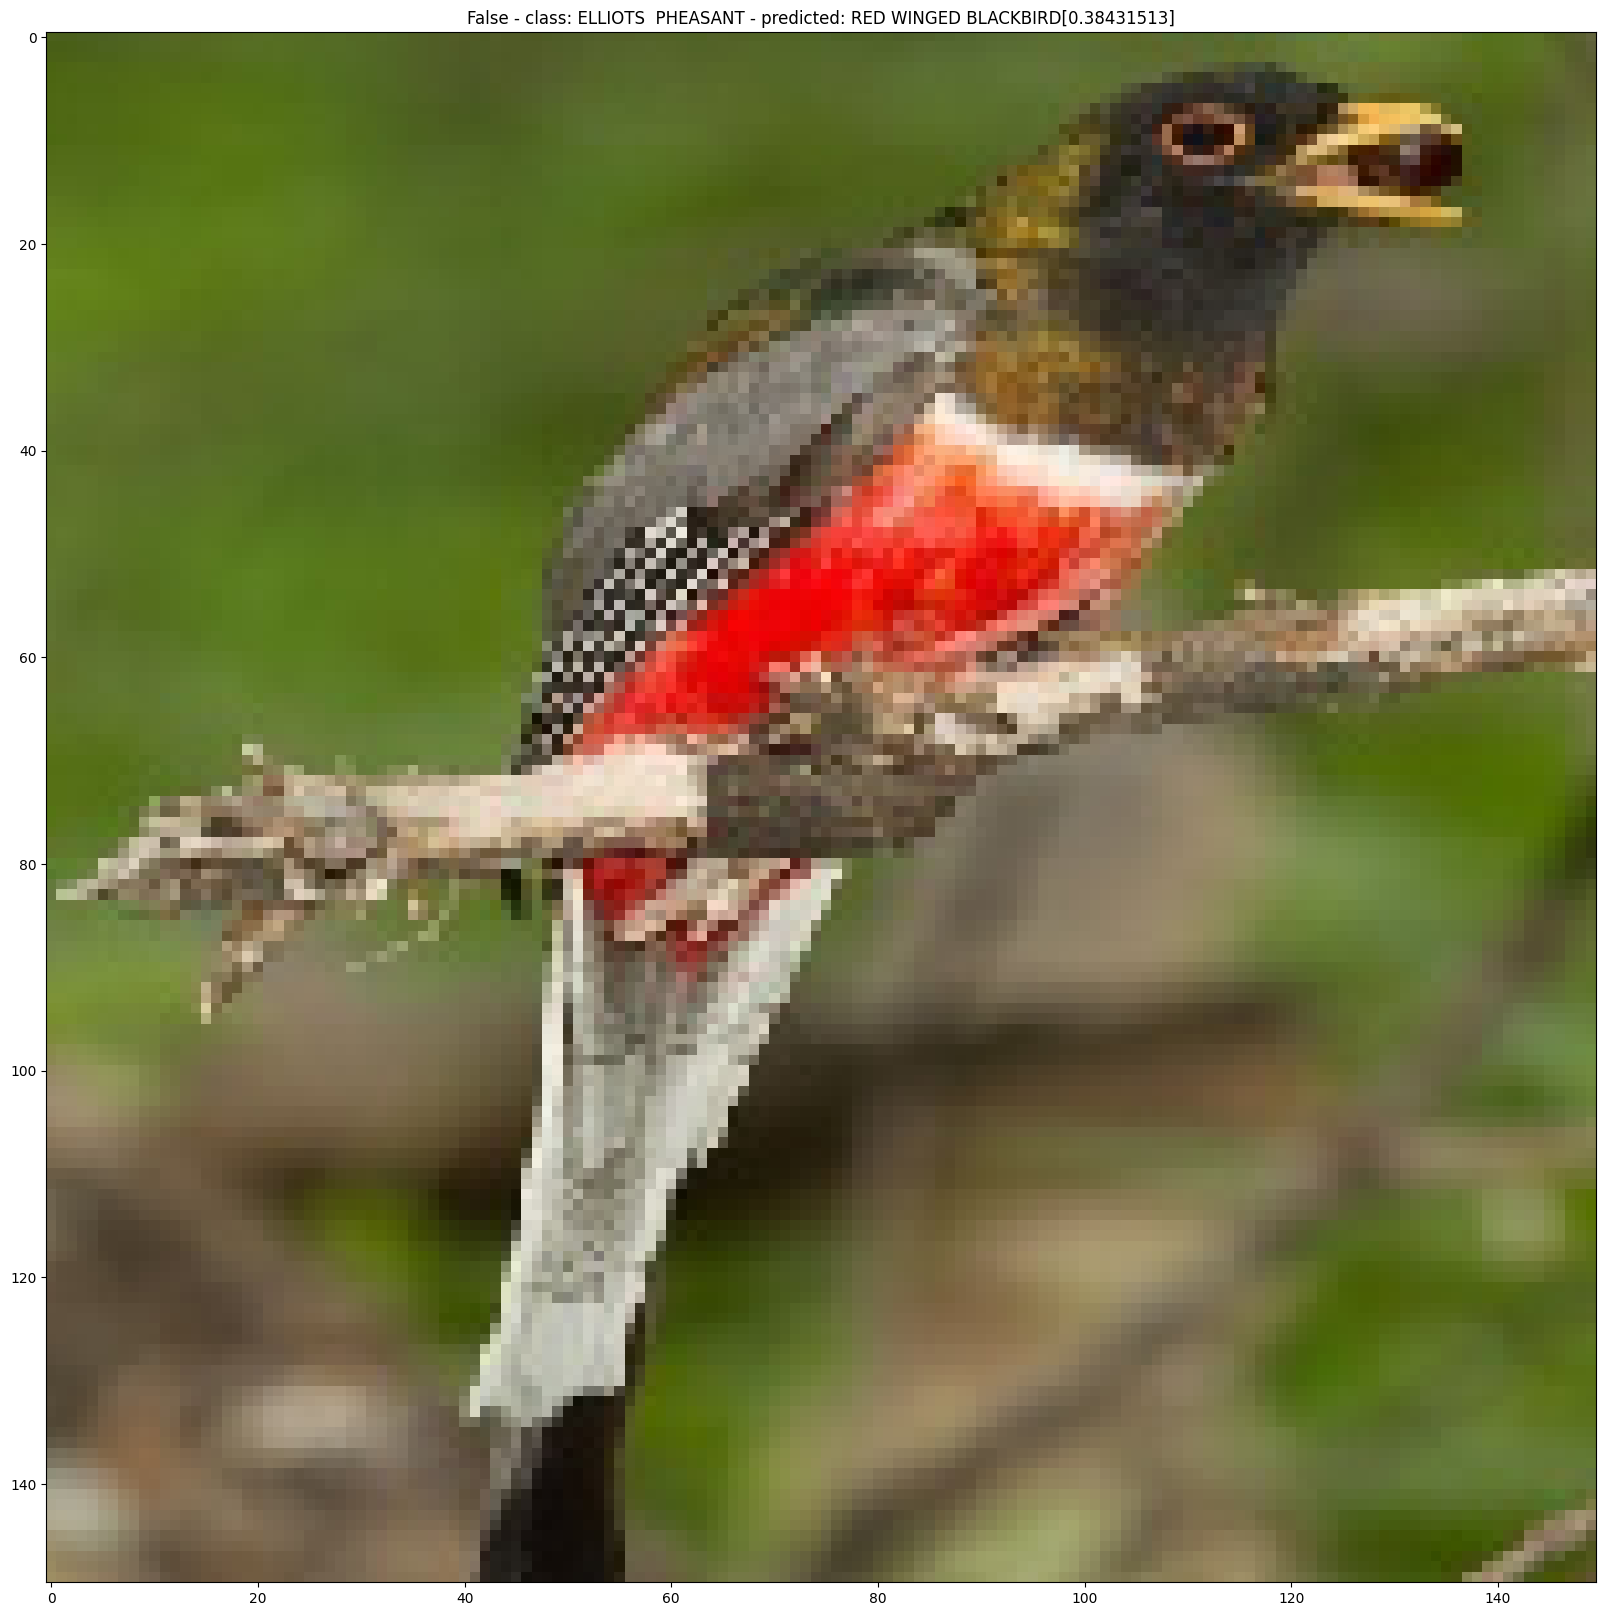

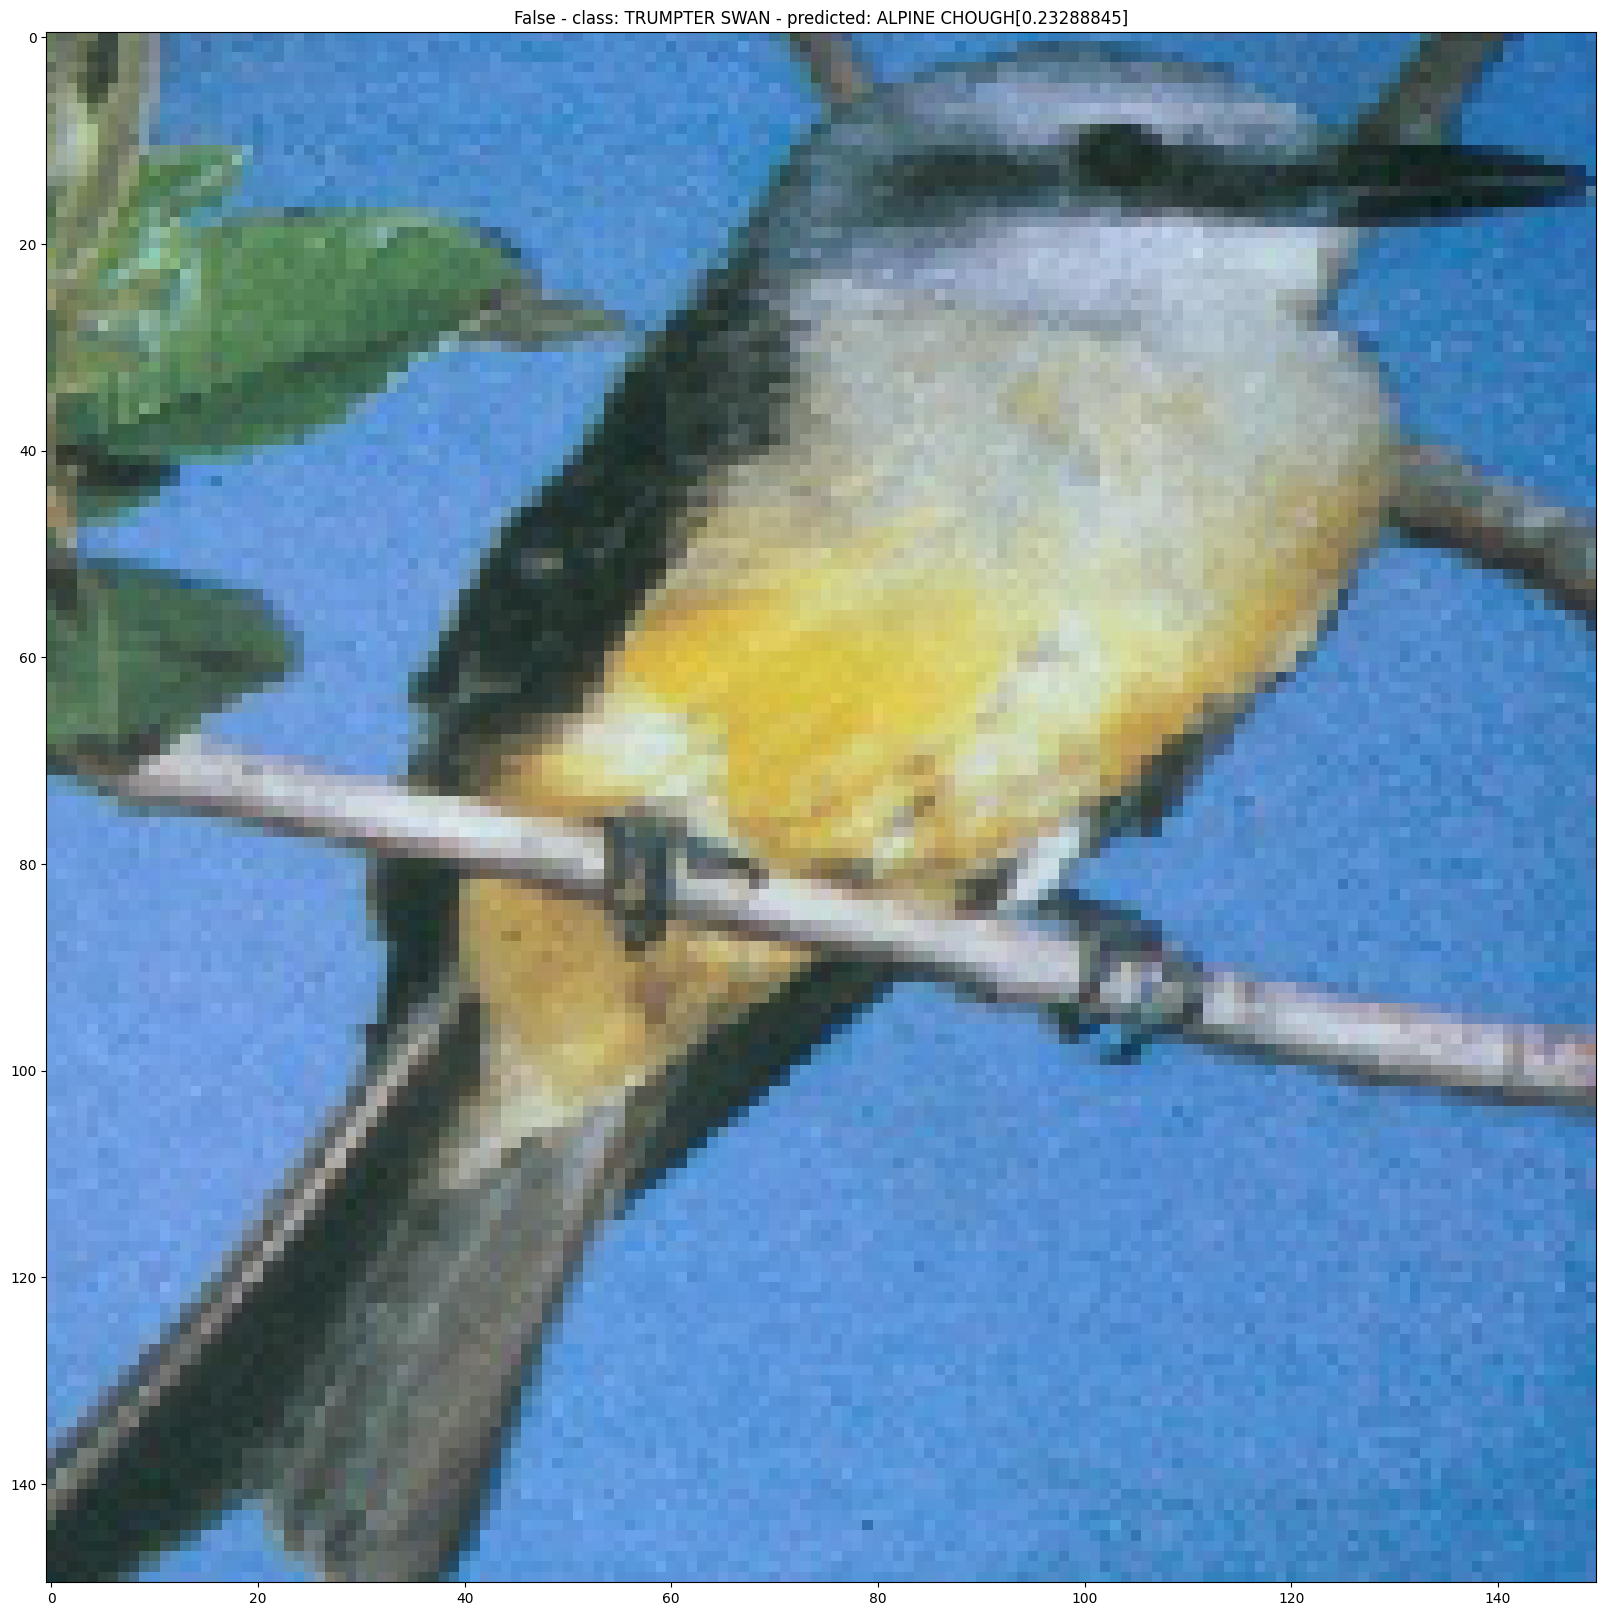

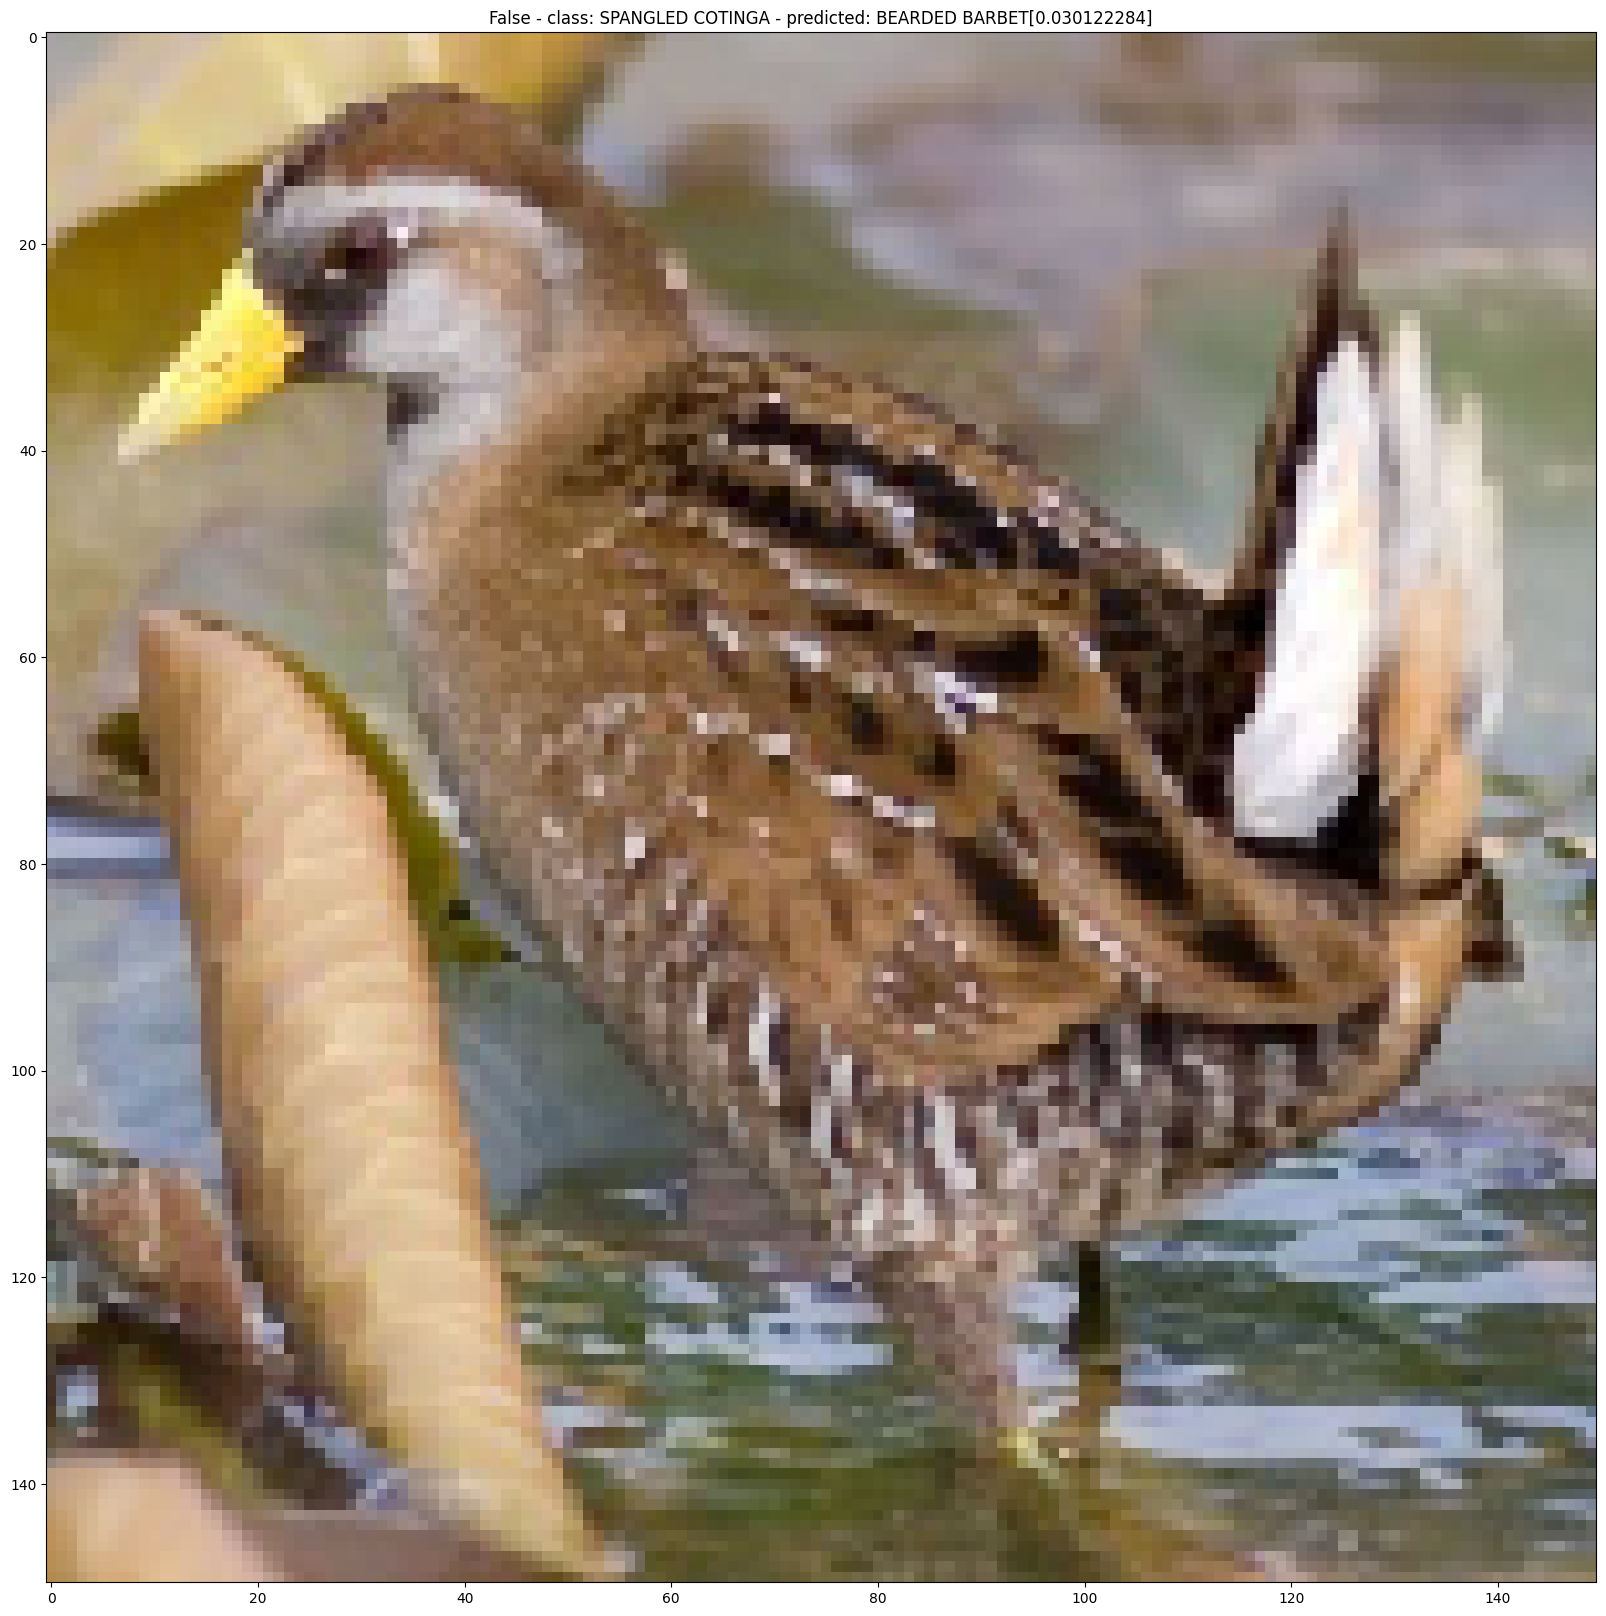

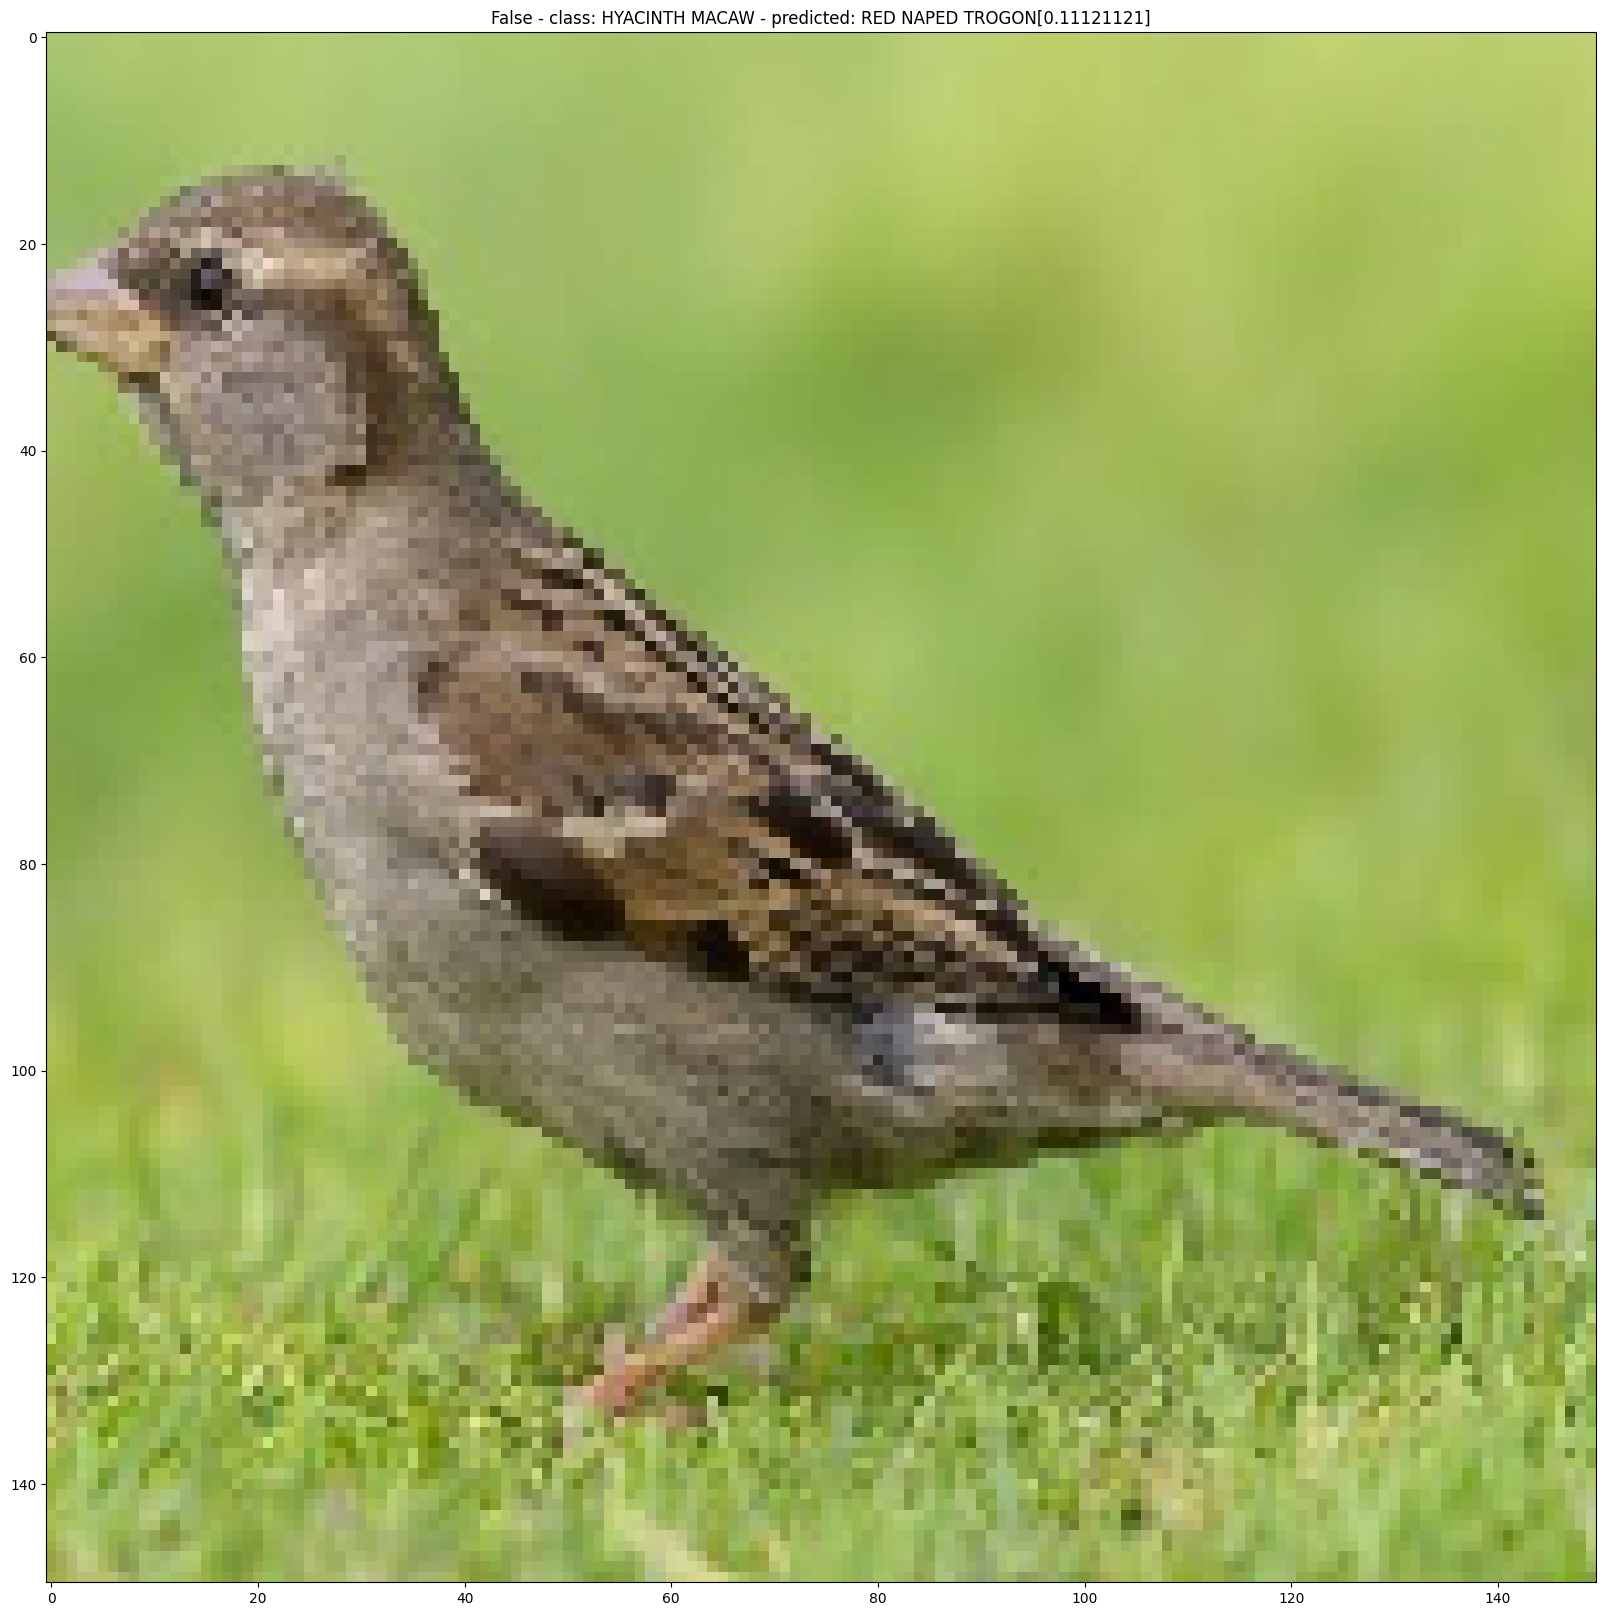

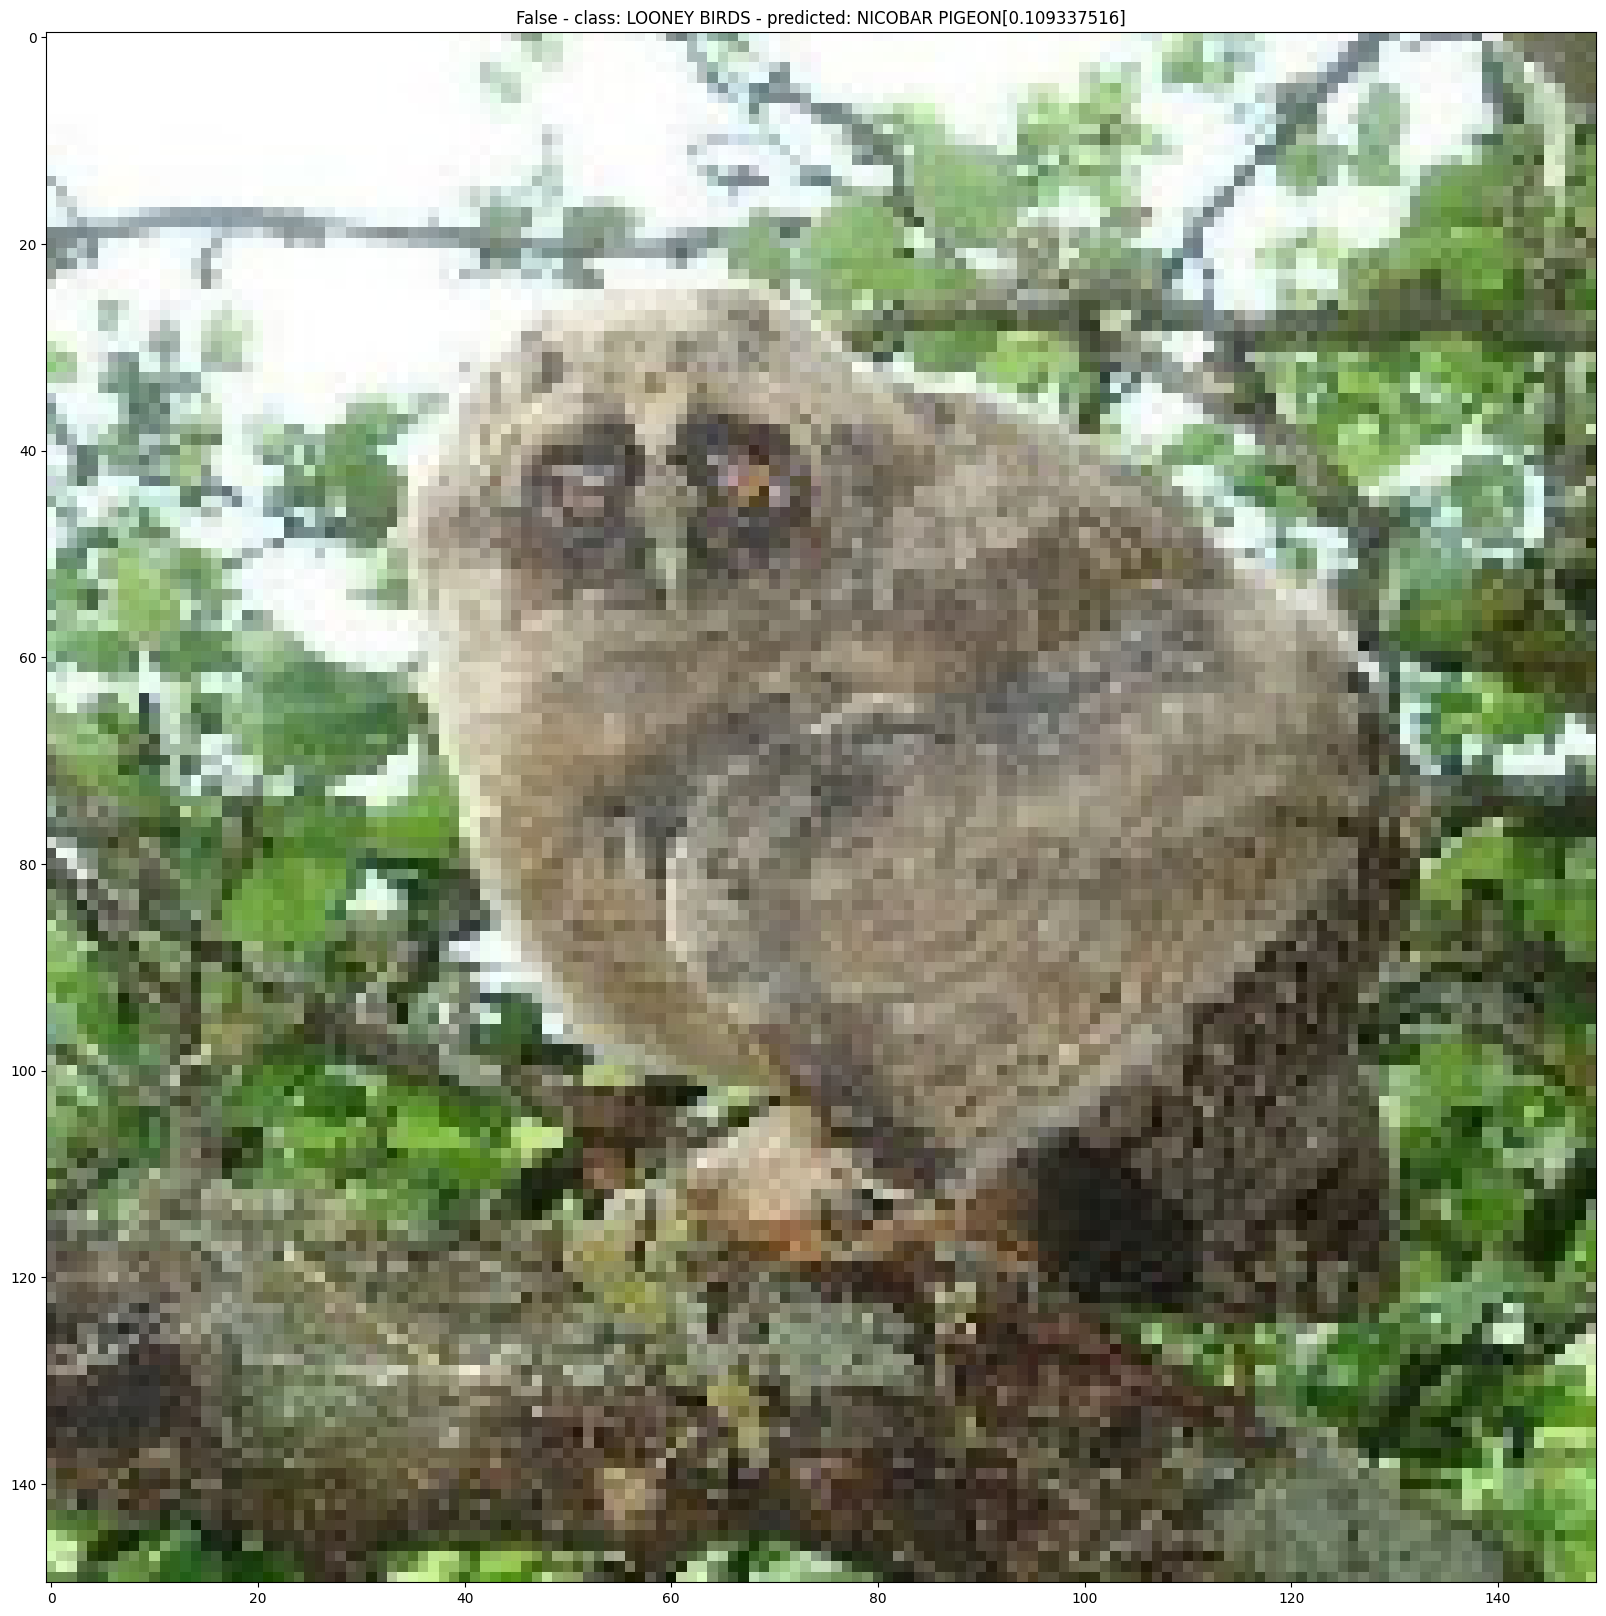

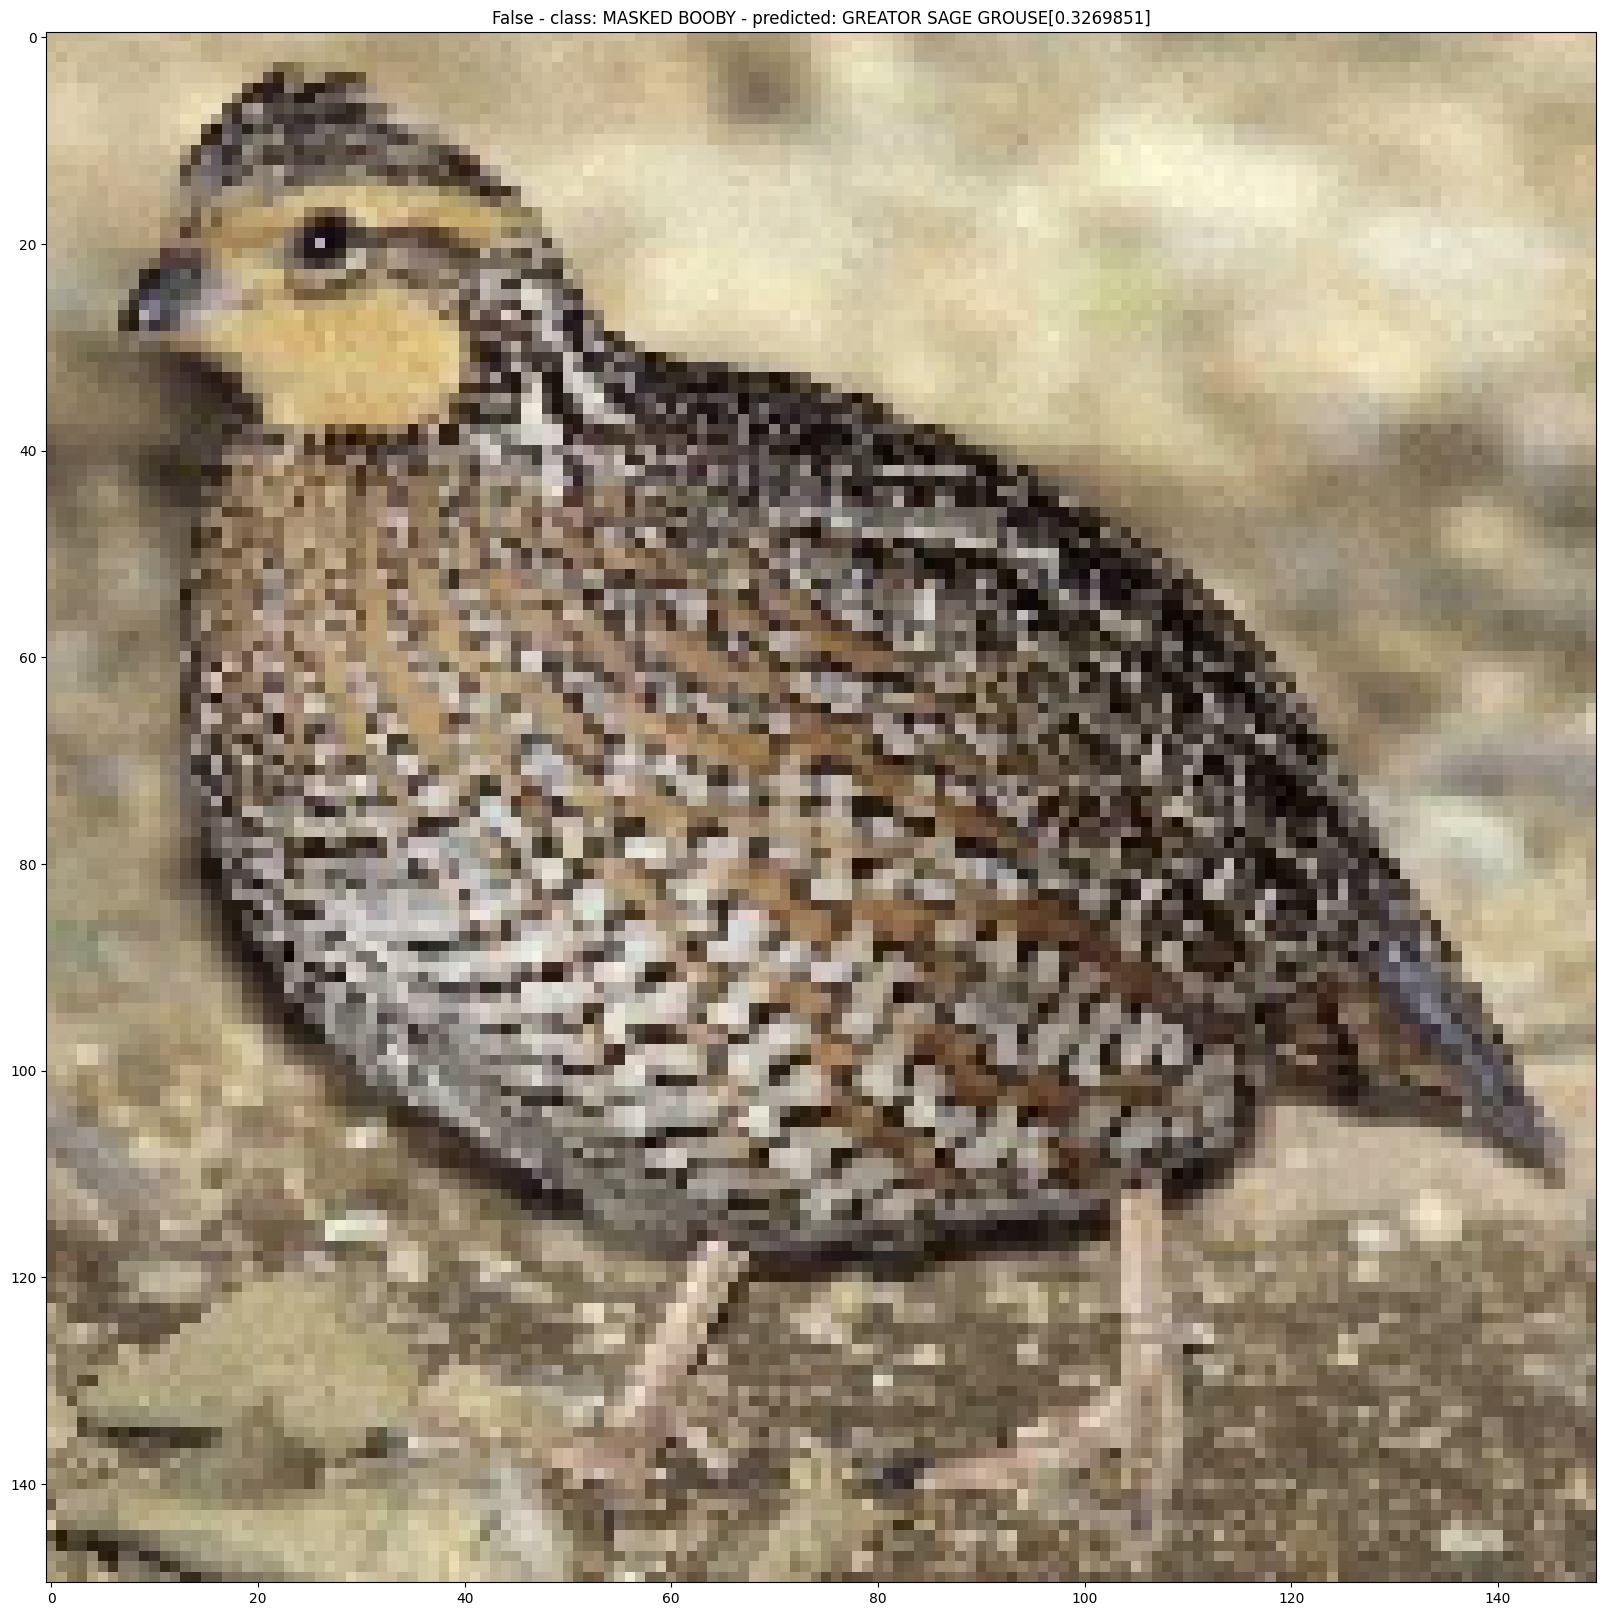

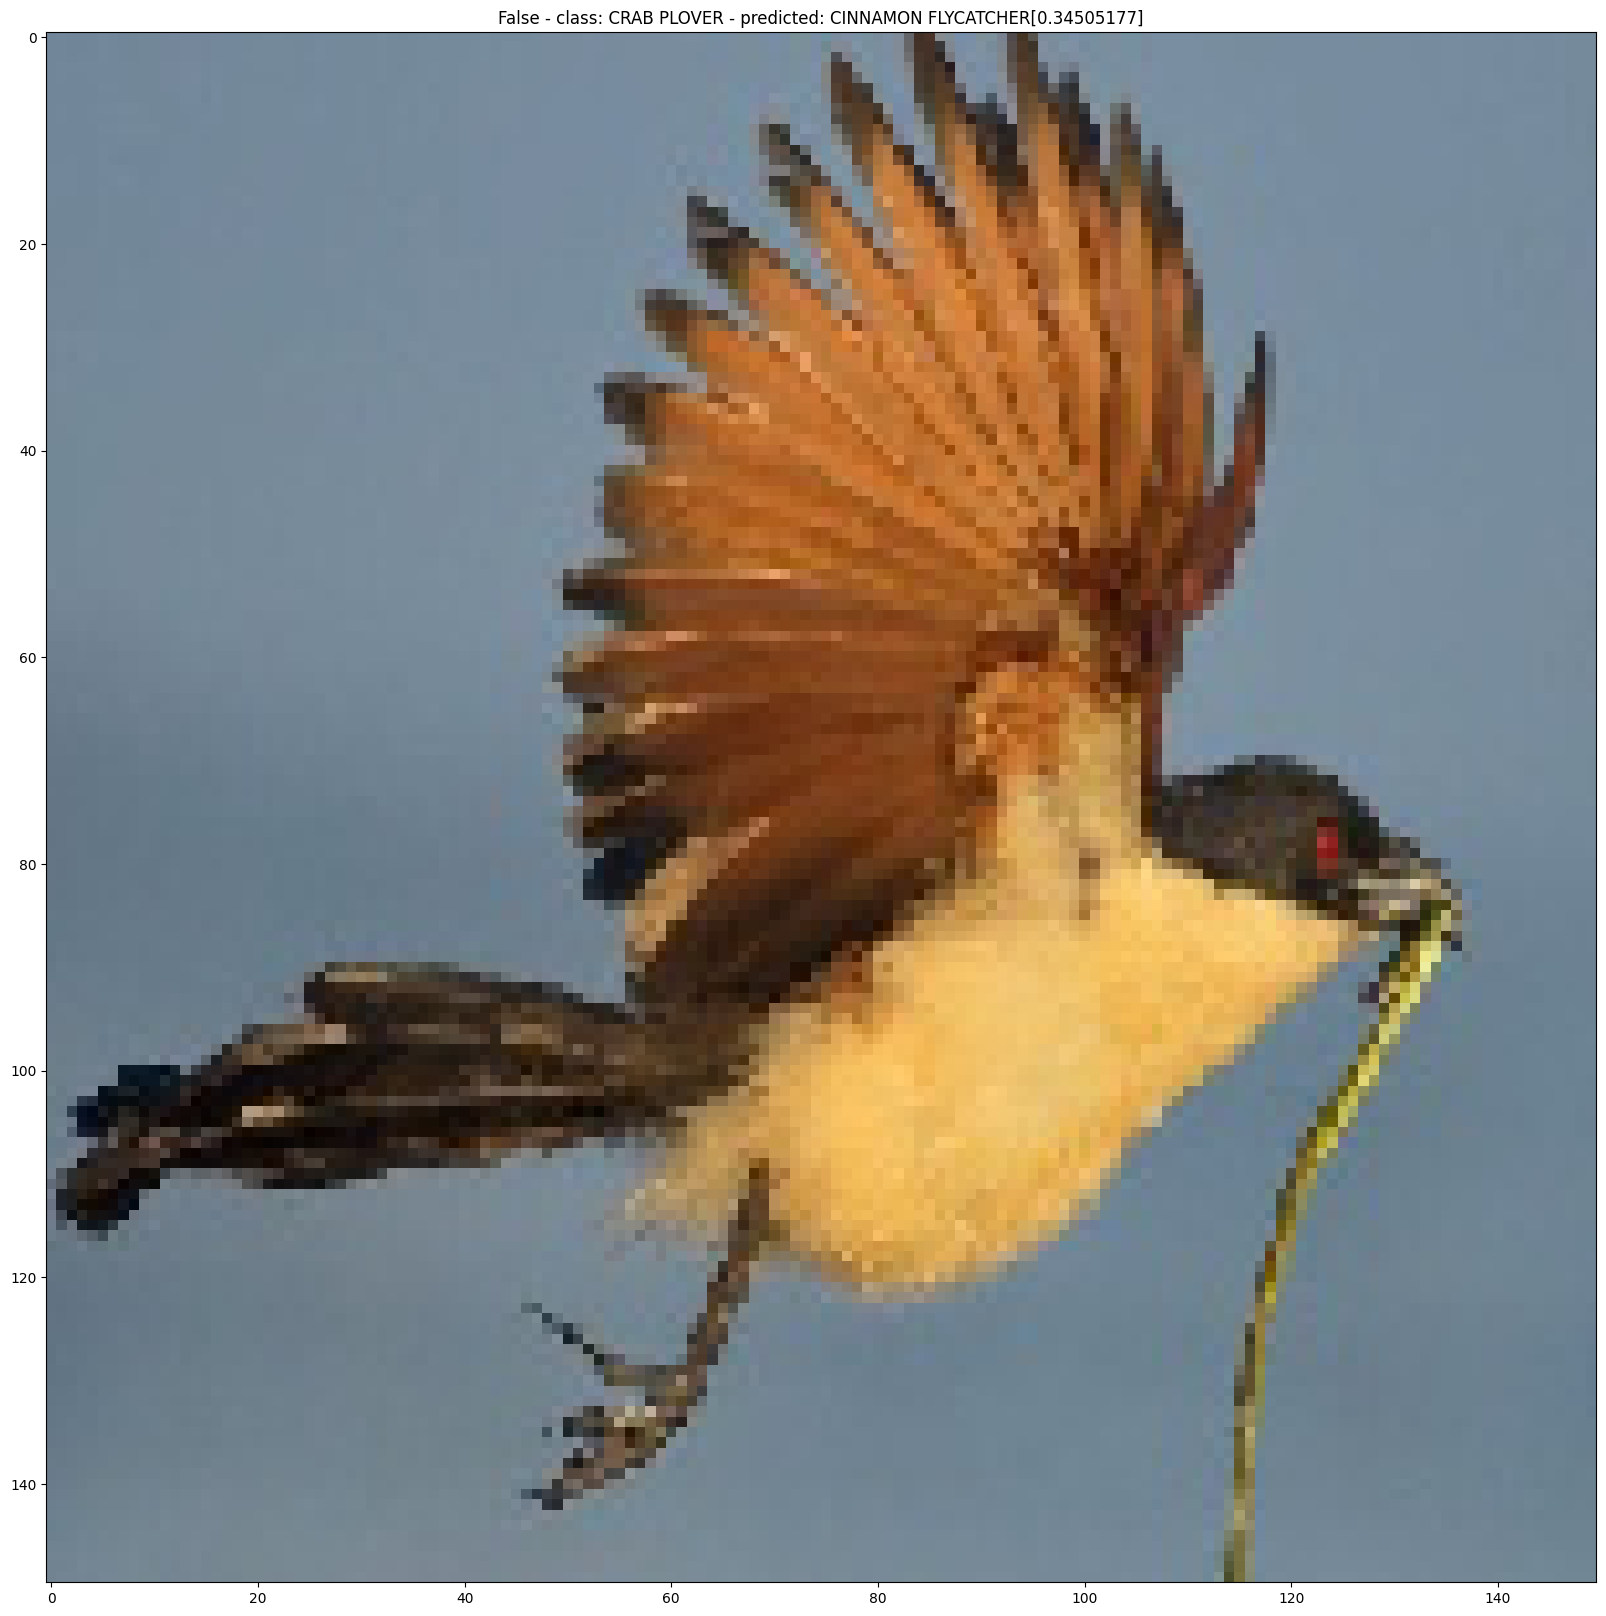

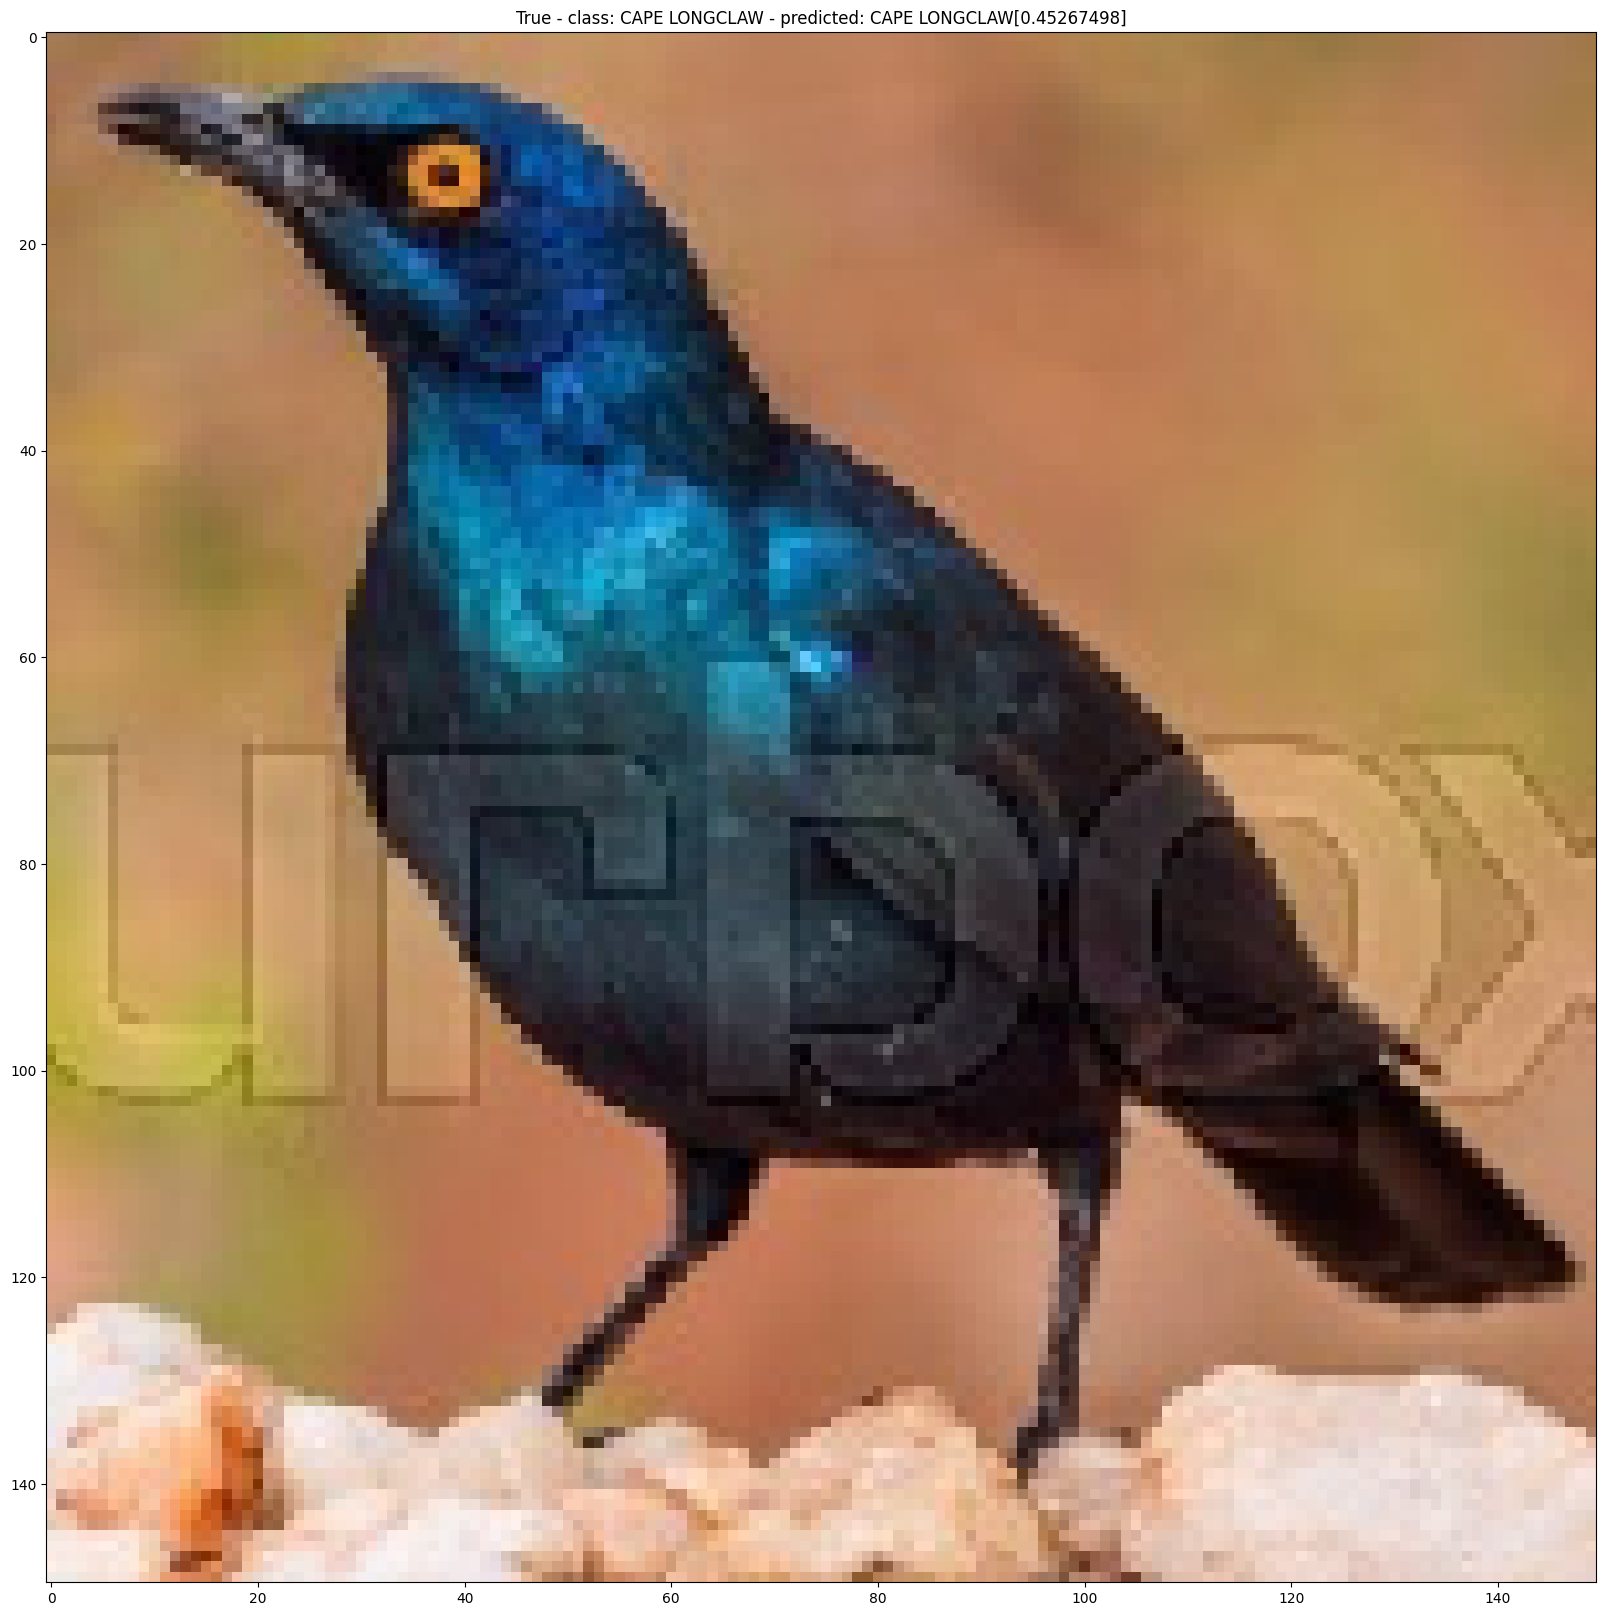

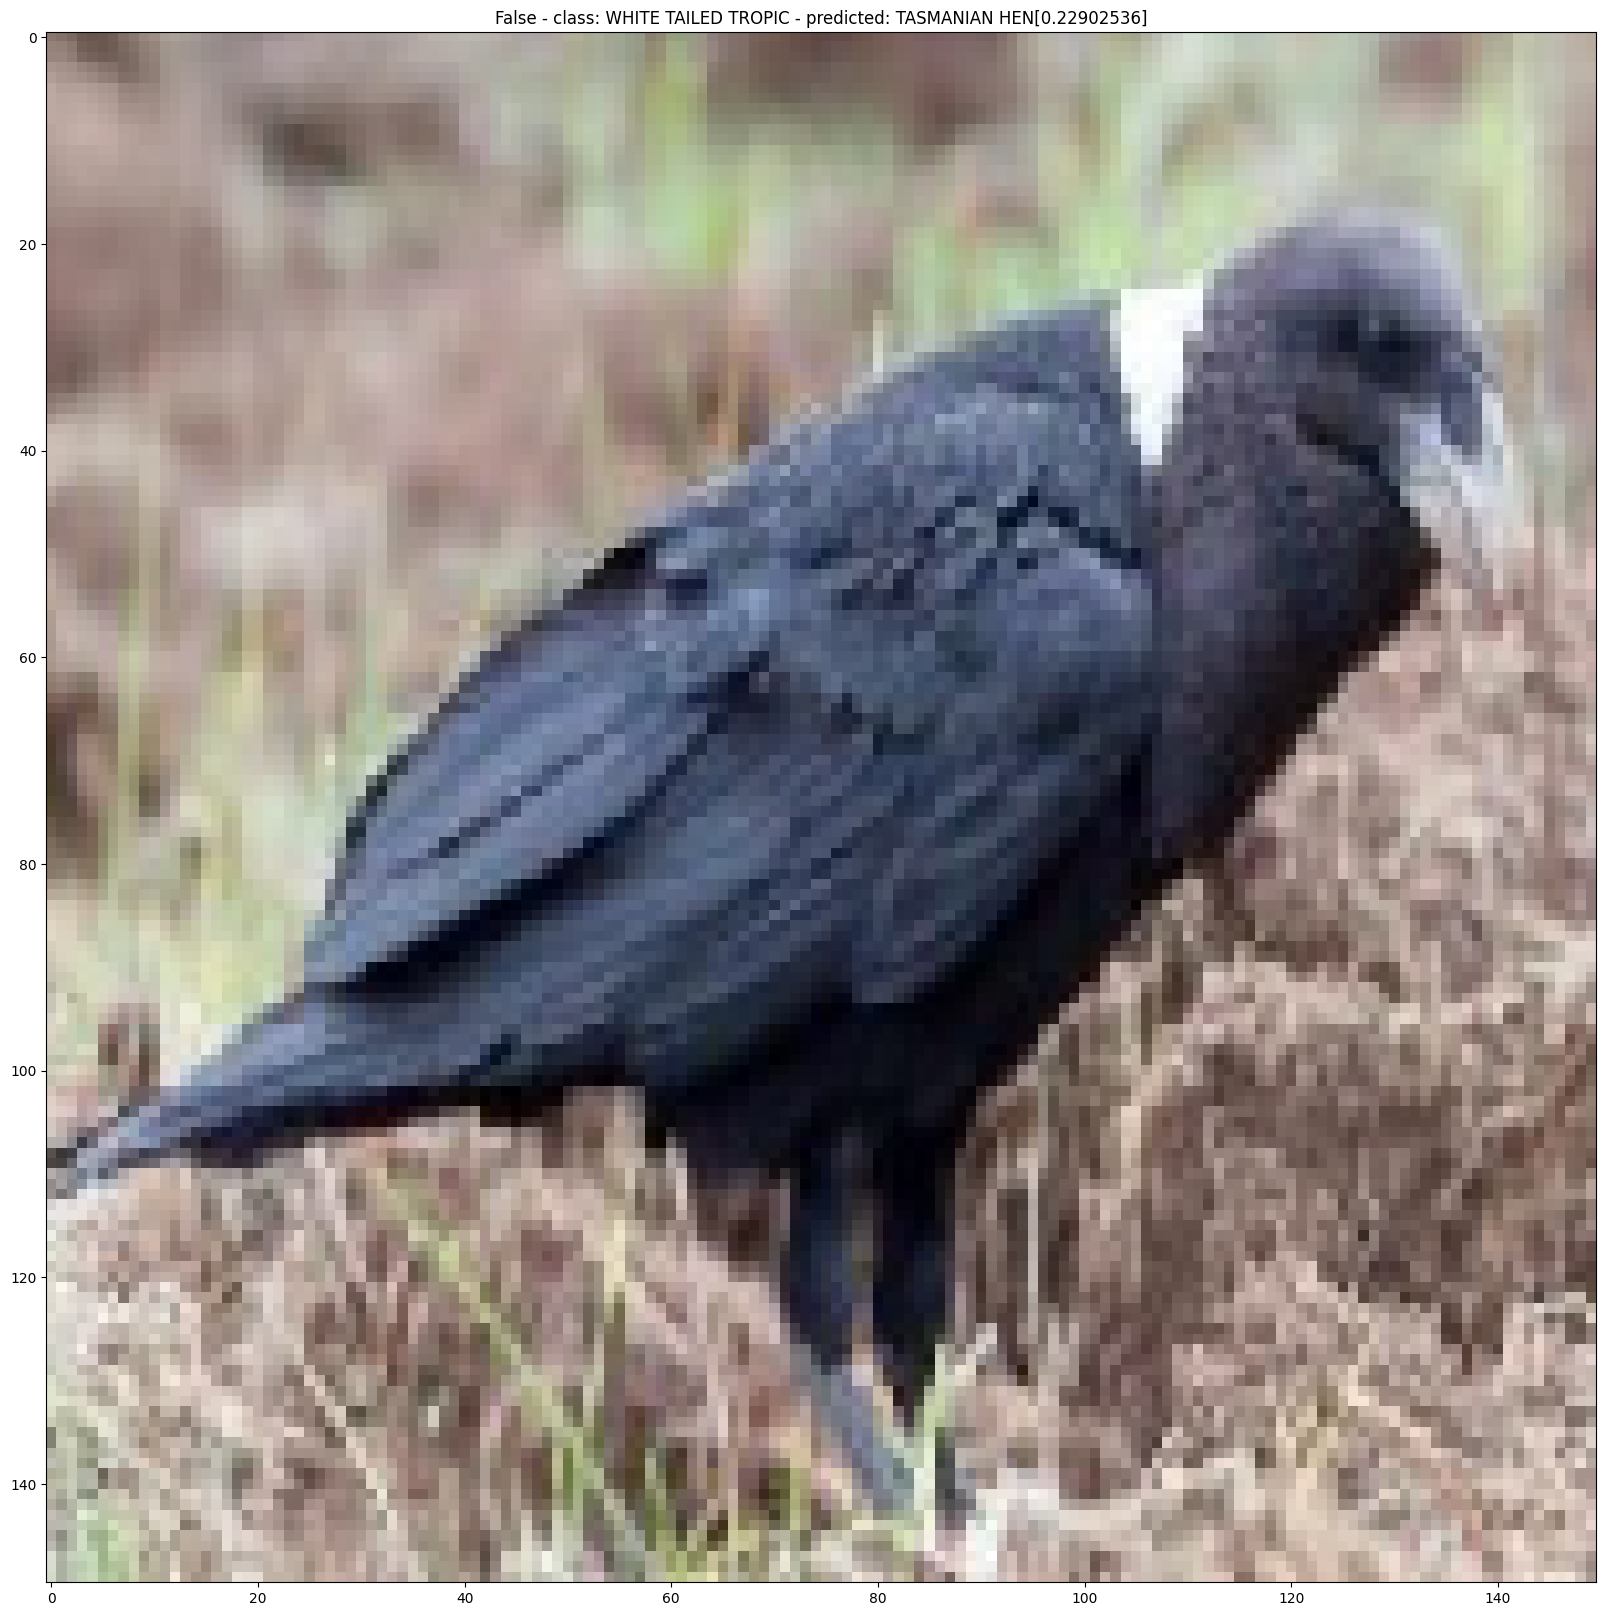

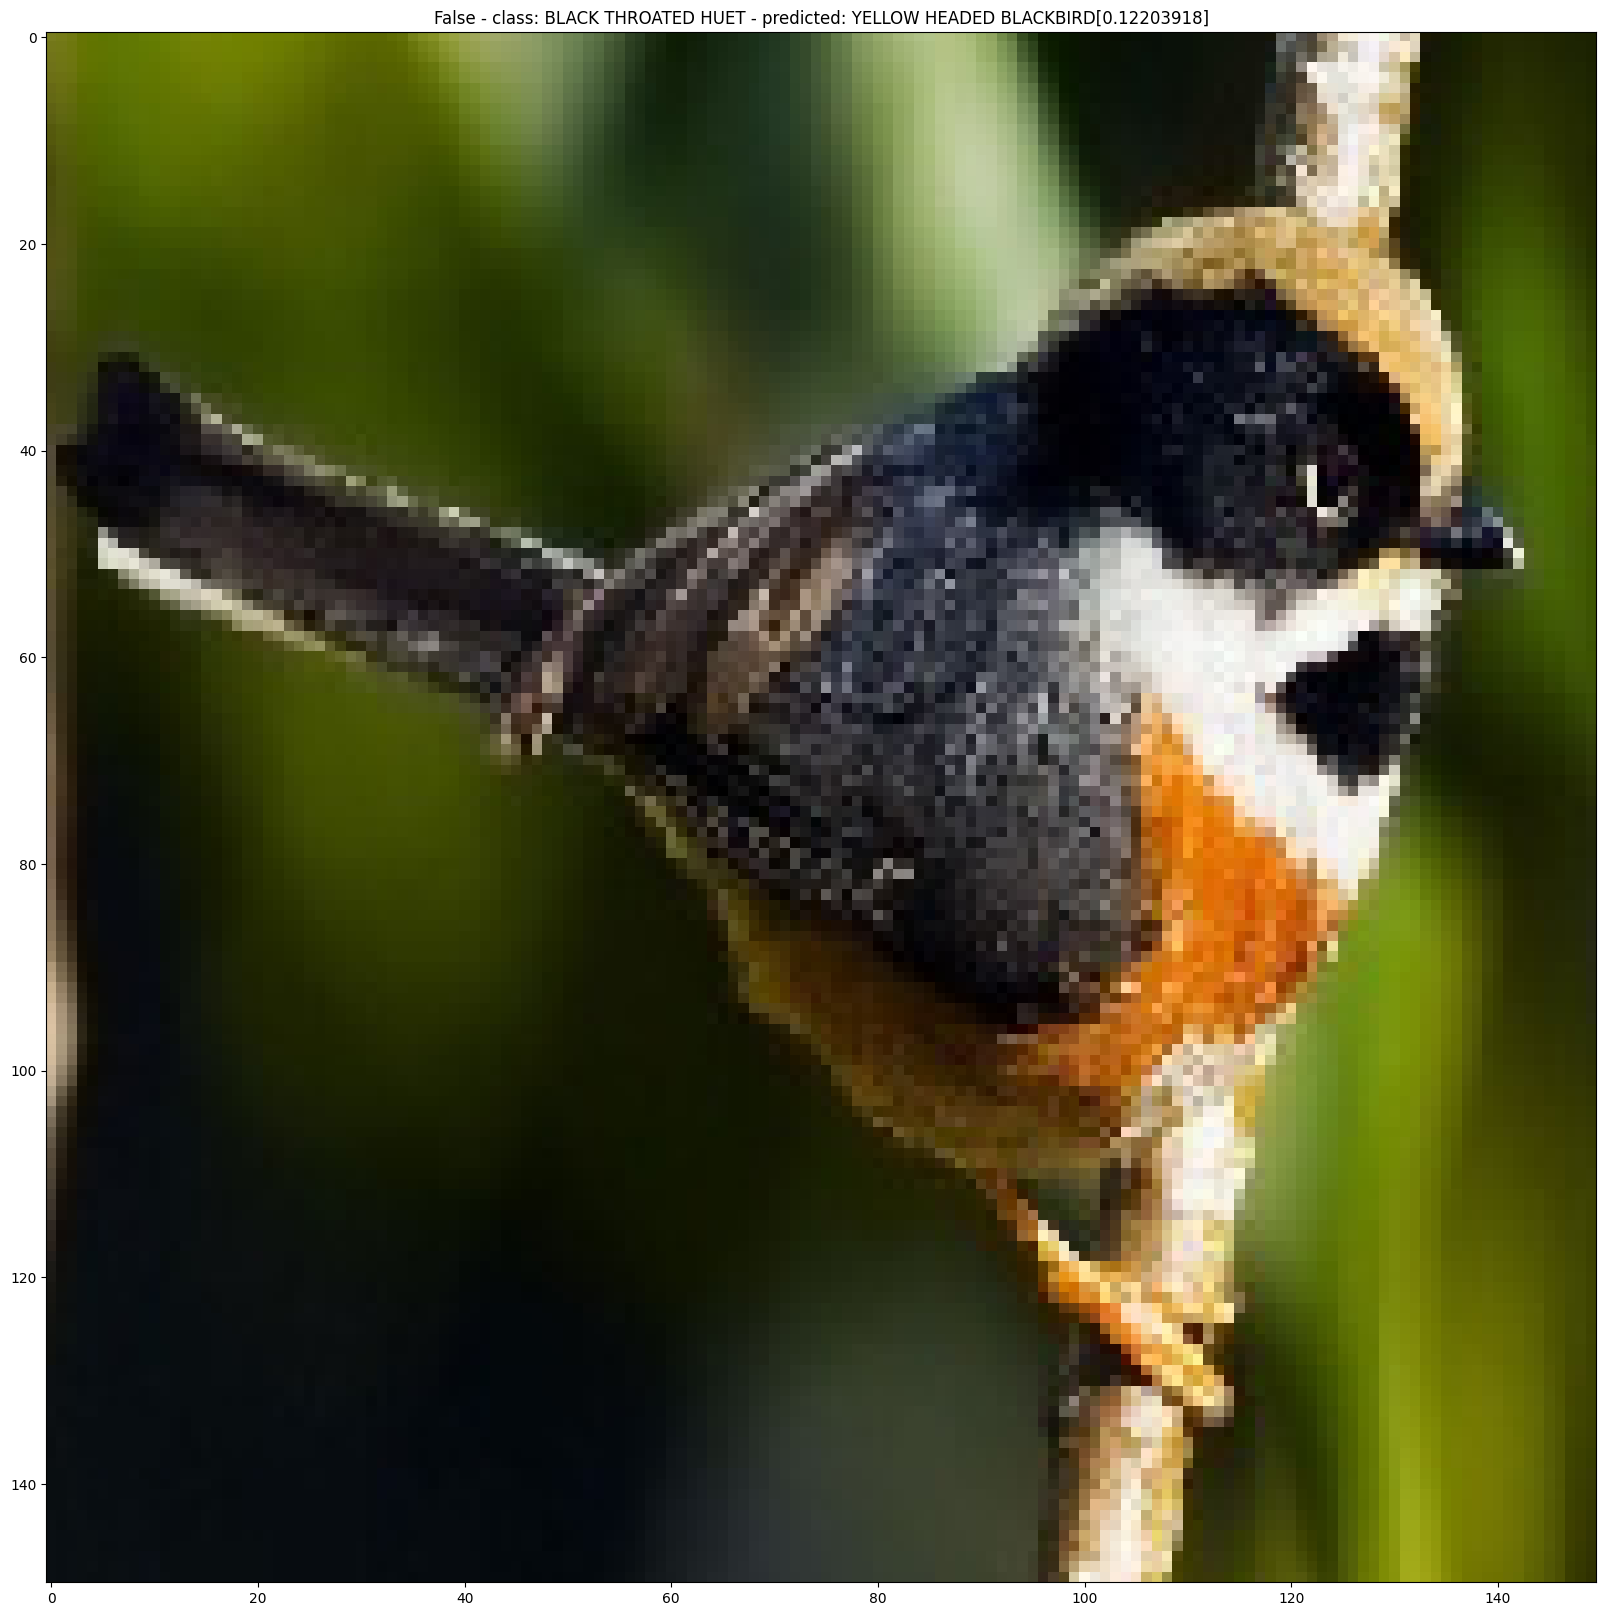

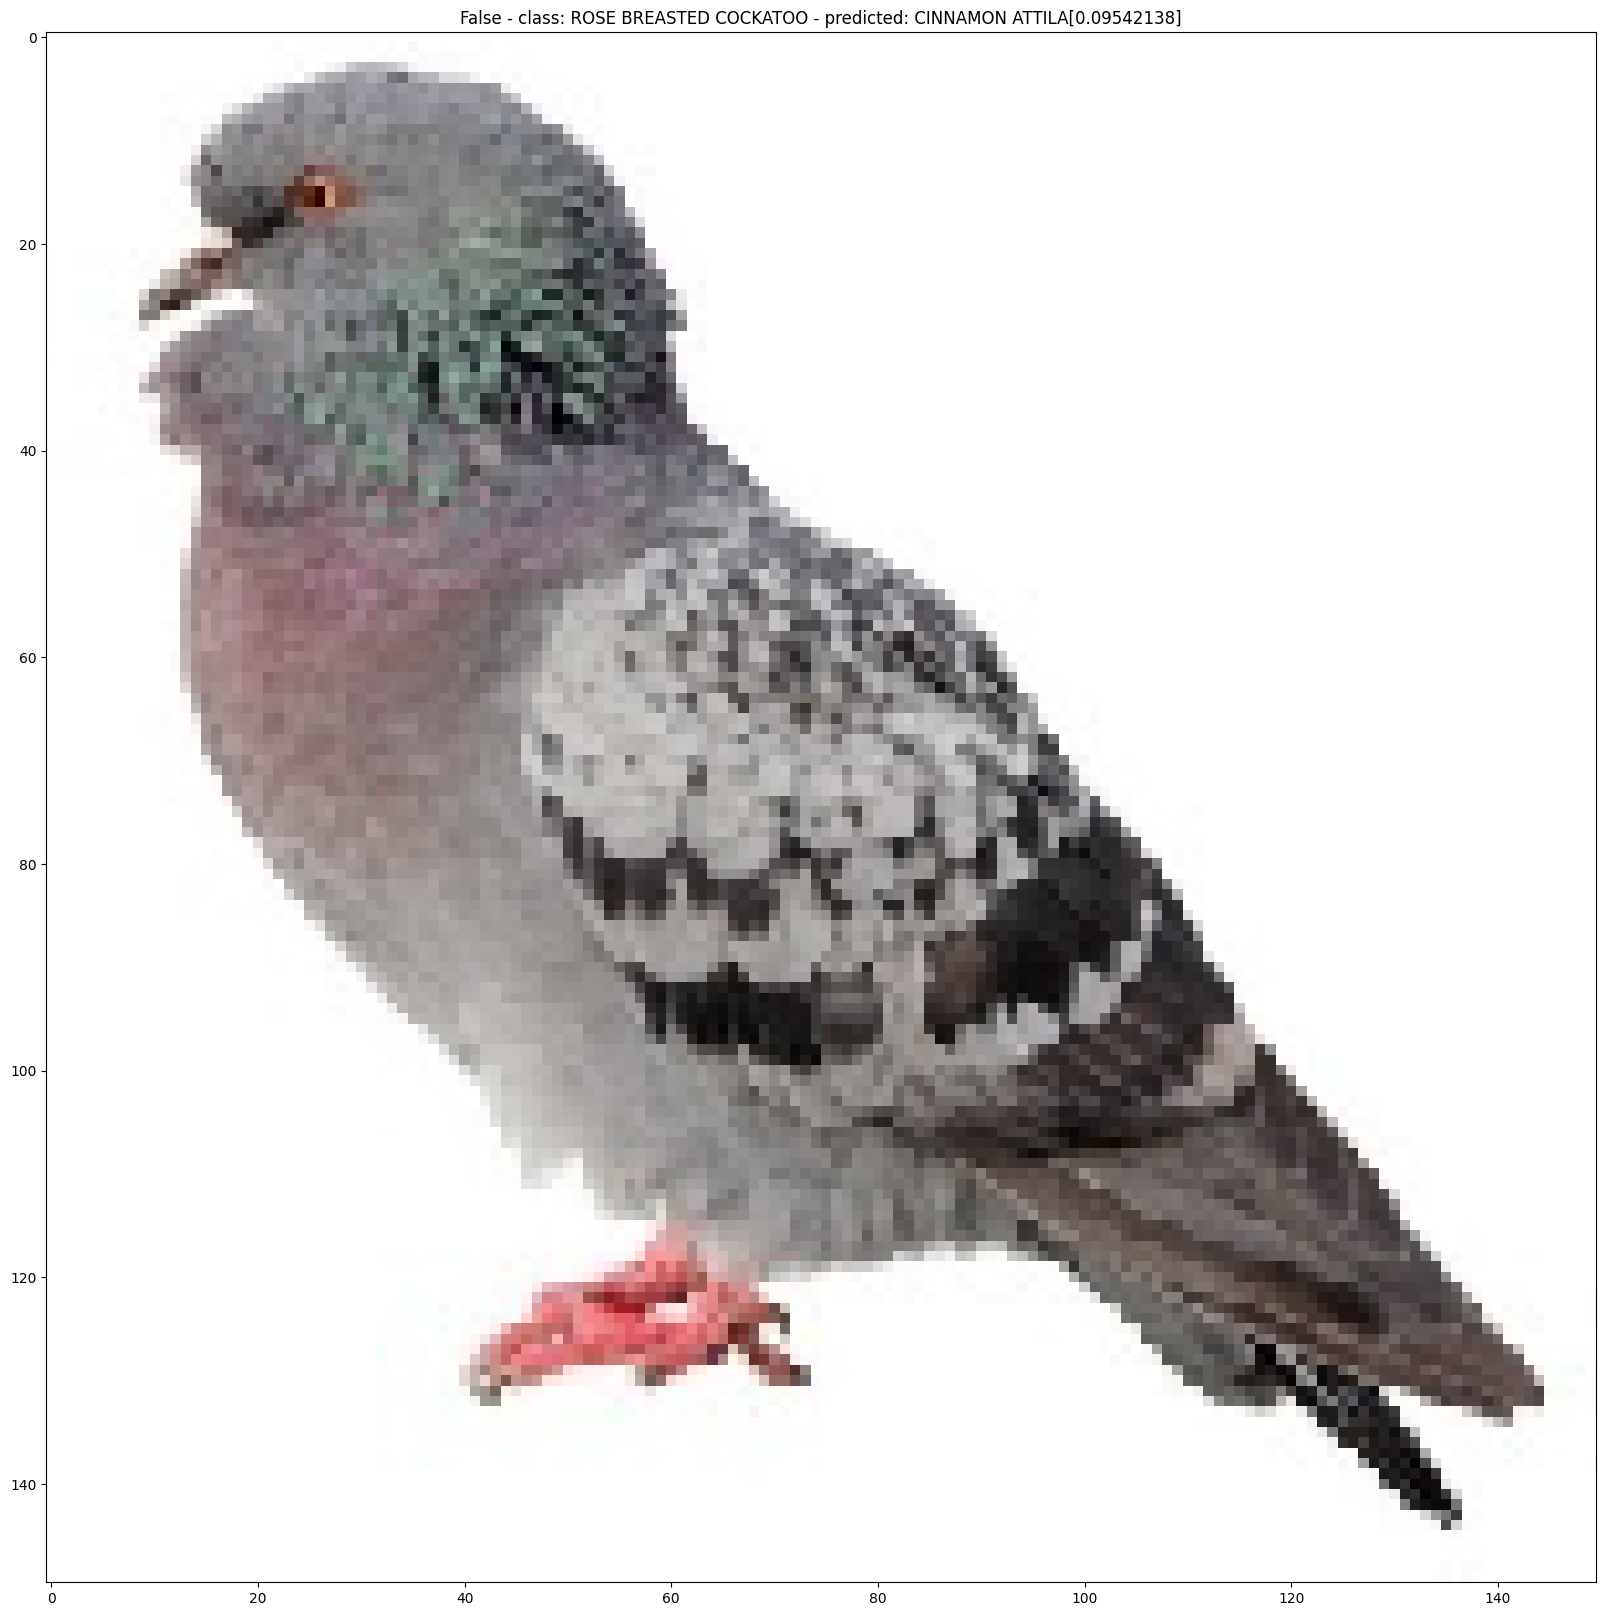

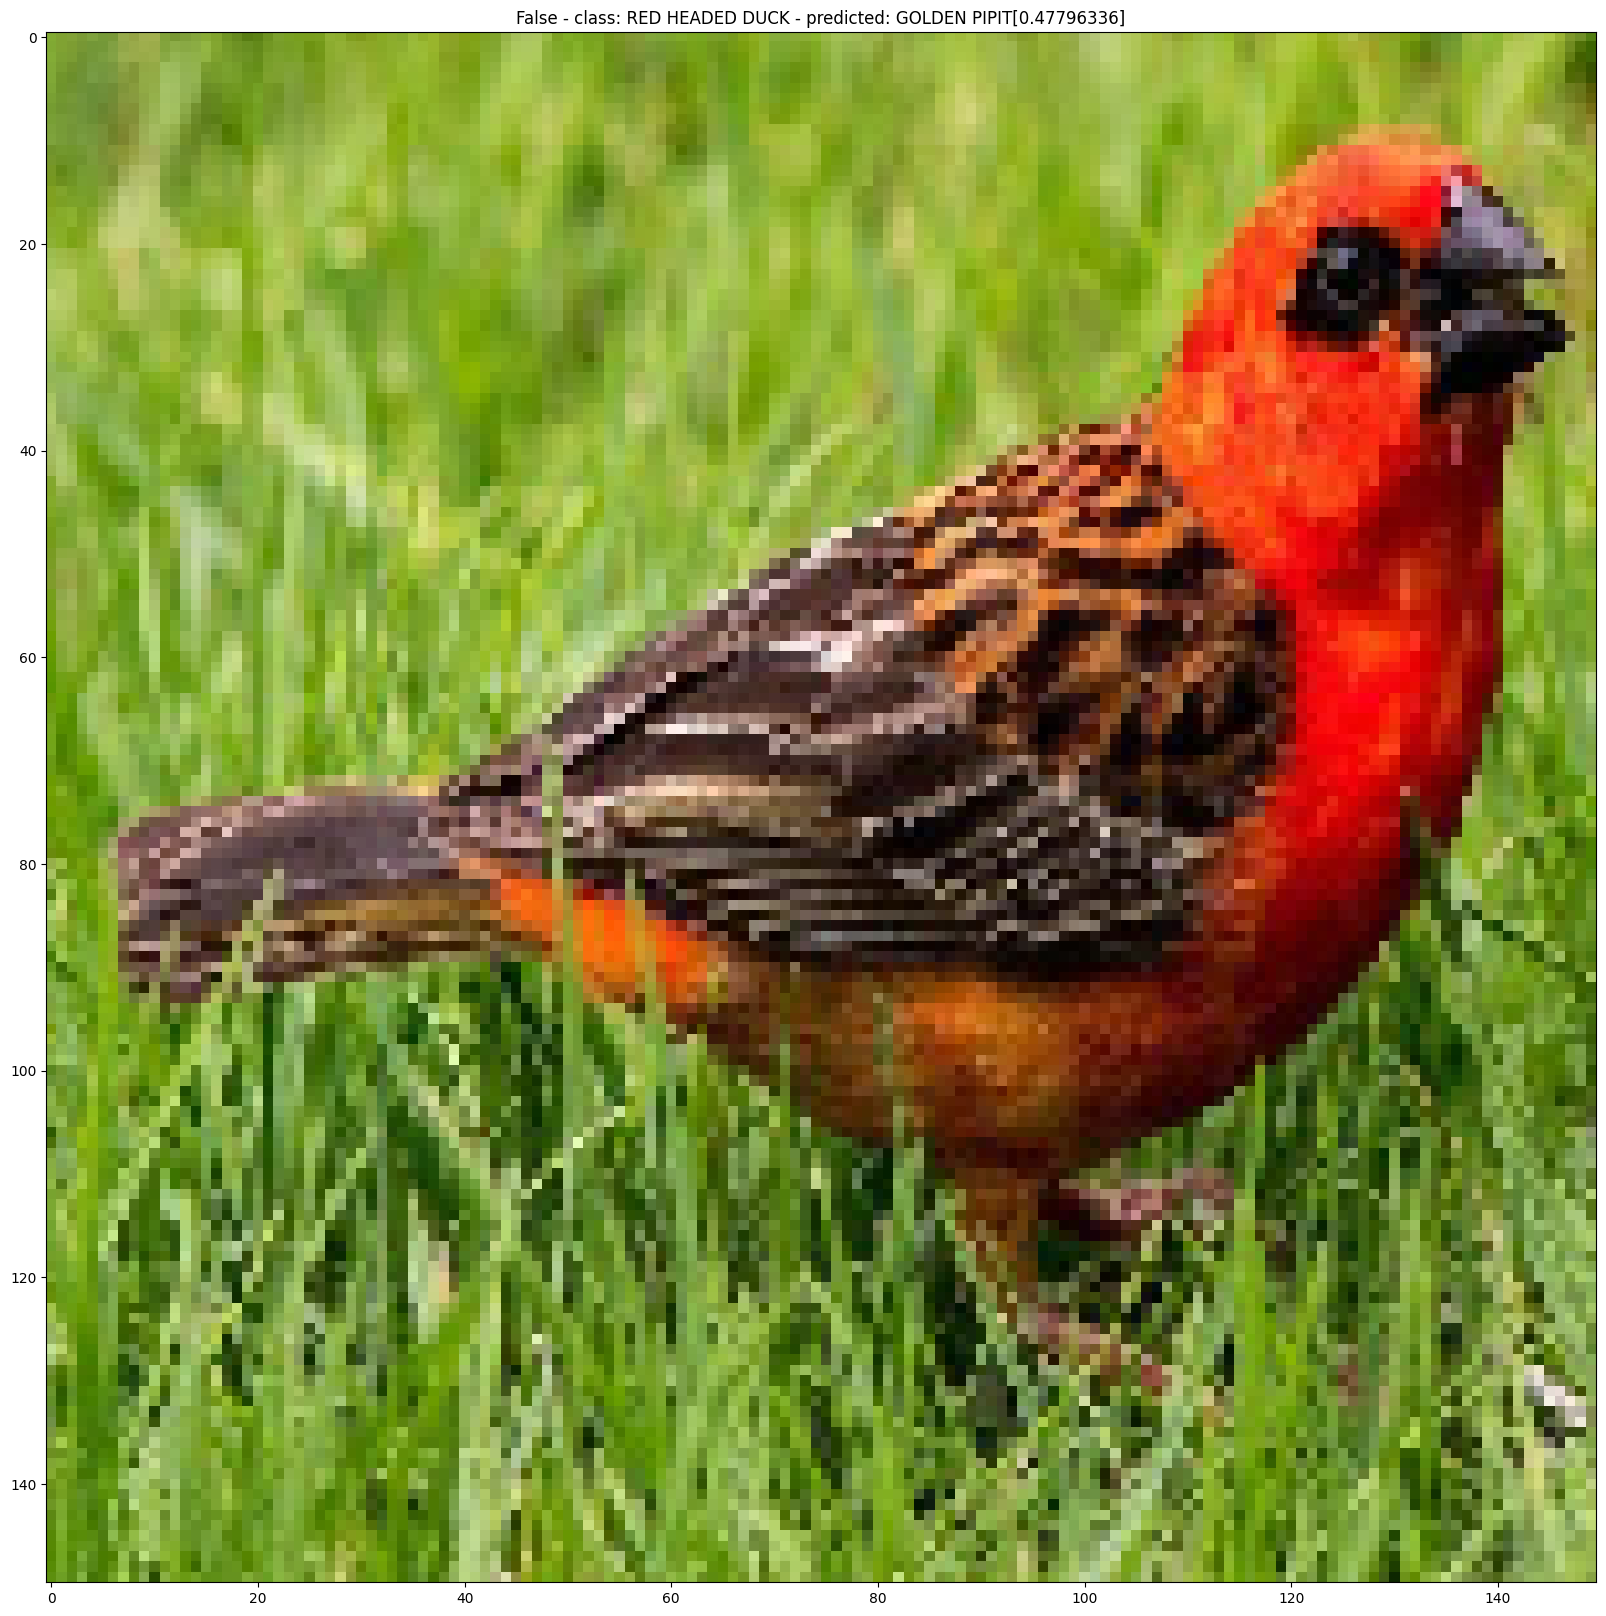

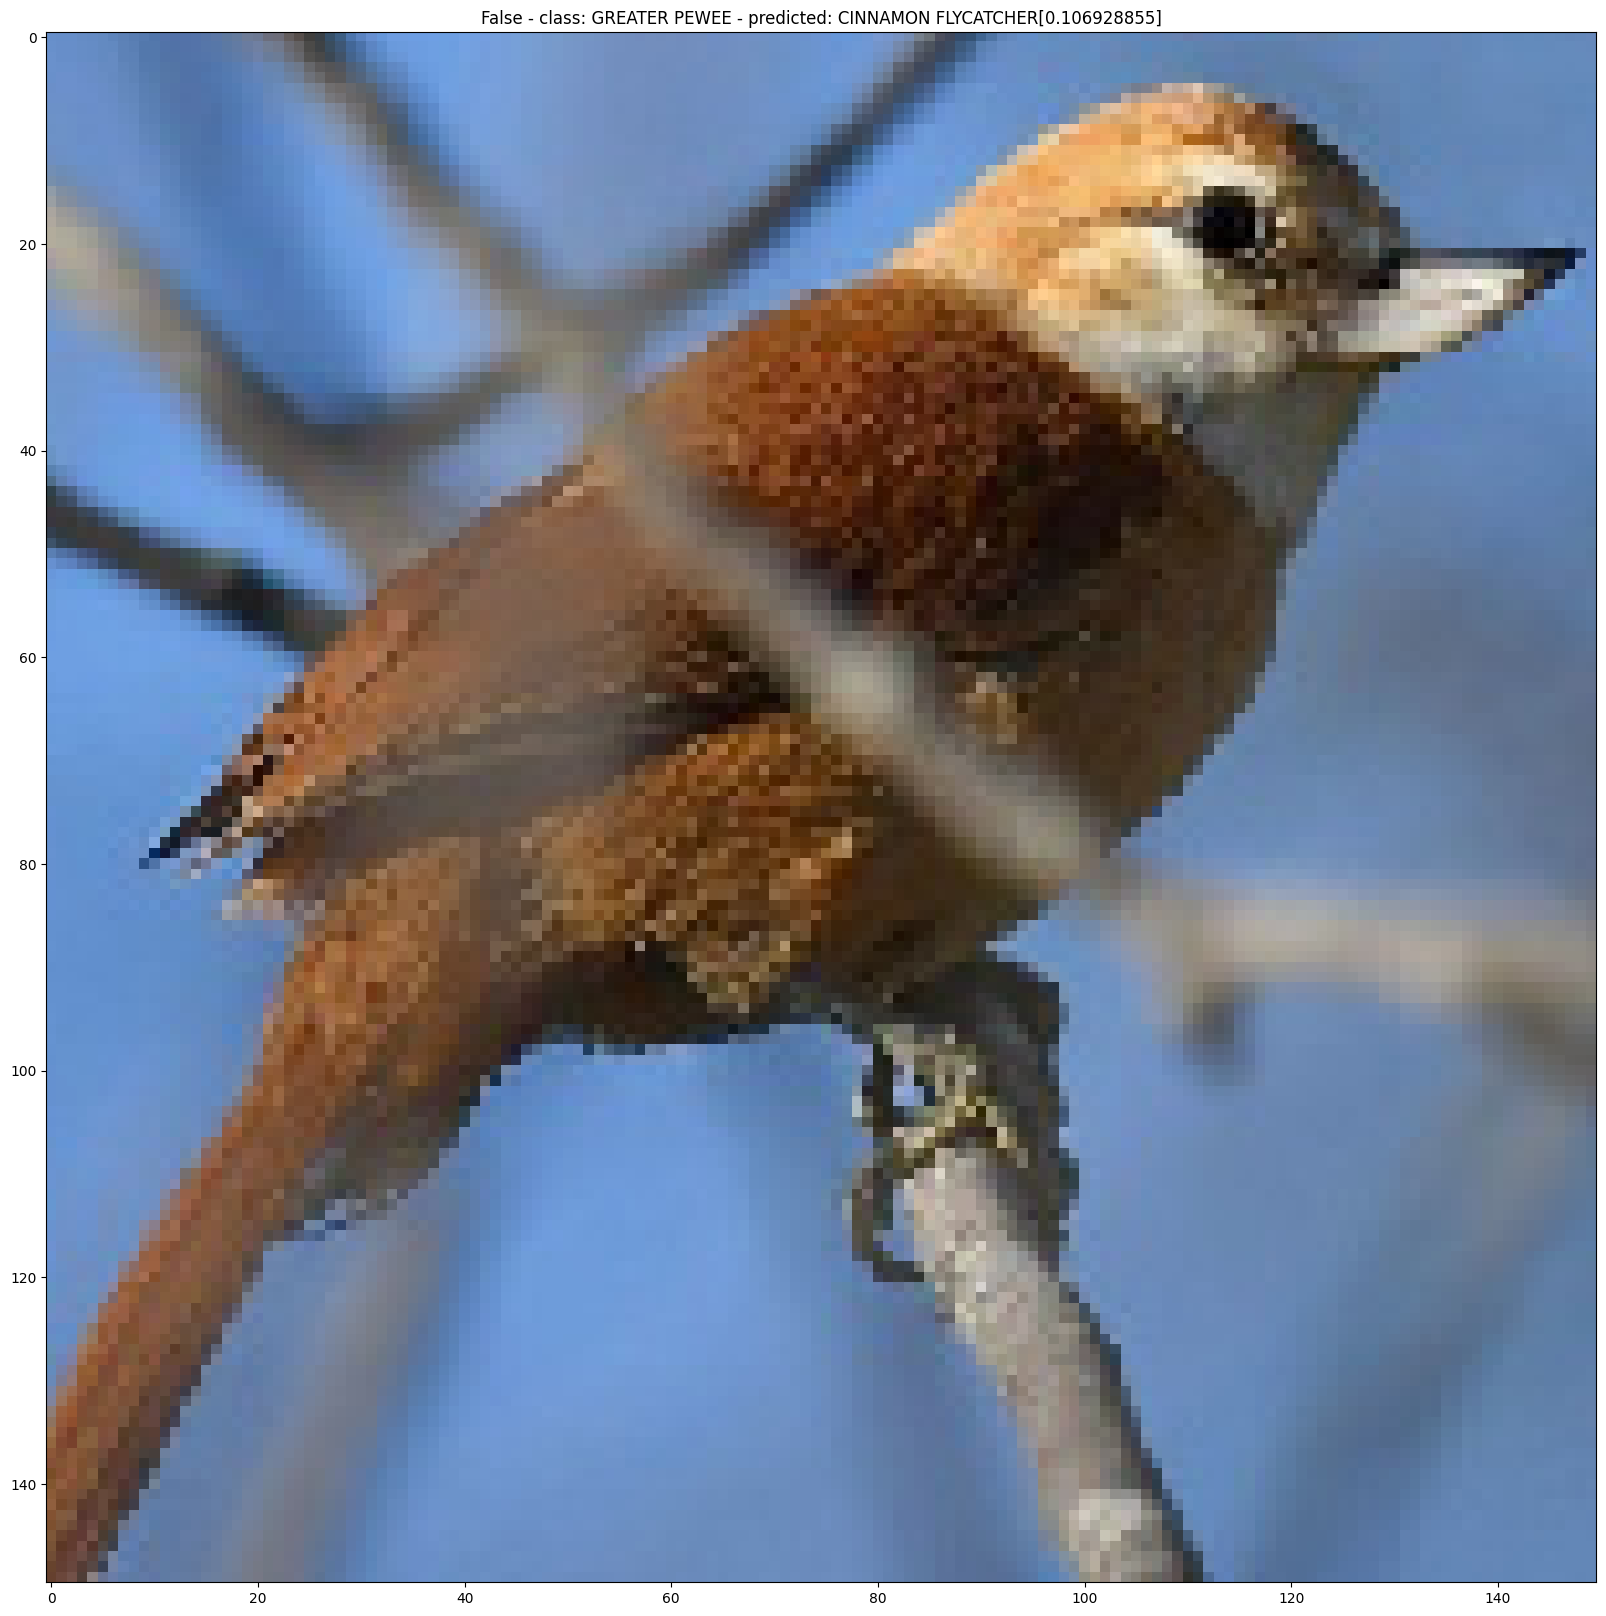

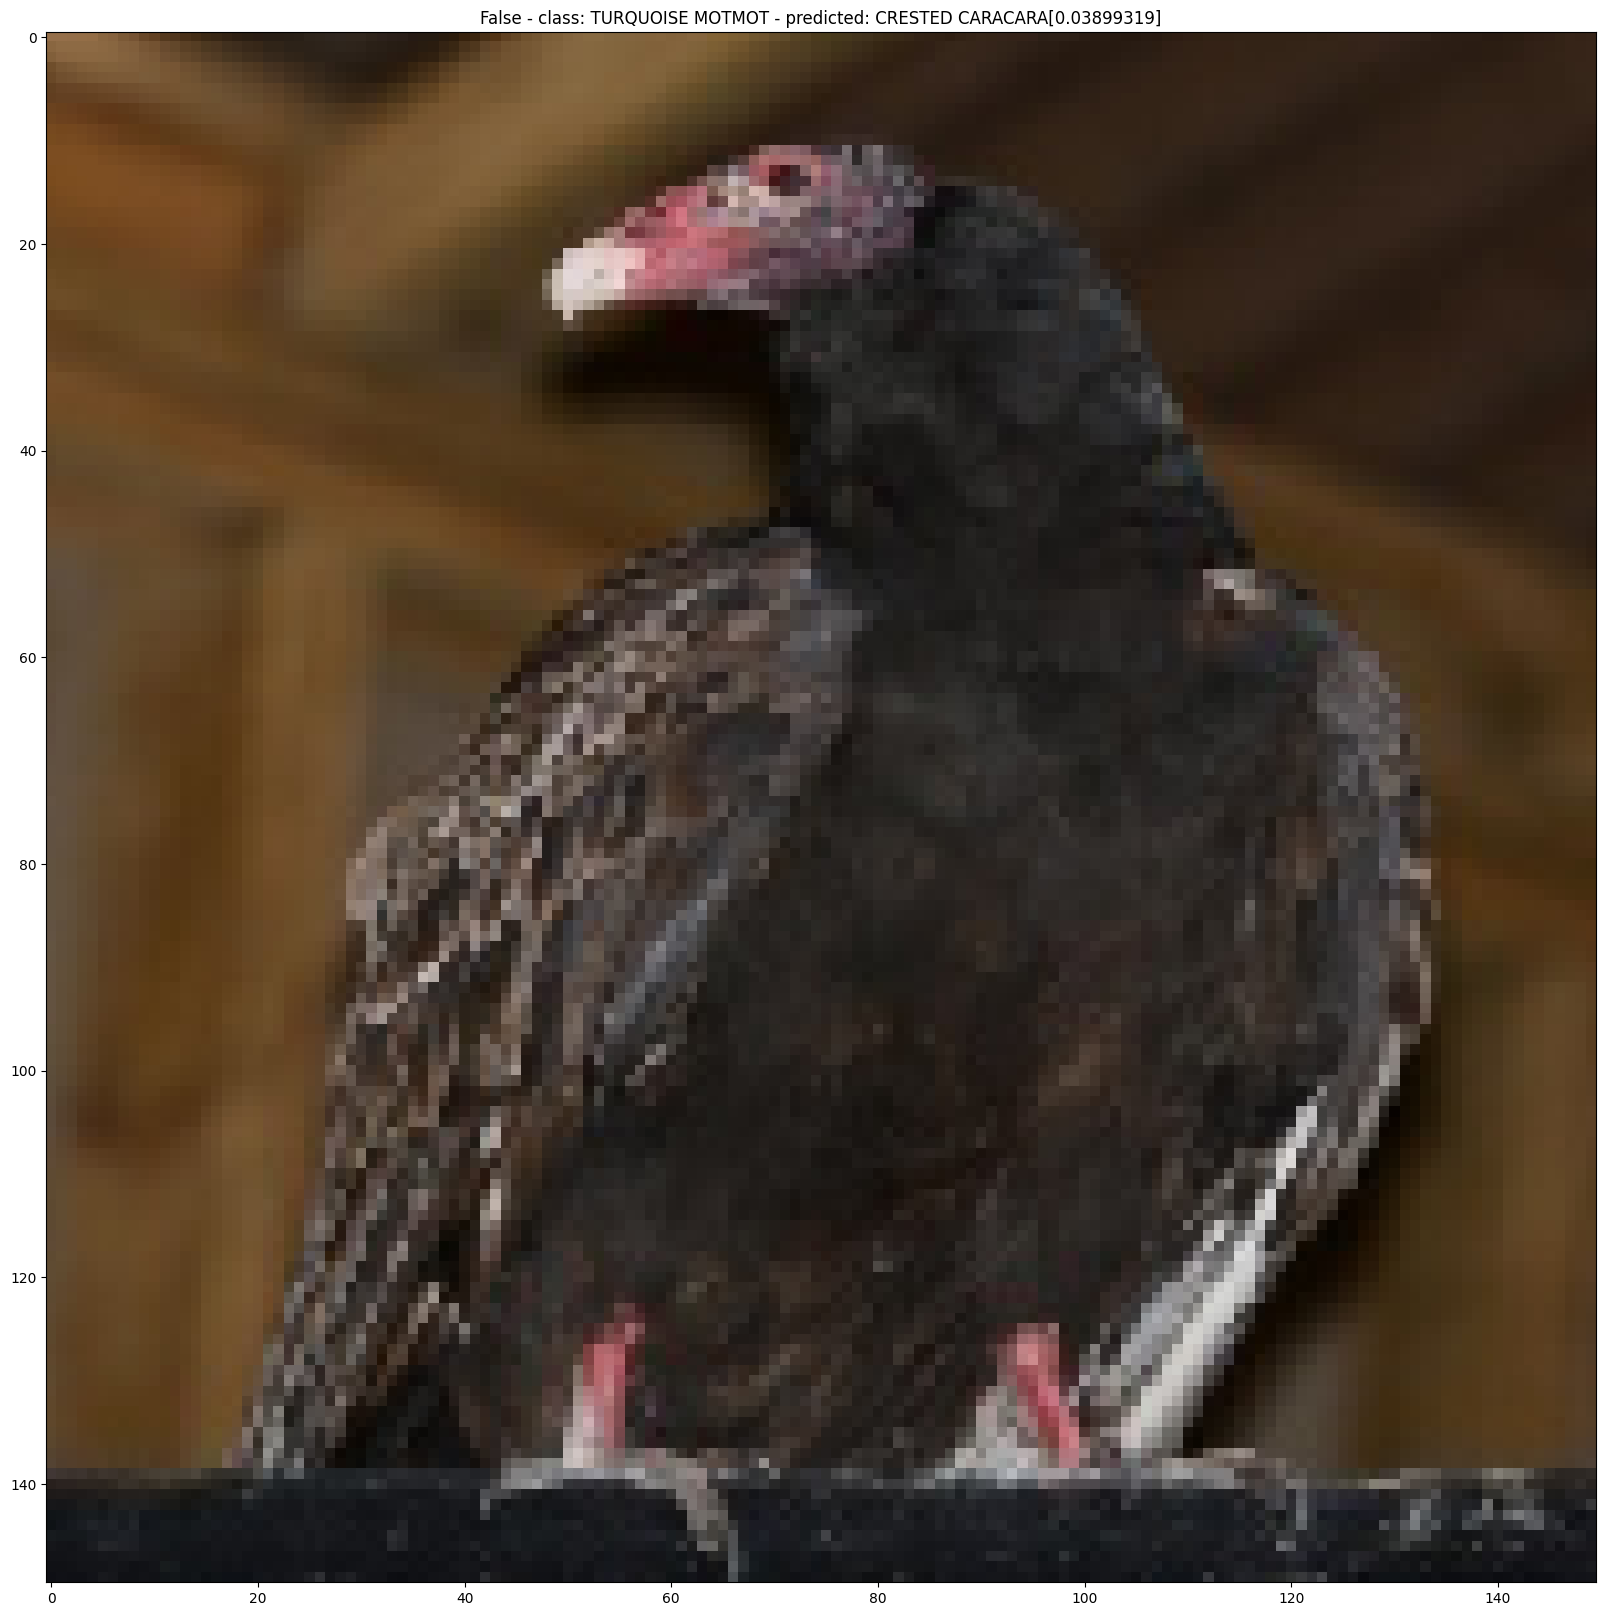

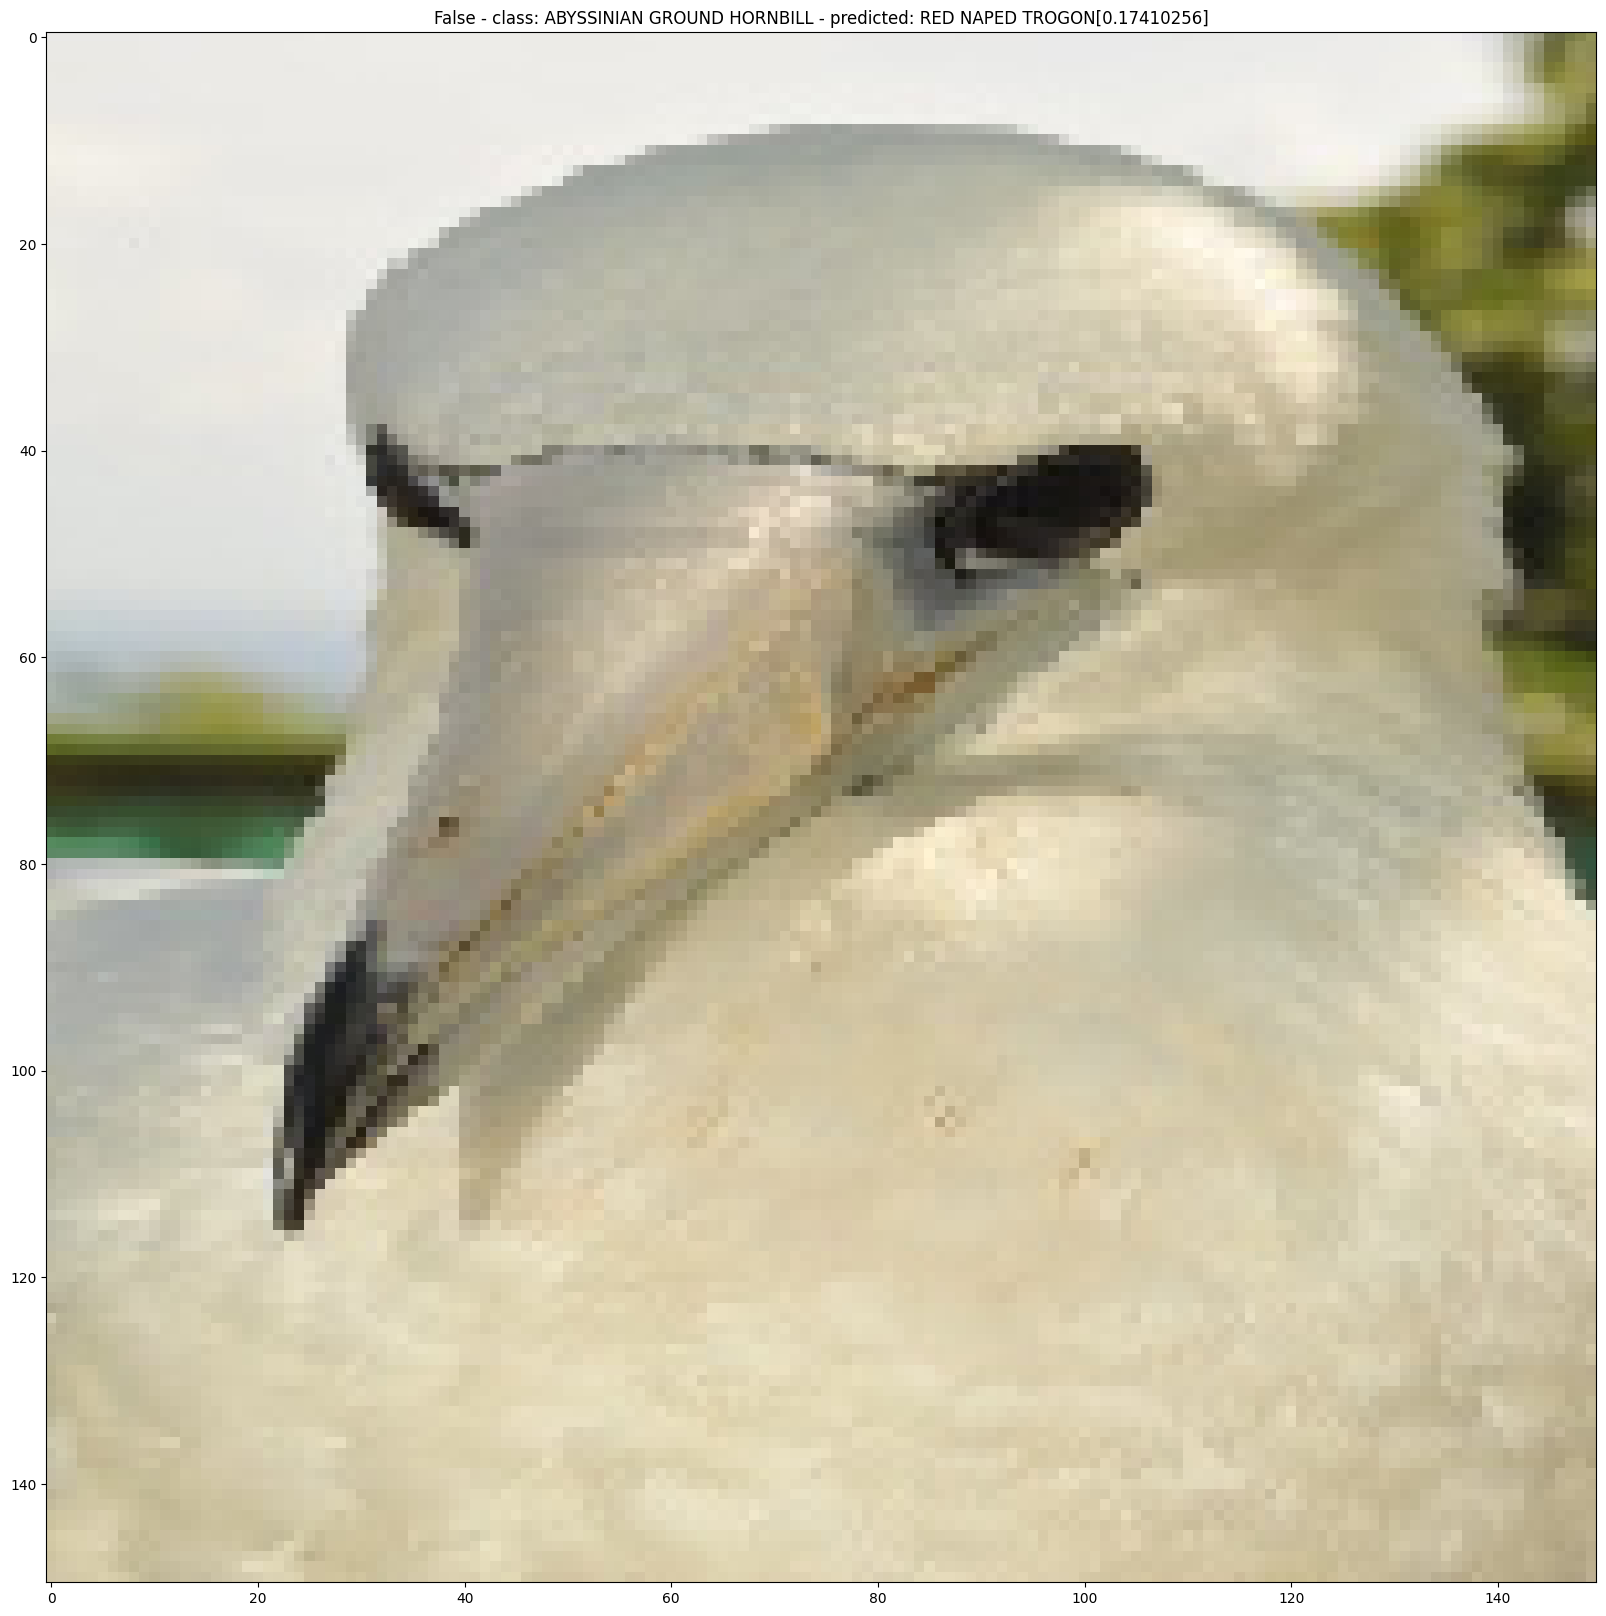

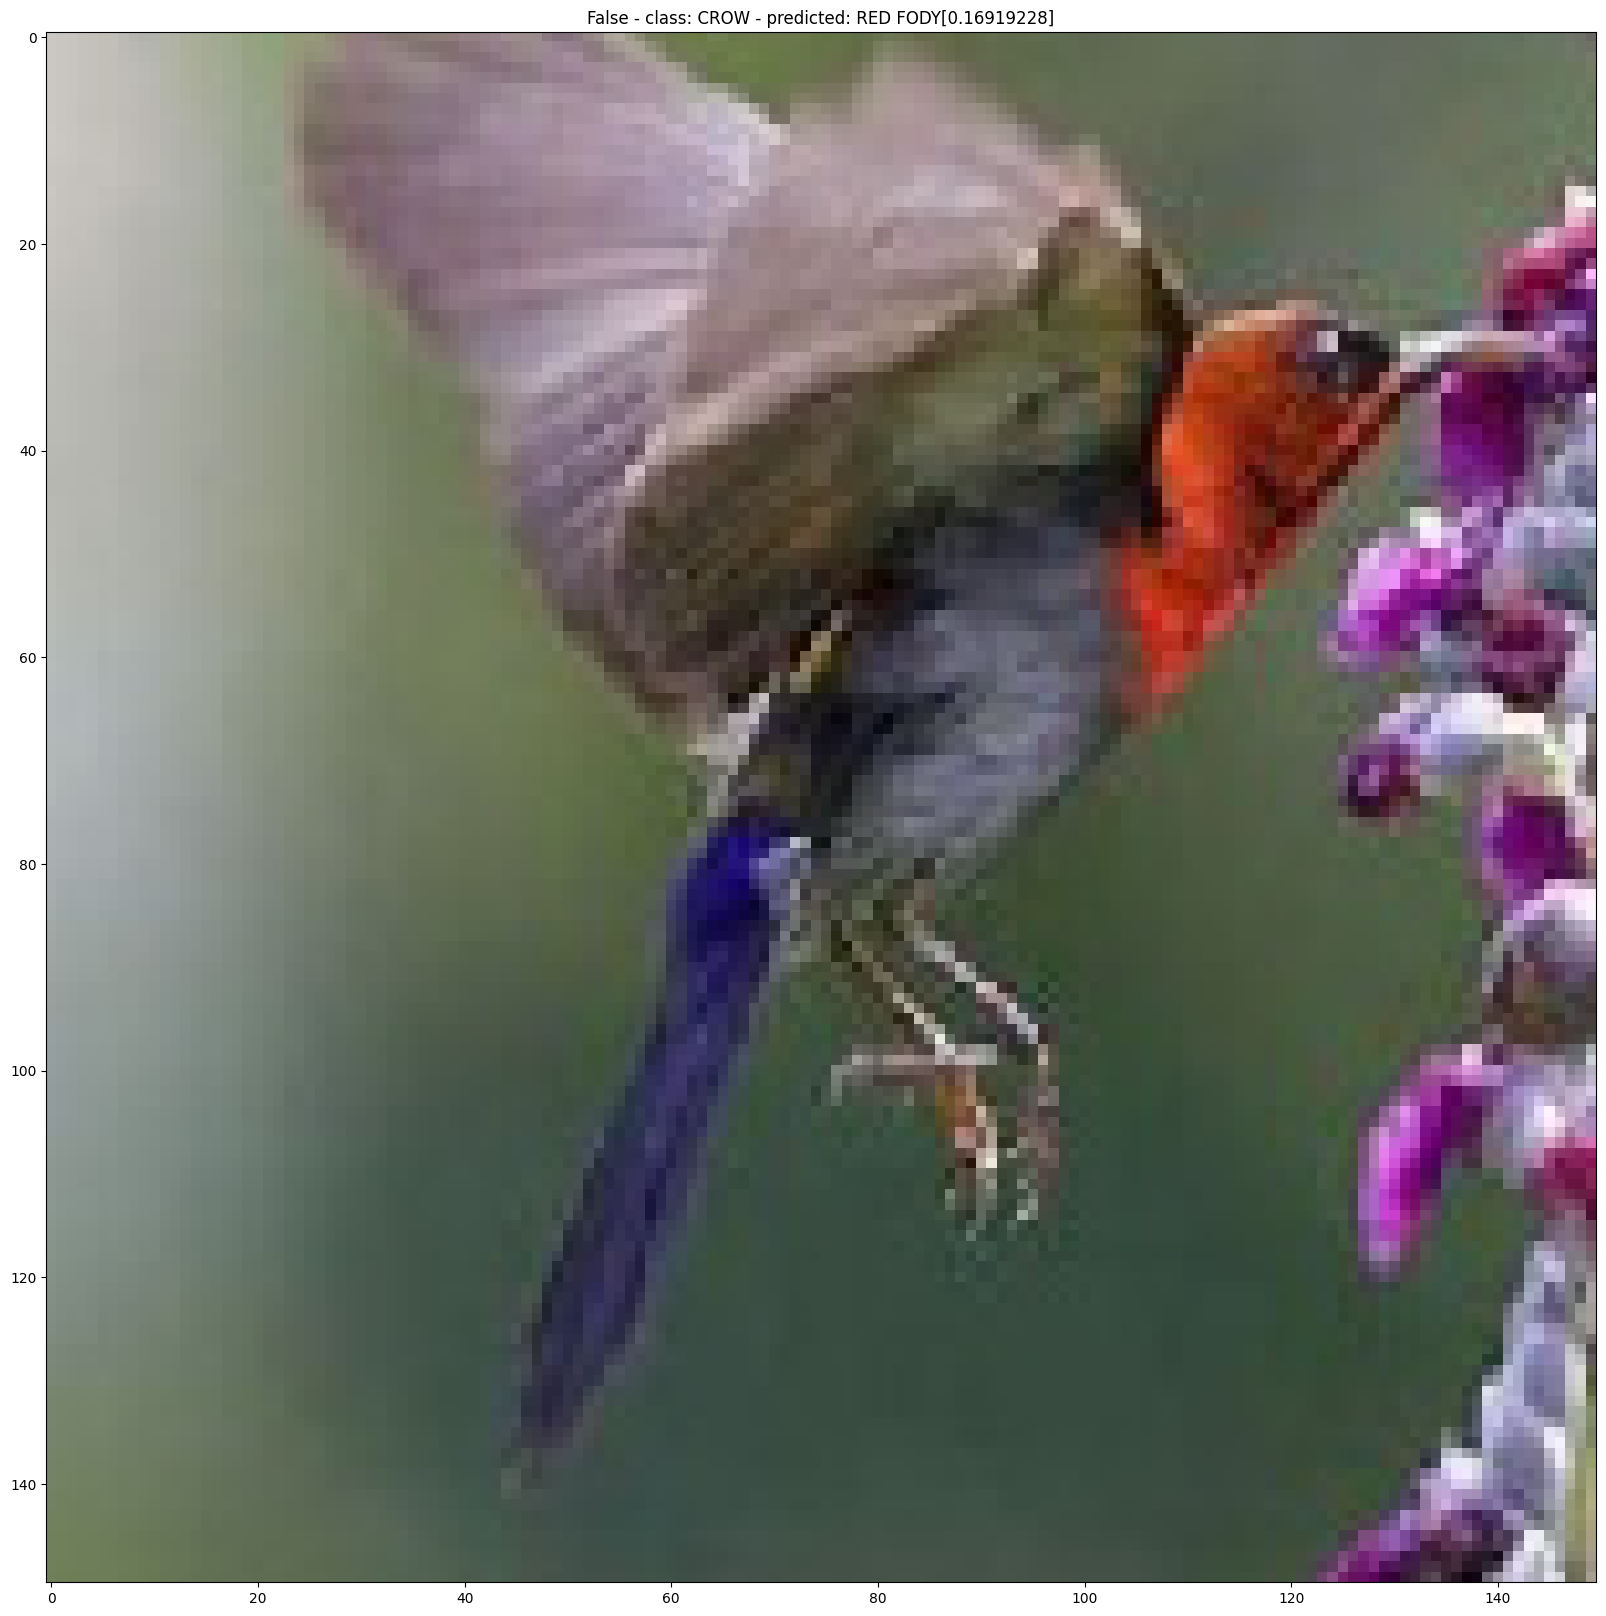

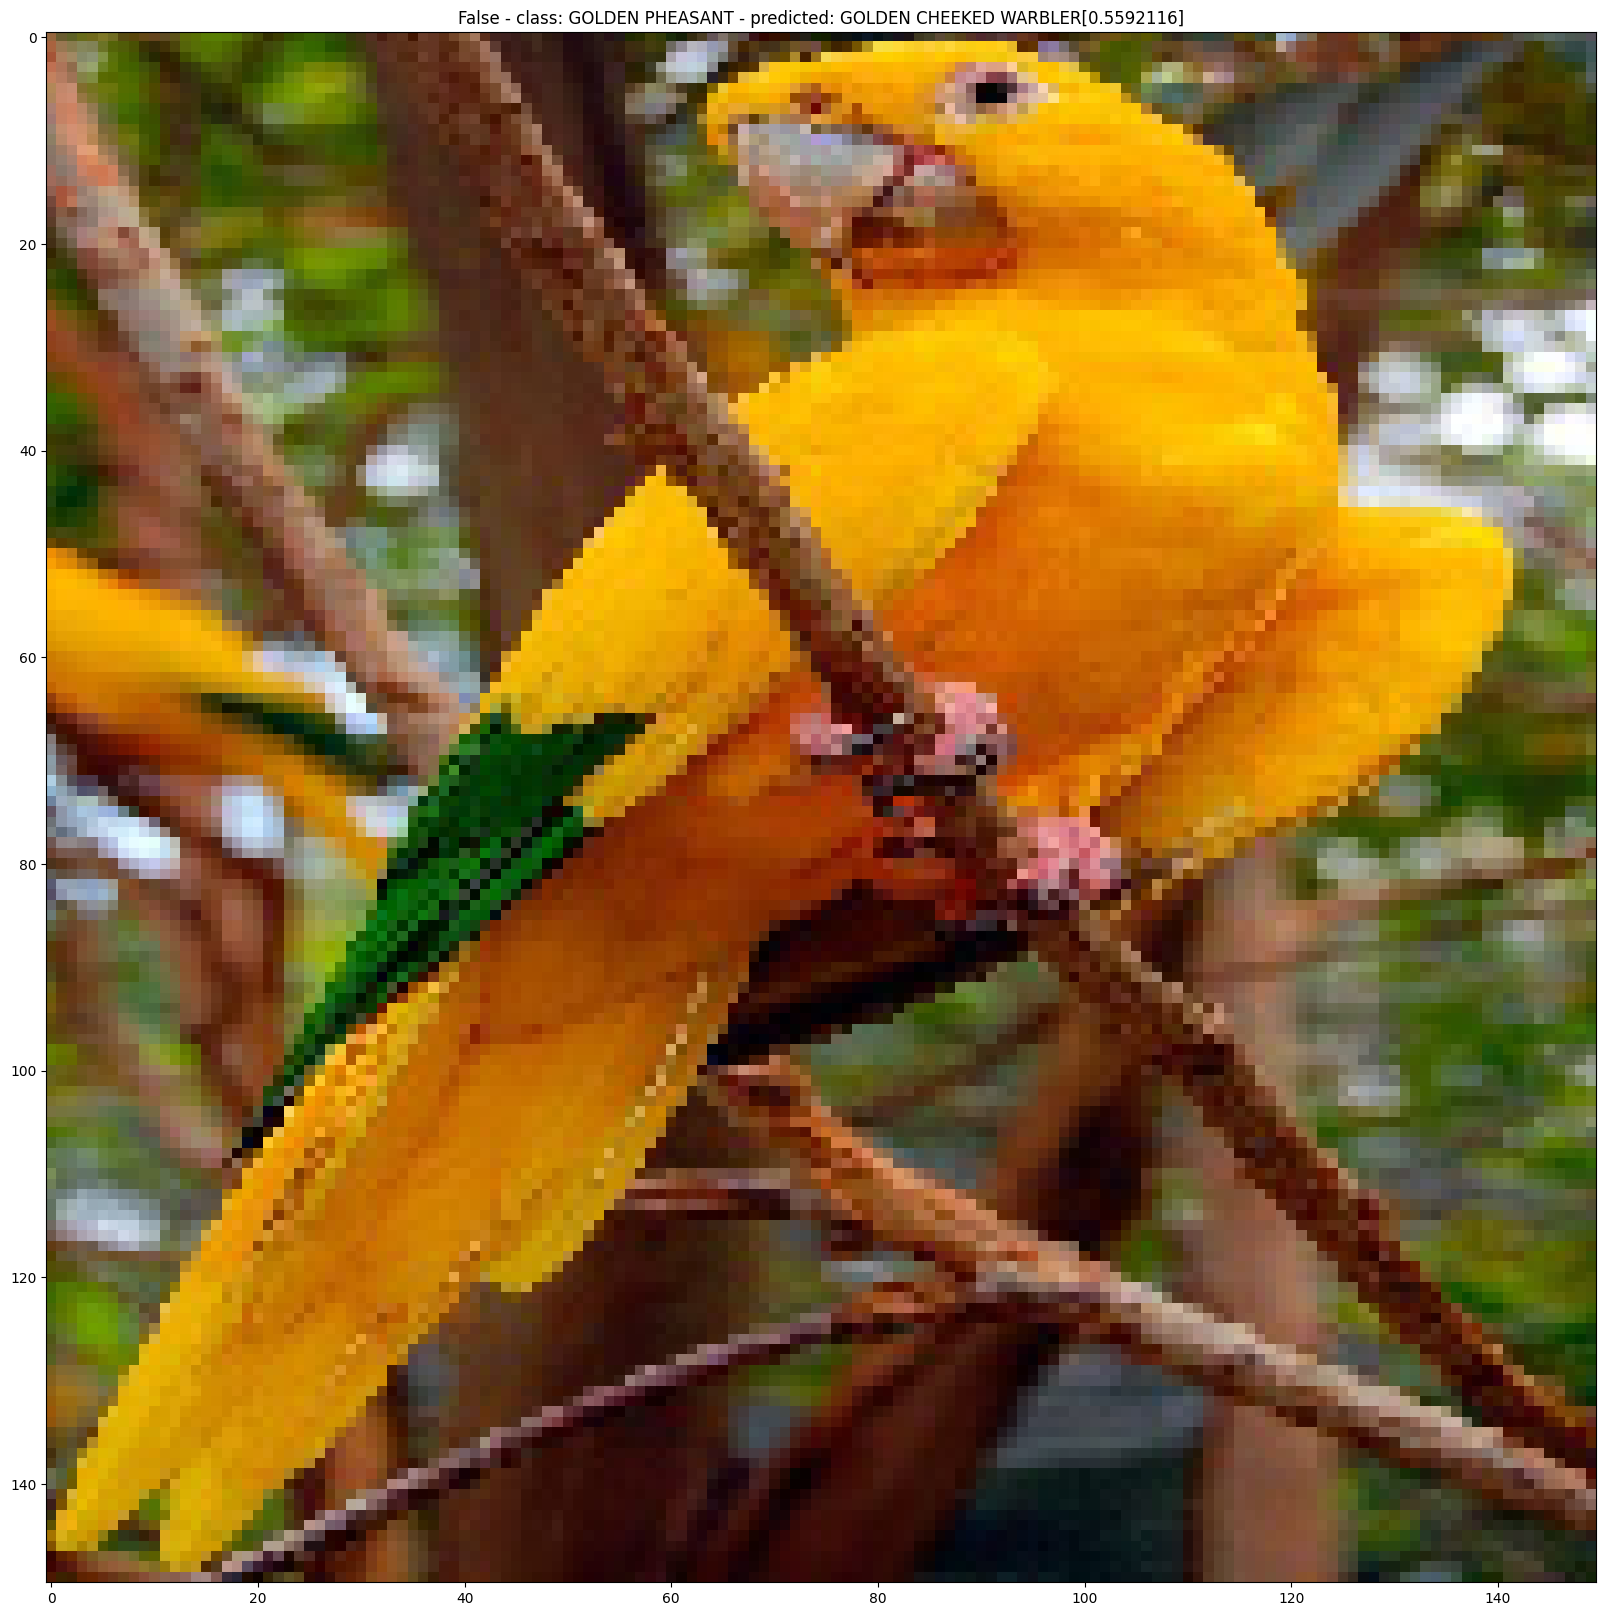

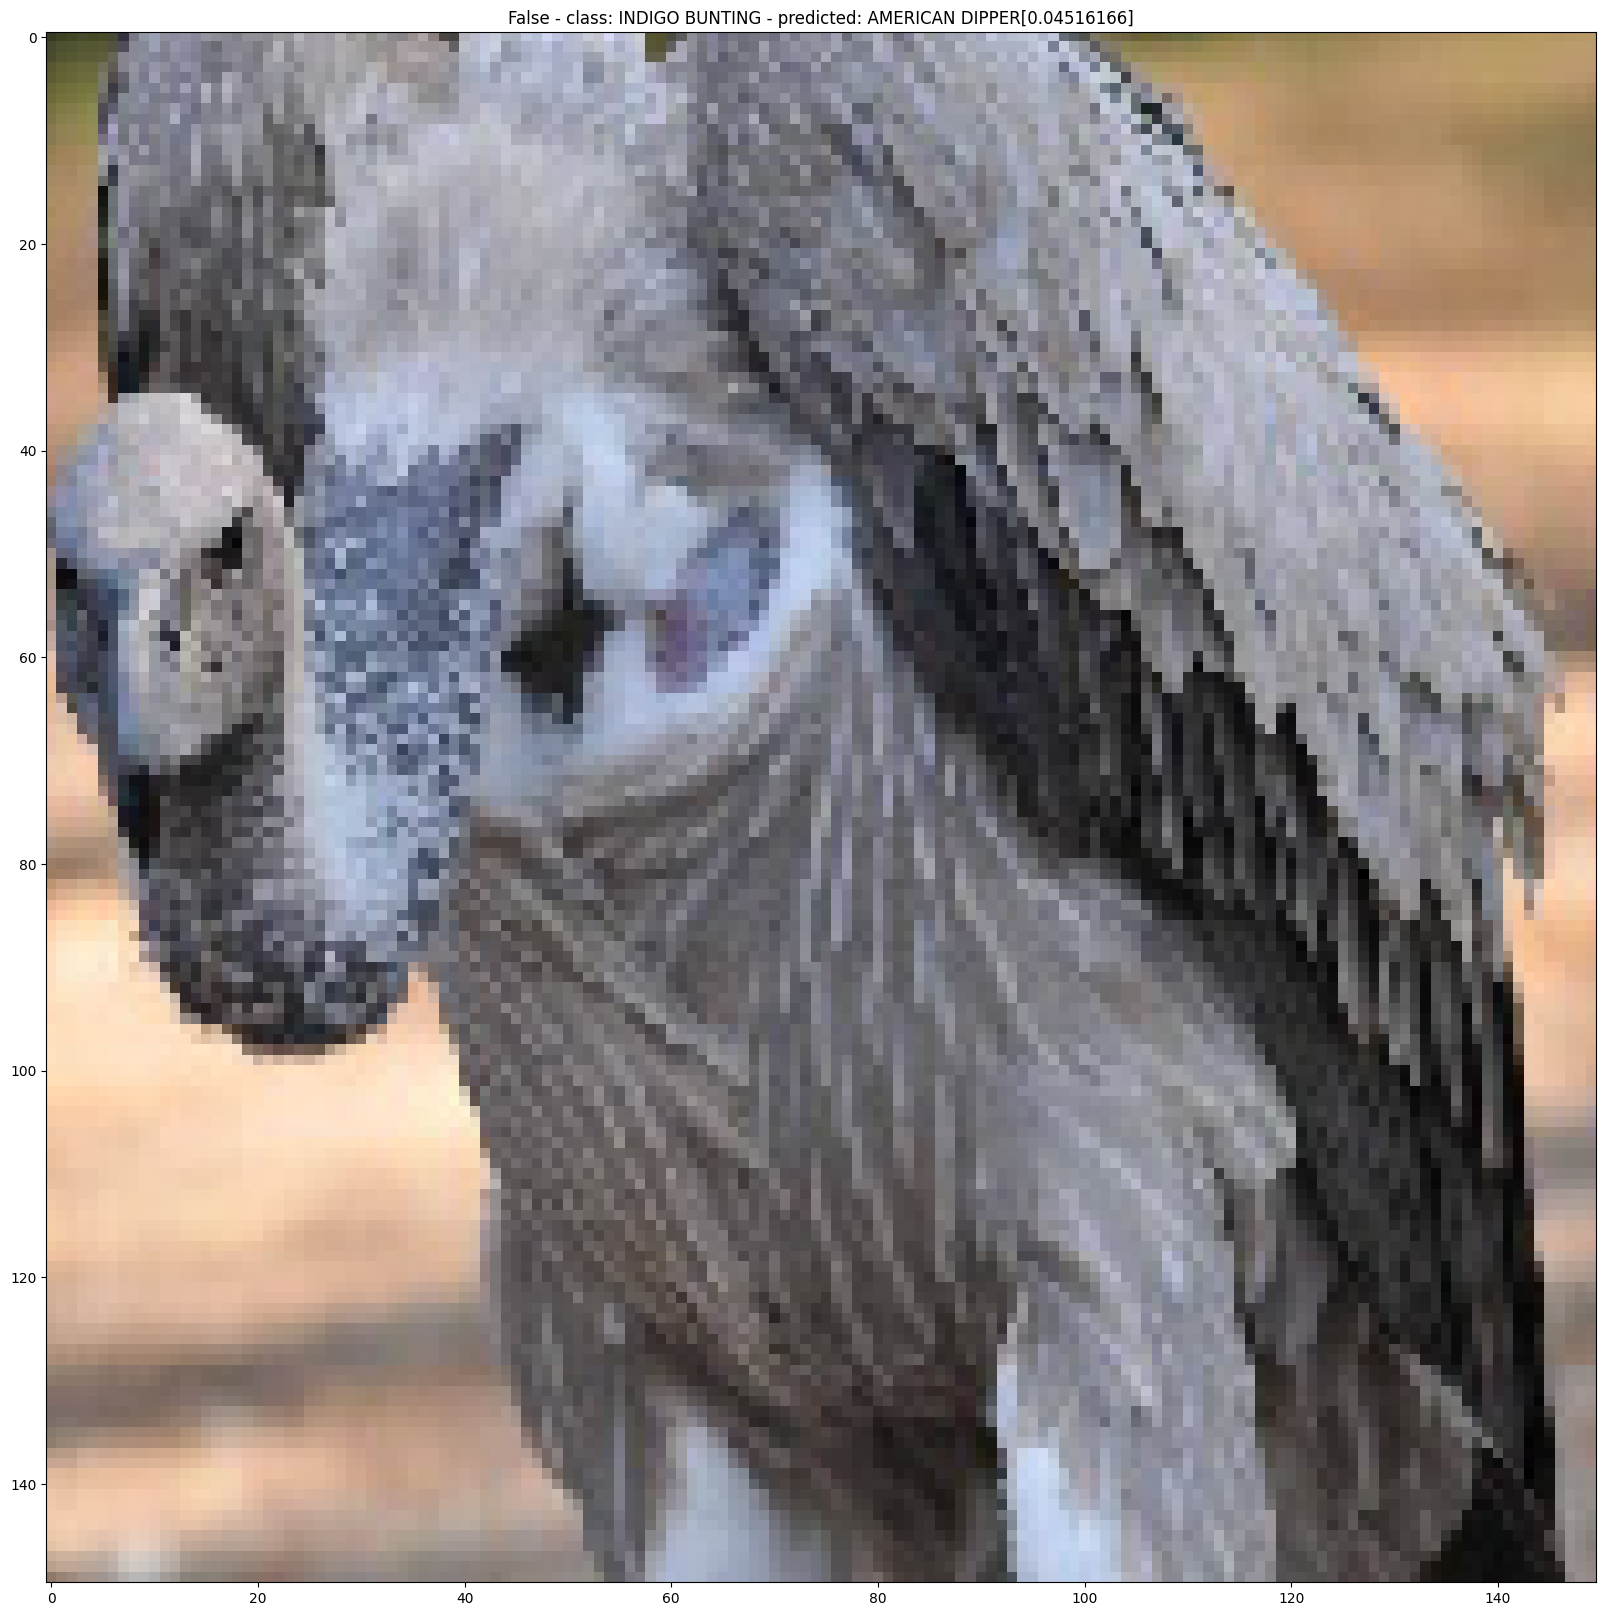

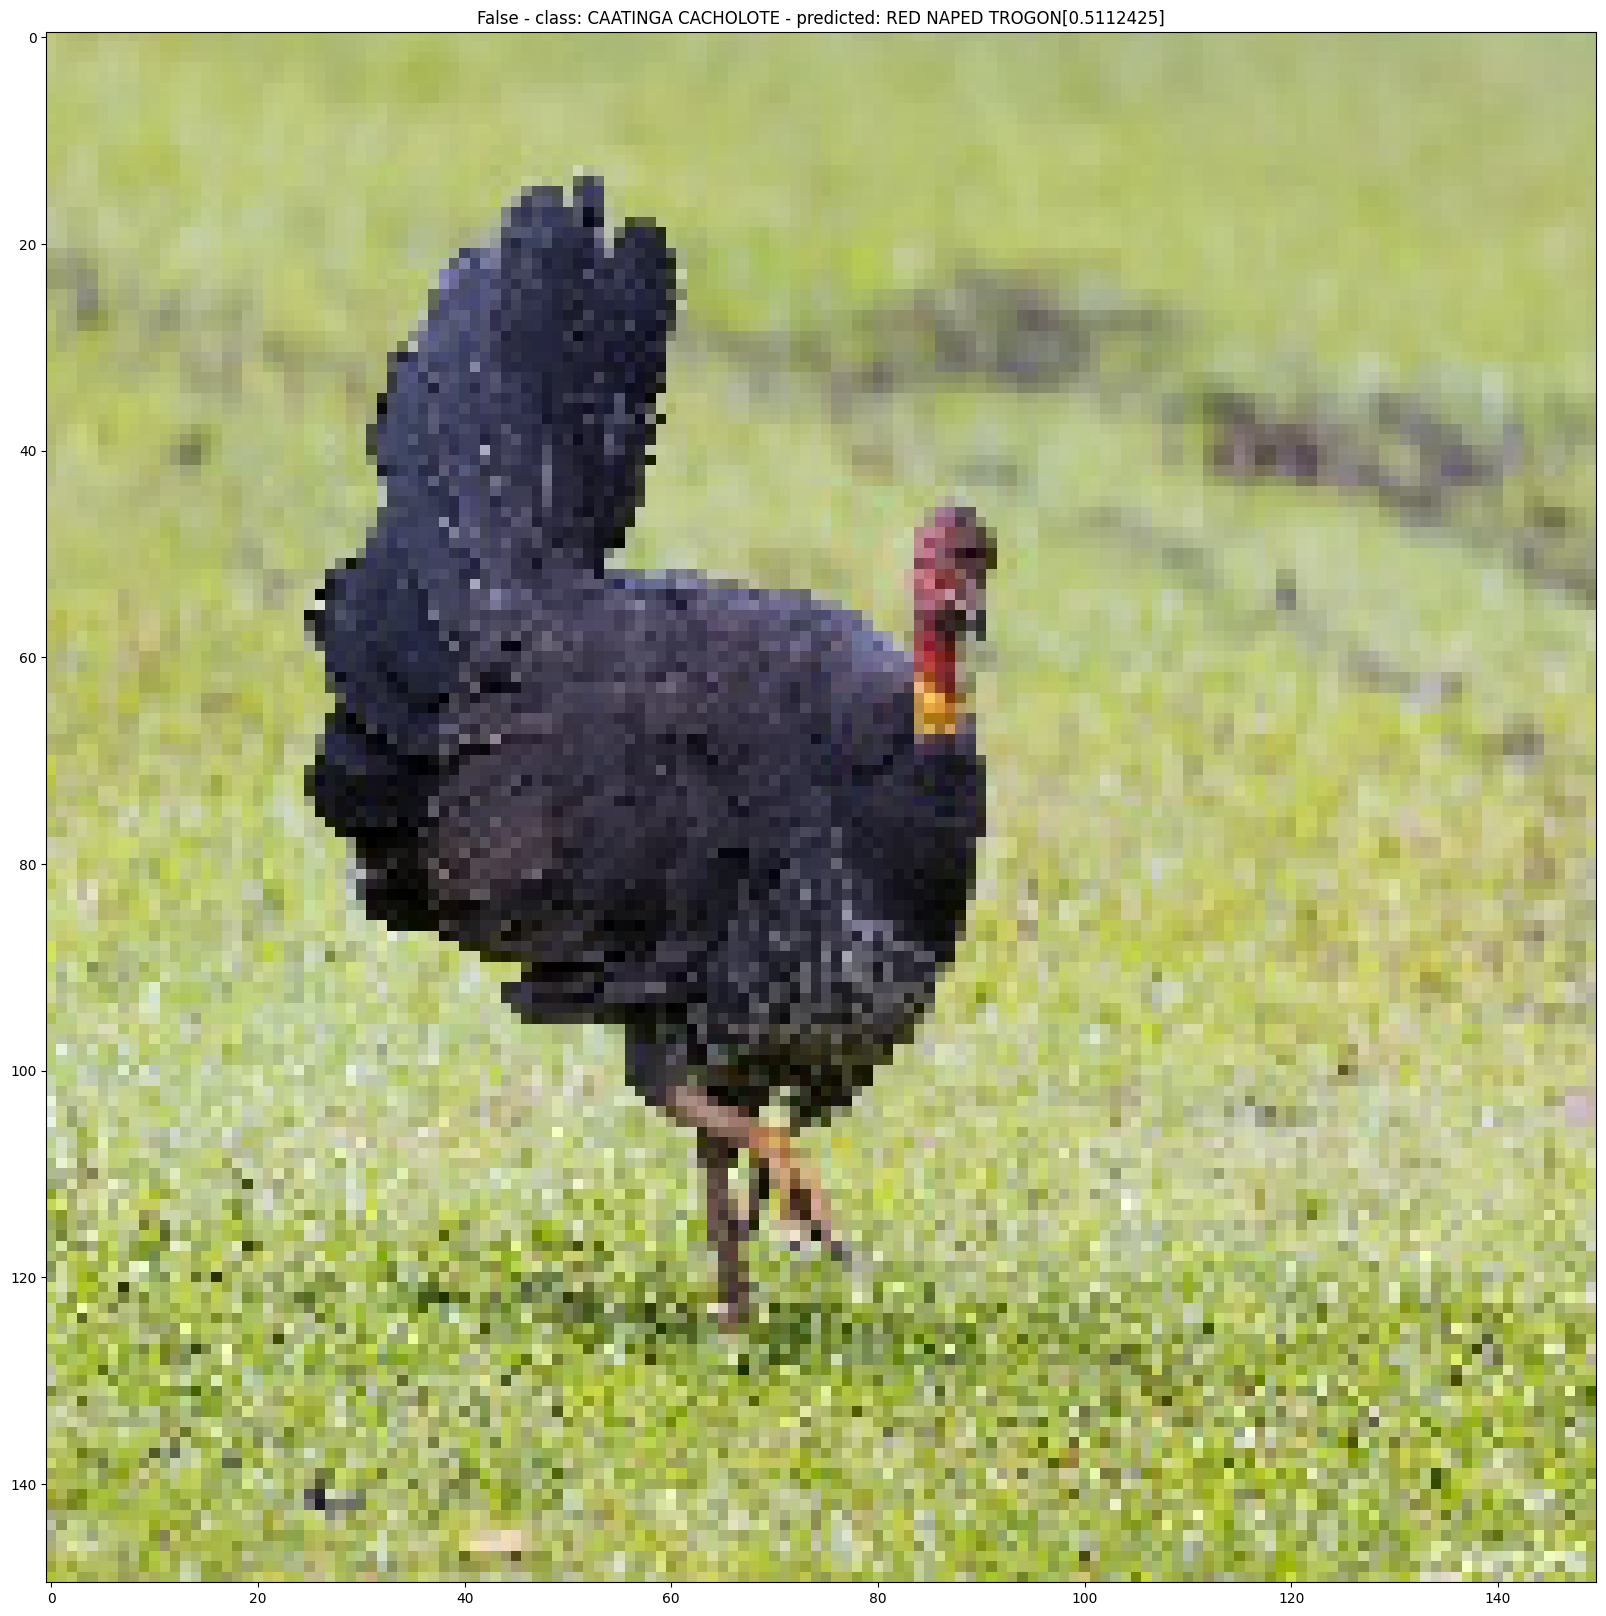

In [ ]:
def predict_one(model):  
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = files[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = files[np.argmax(classes_batch[k])]

      #plt.rcParams['figure.figsize'] = (20, 30)
      #img = plt.imread(train_files[sample_images[i]])
      #plt.subplot(5, 5, i+1)
      #plt.title(class_name[train_labels[sample_images[i]]]) # se obtiene el nombre de la clase asociada a cada label aleatorio escogido
      #plt.imshow(img)
      #plt.axis('off')


      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)

predict_one(model)  

##7.   Re-acondicionamiento del conjunto de datos

Luego de visualizar en nuestro primer modelo Over-fitting, usaremos varias técnicas para reducirlo. En este punto usaremos <i>Data augmentation</i>.

información de argumentos en Image generator: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [ ]:
datagen_2 = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')
)

train_generator = datagen_2.flow_from_directory(directory=DIRECTORY_TRAIN,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE_TRAIN,
                                                    class_mode='categorical')
                                                    #subset='training')
validation_generator = datagen_2.flow_from_directory(directory=DIRECTORY_VALID,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE_VALID,
                                                    class_mode='categorical')
                                                    #subset='validation')
test_generator = datagen_2.flow_from_directory(directory=DIRECTORY_TEST,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=1,
                                                    class_mode='categorical')

Found 66378 images belonging to 515 classes.
Found 16346 images belonging to 515 classes.


##8.   Desarrollo de la nueva arquitectura de red neuronal y entrenamiento de la solución
Para reducir el over-fitting detectado, además de Data augmentation también tenemos que utilizar una o dos capas de <i>Dropout</i> y <i>Regularizar</i> el modelo para su entrenamiento final.




In [ ]:
from keras import regularizers

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))

model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(128,(3,3),activation='relu'))
model_2.add(layers.MaxPooling2D((2,2)))
model_2.add(layers.Conv2D(128,(3,3),activation='relu'))
model_2.add(layers.MaxPooling2D((2,2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(32960,activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(515,activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch = 95, # len(train_generator) 
    epochs = 20,
    validation_data = validation_generator, 
    validation_steps = 24 # len(validation_generator)
)

Epoch 1/20
95/95 [==============================] - 600s 6s/step - loss: 13.2947 - acc: 0.0013 - val_loss: 12.4151 - val_acc: 0.0026
Epoch 2/20
95/95 [==============================] - 597s 6s/step - loss: 11.6407 - acc: 0.0049 - val_loss: 10.8912 - val_acc: 0.0026
Epoch 3/20
95/95 [==============================] - 598s 6s/step - loss: 10.2347 - acc: 0.0026 - val_loss: 9.5961 - val_acc: 0.0026
Epoch 4/20
95/95 [==============================] - 601s 6s/step - loss: 9.0565 - acc: 0.0030 - val_loss: 8.5359 - val_acc: 0.0013
Epoch 5/20
95/95 [==============================] - 586s 6s/step - loss: 8.0890 - acc: 0.0043 - val_loss: 7.6672 - val_acc: 0.0013
Epoch 6/20
95/95 [==============================] - 612s 6s/step - loss: 7.3388 - acc: 0.0039 - val_loss: 7.0352 - val_acc: 0.0026
Epoch 7/20
95/95 [==============================] - 609s 6s/step - loss: 6.7855 - acc: 0.0072 - val_loss: 6.5665 - val_acc: 0.0065
Epoch 8/20
95/95 [==============================] - 592s 6s/step - loss: 6.416

In [ ]:
model_2.save(BASE_FOLDER + 'Birds_Monitoring_2.h5')

##9.   Monitorización del proceso de entrenamiento para la toma de decisiones

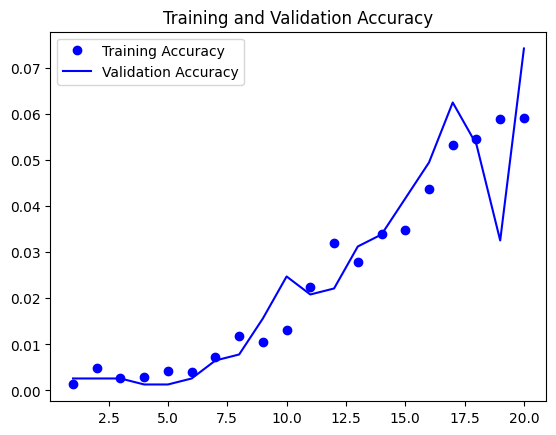

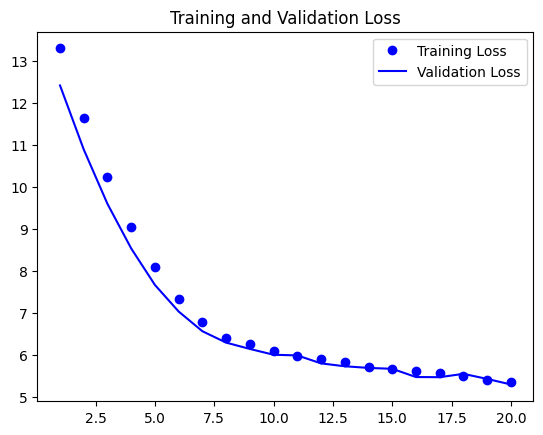

In [ ]:
acc_2 = history_2.history['acc']
val_acc_2 = history_2.history['val_acc']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc_2, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_2, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_2, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_2, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()